# Analisis de datos

## Preparacion de los datos

### Liberias y DFs

In [1]:
#Importar librerias a usar
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import zepid
from zepid.graphics import EffectMeasurePlot
import networkx as nx
from numpy import genfromtxt
from scipy import stats
import os
from IPython.display import Image
from thefuzz import fuzz

c:\Users\someo\AppData\Local\Programs\Python\Python311\Lib\site-packages\thefuzz\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
# Reseteo del directorio principal
os.getcwd()
os.chdir("C:\\Users\someo\Downloads\Review_EDA_Emotion_Recognition")

In [3]:
#Creación de data frames a usar
df_metadata = pd.read_csv('.\data\Tabla Normalizada - Metadata.csv')
df_data_type = pd.read_csv('.\data\Tabla Normalizada - Data type.csv')
df_participants = pd.read_csv('.\data\Tabla Normalizada - Participants.csv')
df_self_report = pd.read_csv('.\data\Tabla Normalizada - Self report.csv')
df_emotion_elicitation_techniques = pd.read_csv('.\data\Tabla Normalizada - Emotion elicitation techniques.csv')
df_eda = pd.read_csv('.\data\Tabla Normalizada - EDA.csv')
df_statistical_learning_models = pd.read_csv('.\data\Tabla Normalizada - Statistical Learning model.csv')
df_performances = pd.read_csv('.\data\Tabla Normalizada - Performances.csv')
df_alg_perf = pd.read_csv('.\data\Tabla Normalizada - Alg_Perf.csv')

### Set características generales de los gráficos
extraido desde: https://towardsdatascience.com/creating-apa-style-plots-in-python-e8adddc3421

In [4]:
plt.rcParams['figure.figsize'] = [20, 10]

matplotlib.style.use(matplotlib.get_data_path()+'/stylelib/apa.mplstyle')

plt.rcParams["legend.fontsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.titlesize"] = 25

C:\Users\someo\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\mpl-data\stylelib

apa.mplstyle format

In [5]:
"""font.family:  serif

figure.titlesize:   large	# size of the figure title (``Figure.suptitle()``)
figure.titleweight: bold	# weight of the figure title
figure.subplot.wspace: 0.3     # the amount of width reserved for space between subplots,
                               # expressed as a fraction of the average axis width

figure.subplot.hspace: 0.3

axes.facecolor: 	white   # axes background color
axes.edgecolor:     black   # axes edge color
axes.labelcolor:	black
axes.prop_cycle: cycler('color', ['k', '0.8', '0.6', '0.4', 'k', '0.8', 'b', 'r']) + cycler('linestyle', ['-', '--', ':', '-.','-', '--',':', '-.']) + cycler('linewidth', [1.2, 1.2, 1, 0.7, 1, 0.7, 1, 0.7])
		          # color cycle for plot lines as list of string colorspecs:
		          # single letter, long name, or web-style hex
		          # As opposed to all other paramters in this file, the color
		          # values must be enclosed in quotes for this parameter,
		          # e.g. '1f77b4', instead of 1f77b4.
		          # See also https://matplotlib.org/tutorials/intermediate/color_cycle.html
		          # for more details on prop_cycle usage.
axes.autolimit_mode: round_numbers
axes.axisbelow:     line 

xtick.labelsize:     small	# fontsize of the x any y ticks
ytick.labelsize:     small
xtick.color:         black
ytick.color:         black

axes.labelpad:      5.0        # space between label and axis

axes.spines.top:    False	# display axis spines
axes.spines.right:  False
axes.spines.bottom:    True	# display axis spines
axes.spines.left:  True

axes.grid:          False
axes.labelweight:   bold
axes.titleweight:   bold

errorbar.capsize:   10

savefig.format:     svg
savefig.bbox:      tight"""

"font.family:  serif\n\nfigure.titlesize:   large\t# size of the figure title (``Figure.suptitle()``)\nfigure.titleweight: bold\t# weight of the figure title\nfigure.subplot.wspace: 0.3     # the amount of width reserved for space between subplots,\n                               # expressed as a fraction of the average axis width\n\nfigure.subplot.hspace: 0.3\n\naxes.facecolor: \twhite   # axes background color\naxes.edgecolor:     black   # axes edge color\naxes.labelcolor:\tblack\naxes.prop_cycle: cycler('color', ['k', '0.8', '0.6', '0.4', 'k', '0.8', 'b', 'r']) + cycler('linestyle', ['-', '--', ':', '-.','-', '--',':', '-.']) + cycler('linewidth', [1.2, 1.2, 1, 0.7, 1, 0.7, 1, 0.7])\n\t\t          # color cycle for plot lines as list of string colorspecs:\n\t\t          # single letter, long name, or web-style hex\n\t\t          # As opposed to all other paramters in this file, the color\n\t\t          # values must be enclosed in quotes for this parameter,\n\t\t          # e.g. '1

In [6]:
def multi_reversing(df,col_id, col_values):
    df_raw = pd.melt(df, id_vars = col_id, value_vars = col_values)
    return df_raw[df_raw.value == 'x']

def multi_reversing_n(df,col_id, col_values):
    df_raw = pd.melt(df, id_vars = col_id, value_vars = col_values)
    return df_raw[df_raw.value != 0]

def bar_plot(col, data, titulos):
    var_x = col
    df = data
    g = sns.countplot(x=var_x, data=df, order = getattr(df, var_x).value_counts().index, palette="bone")
    g.set(title = titulos[0], xlabel = titulos[1], ylabel = titulos[2])
    plt.xticks(rotation=90)
    
    plt.tight_layout()
    plt.savefig(f'.\\Emmanuel\\figures\\NUEVOS. {titulos[0]}.jpg', dpi=1000)
    plt.show()

def t_student(x,y):
	print('Students t-test')
	from scipy.stats import ttest_ind
	stat, p = ttest_ind(x, y, alternative = 'greater')
	print('stat=%.3f, p=%.3f' % (stat, p))
	if p > 0.05:
		print('Probably the same distribution')
	else:
		print('Probably different distributions')


def mann_whitney_u(x,y):
	print('Mann-Whitney U Test')
	from scipy.stats import mannwhitneyu
	stat, p = mannwhitneyu(x, y, alternative = 'greater')
	print('stat=%.3f, p=%.3f' % (stat, p))
	if p > 0.05:
		print('Probably the same distribution')
	else:
		print('Probably different distributions')

def relaciones(weight):
    df_weights_dim = pd.DataFrame(weight)
    wserie = df_weights_dim.value_counts()
    wserie = wserie.to_frame()
    wserie.index.names = ['index']
    wserie.rename(columns = {0:'relations'}, inplace = True)
    wserie = wserie.reset_index()
    
    col1 = wserie.columns[0]
    col2 = wserie.columns[1]

    # iterar sobre las filas del dataframe
    for i, row in wserie.iterrows():
        print(f"Interacciones con {row[col1]} conexiones se observaron {row[col2]/2} veces.")


## Analisis (graficos)

### Mapamundi

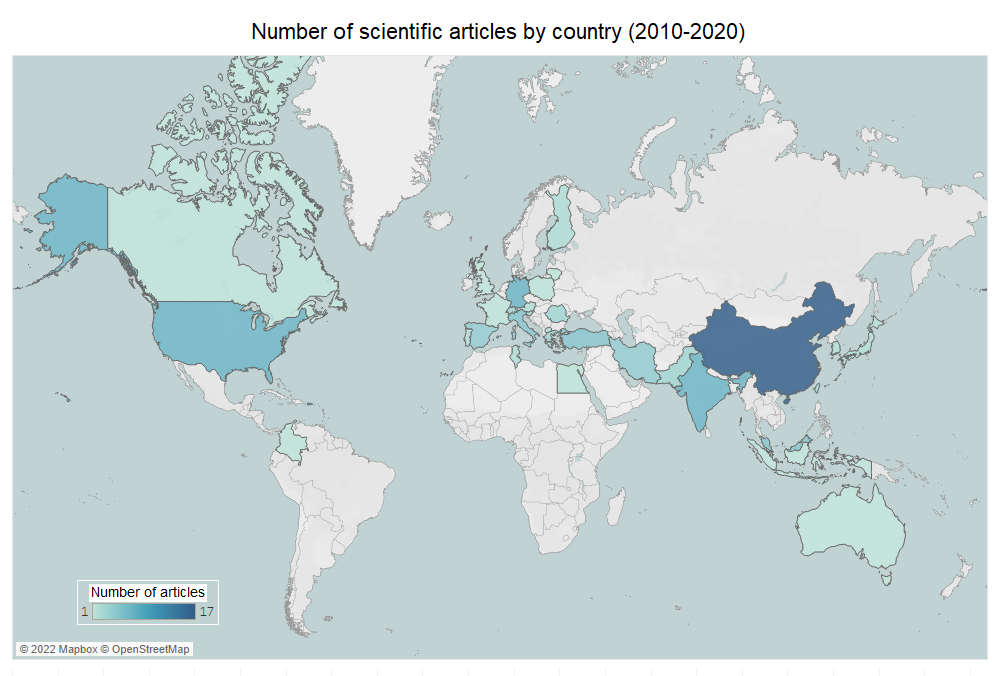

In [7]:
Image(filename='.\\Emmanuel\\figures\Cantidad de papers por pais y continente (Tableau).png') 

In [8]:
df_metadata=df_metadata.fillna('-')
df_metadata_sin_duplicates = df_metadata.drop_duplicates(subset='paper_id')

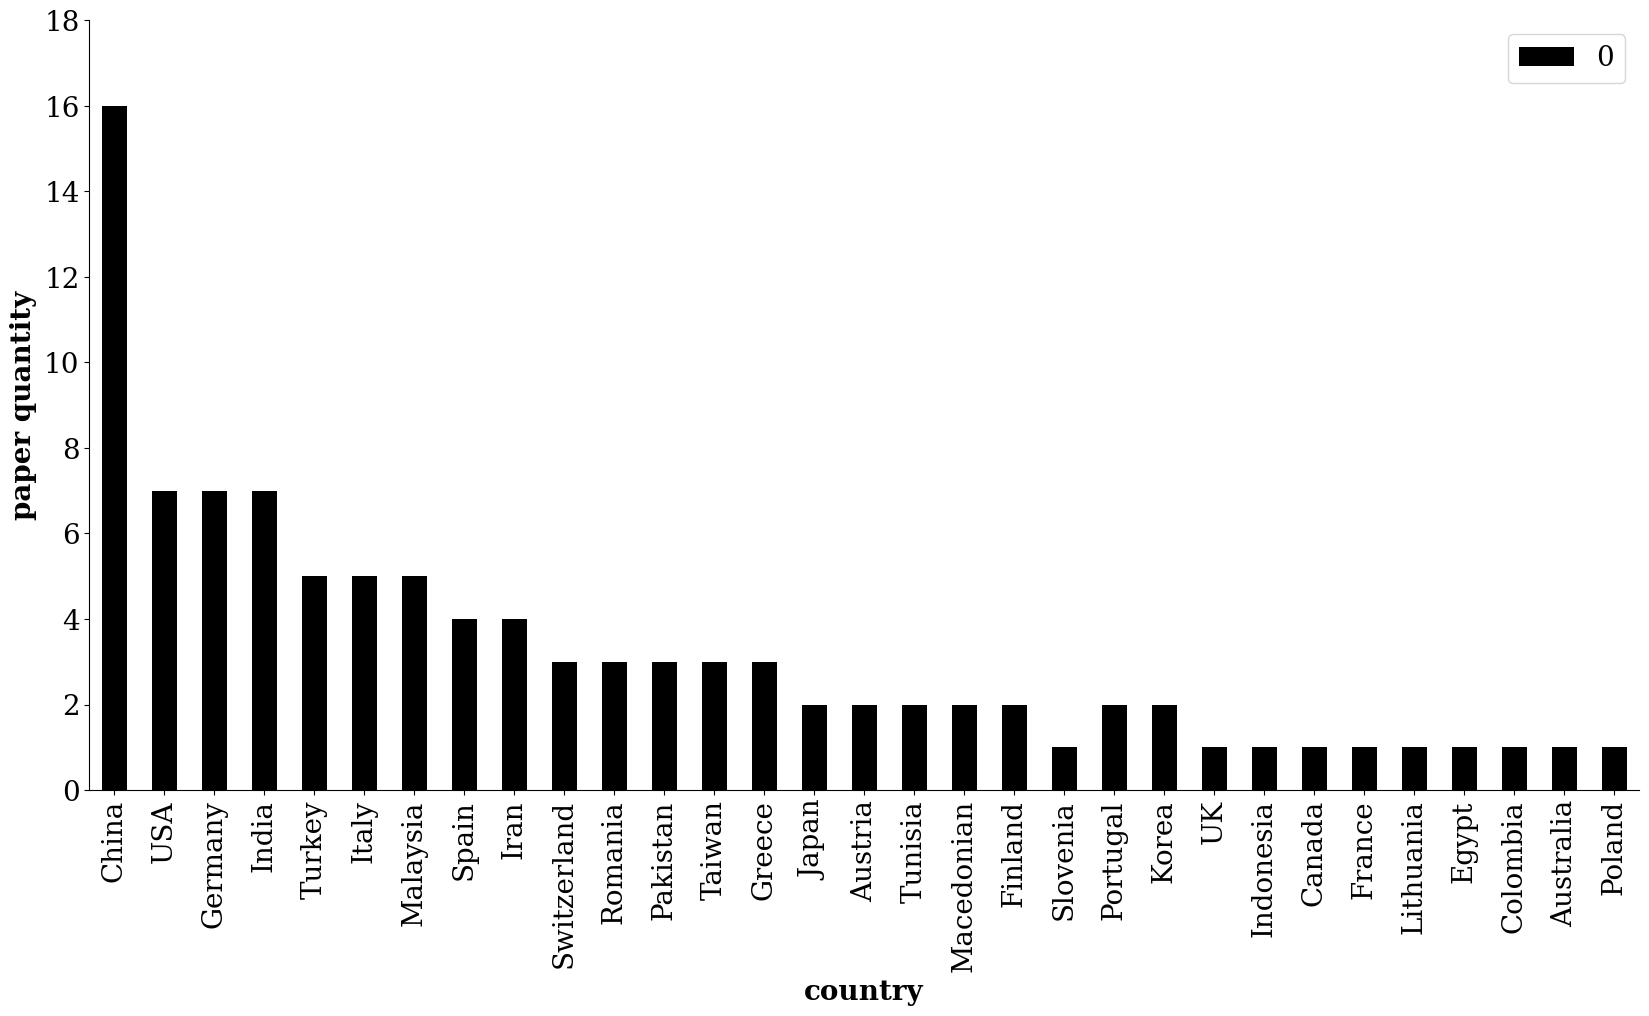

  continents  quantity
0       Asia        49
1     Europa        39
2    America         9
3     Africa         3
4  Australia         1


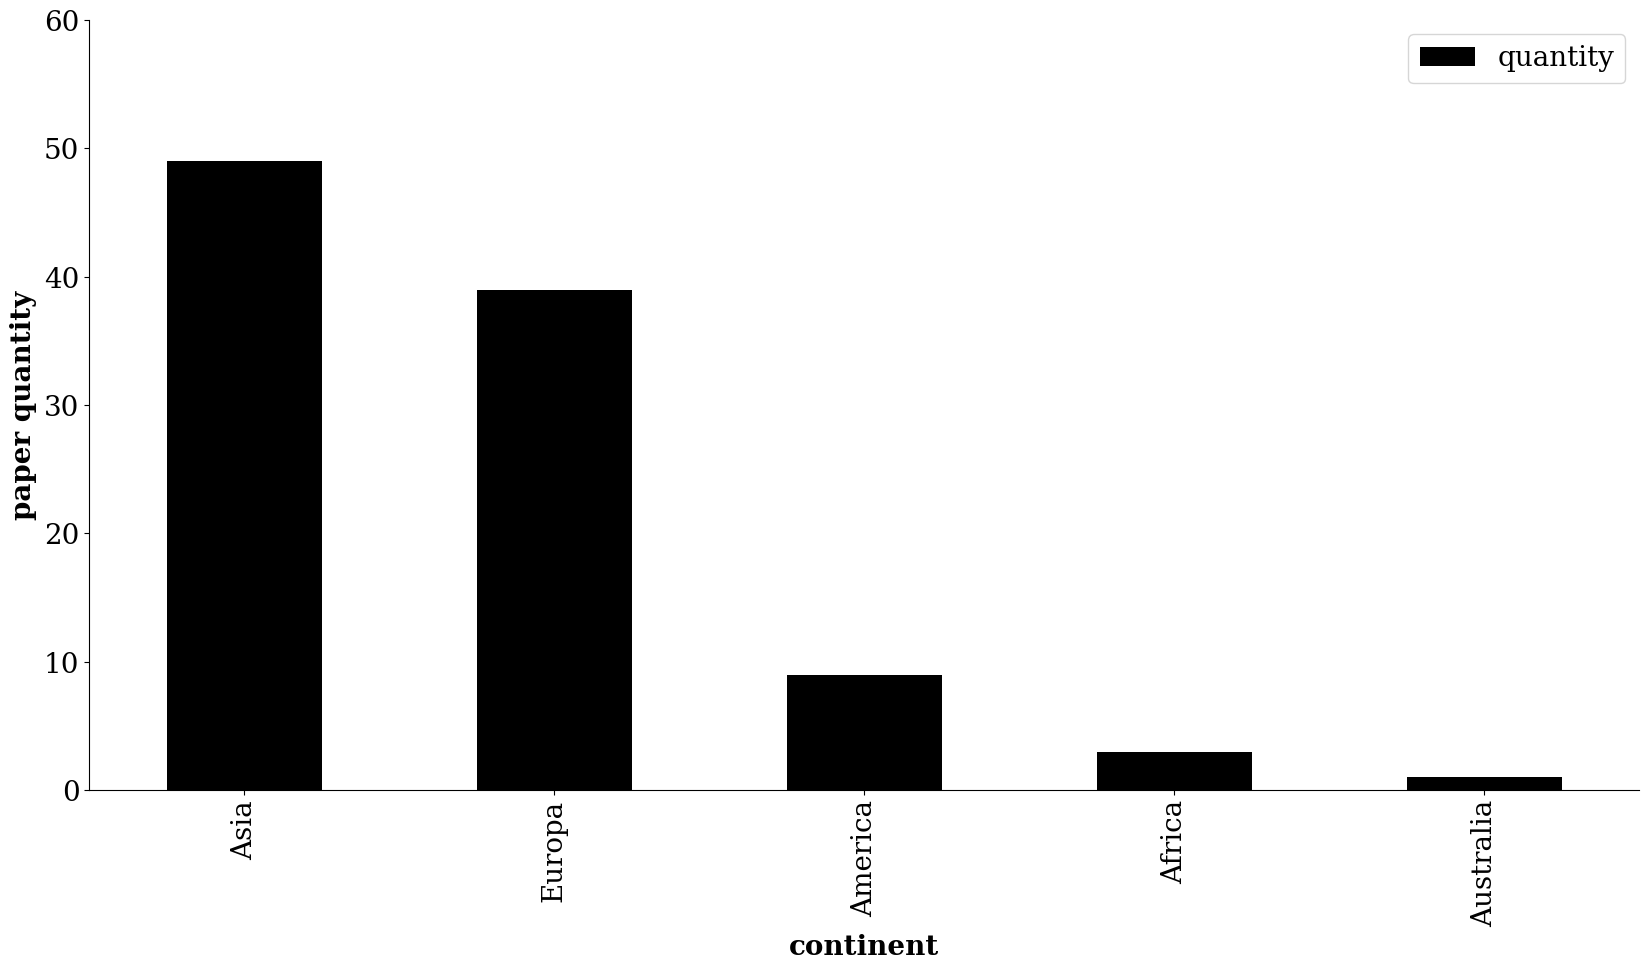

In [9]:
paises = df_metadata_sin_duplicates["first_author_country_affiliation"].unique()

countries = df_metadata_sin_duplicates.pivot_table(columns=['first_author_country_affiliation'], aggfunc='size')
df_countries = pd.DataFrame(countries)

order = ['China','USA', 'Germany', 'India','Turkey','Italy', 'Malaysia','Spain','Iran', 'Switzerland','Romania','Pakistan', 'Taiwan','Greece', 'Japan',
'Austria', 'Tunisia','Macedonian', 'Finland', 'Slovenia', 'Portugal', 'Korea',
'UK', 'Indonesia','Canada', 'France', 'Lithuania', 
'Egypt','Colombia', 'Australia', 'Poland']

df_countries.loc[order].plot(kind='bar', xlabel='country', ylabel='paper quantity')
plt.show()

#Papers por continente - plot
papers_continents = {'continents' : ['Asia', 'Europa','America','Africa','Australia'],
'quantity' : [49, 39, 9, 3, 1]}
df_continents = pd.DataFrame(papers_continents)
print(df_continents)

df_continents.set_index('continents').plot(kind='bar',xlabel='continent', ylabel='paper quantity')
plt.show()

In [10]:
#Aquellos que tenian una frecuencia de 4 o menos los agrupamos en 'Others'
mapping_others ={
        
        'Australia': 'WEIRD',
        'Austria': 'WEIRD',
        'Canada': 'WEIRD',
        'Finland': 'WEIRD',
        'France': 'WEIRD',
        'Germany': 'WEIRD',
        'Italy': 'WEIRD',
        'Lithuania': 'WEIRD',
        'Poland': 'WEIRD',
        'Portugal': 'WEIRD',
        'Slovenia': 'WEIRD',
        'Spain': 'WEIRD',
        'Switzerland': 'WEIRD',
        'UK': 'WEIRD',
        'USA': 'WEIRD'}

df_countries_with_weird = df_countries.copy()
df_countries_with_weird.reset_index(inplace=True)
df_countries_with_weird.loc[:,'first_author_country_affiliation'] = df_countries_with_weird.loc[:,"first_author_country_affiliation"].replace(mapping_others)
df_countries_with_weird.value_counts()

first_author_country_affiliation  0 
WEIRD                             1     7
                                  2     3
                                  7     2
Colombia                          1     1
WEIRD                             5     1
                                  4     1
                                  3     1
Turkey                            5     1
Tunisia                           2     1
Taiwan                            3     1
Romania                           3     1
China                             16    1
Malaysia                          5     1
Macedonian                        2     1
Korea                             2     1
Japan                             2     1
Iran                              4     1
Indonesia                         1     1
India                             7     1
Greece                            3     1
Egypt                             1     1
Pakistan                          3     1
dtype: int64

In [11]:
df_countries

0
first_author_country_affiliation    
Australia                          1
Austria                            2
Canada                             1
China                             16
Colombia                           1
Egypt                              1
Finland                            2
France                             1
Germany                            7
Greece                             3
India                              7
Indonesia                          1
Iran                               4
Italy                              5
Japan                              2
Korea                              2
Lithuania                          1
Macedonian                         2
Malaysia                           5
Pakistan                           3
Poland                             1
Portugal                           2
Romania                            3
Slovenia                           1
Spain                              4
Switzerland                        3
Taiwan                             3
Tunisia                            2
Turkey                             5
UK                                 1
USA                                7

<AxesSubplot: xlabel='Source type', ylabel='count'>

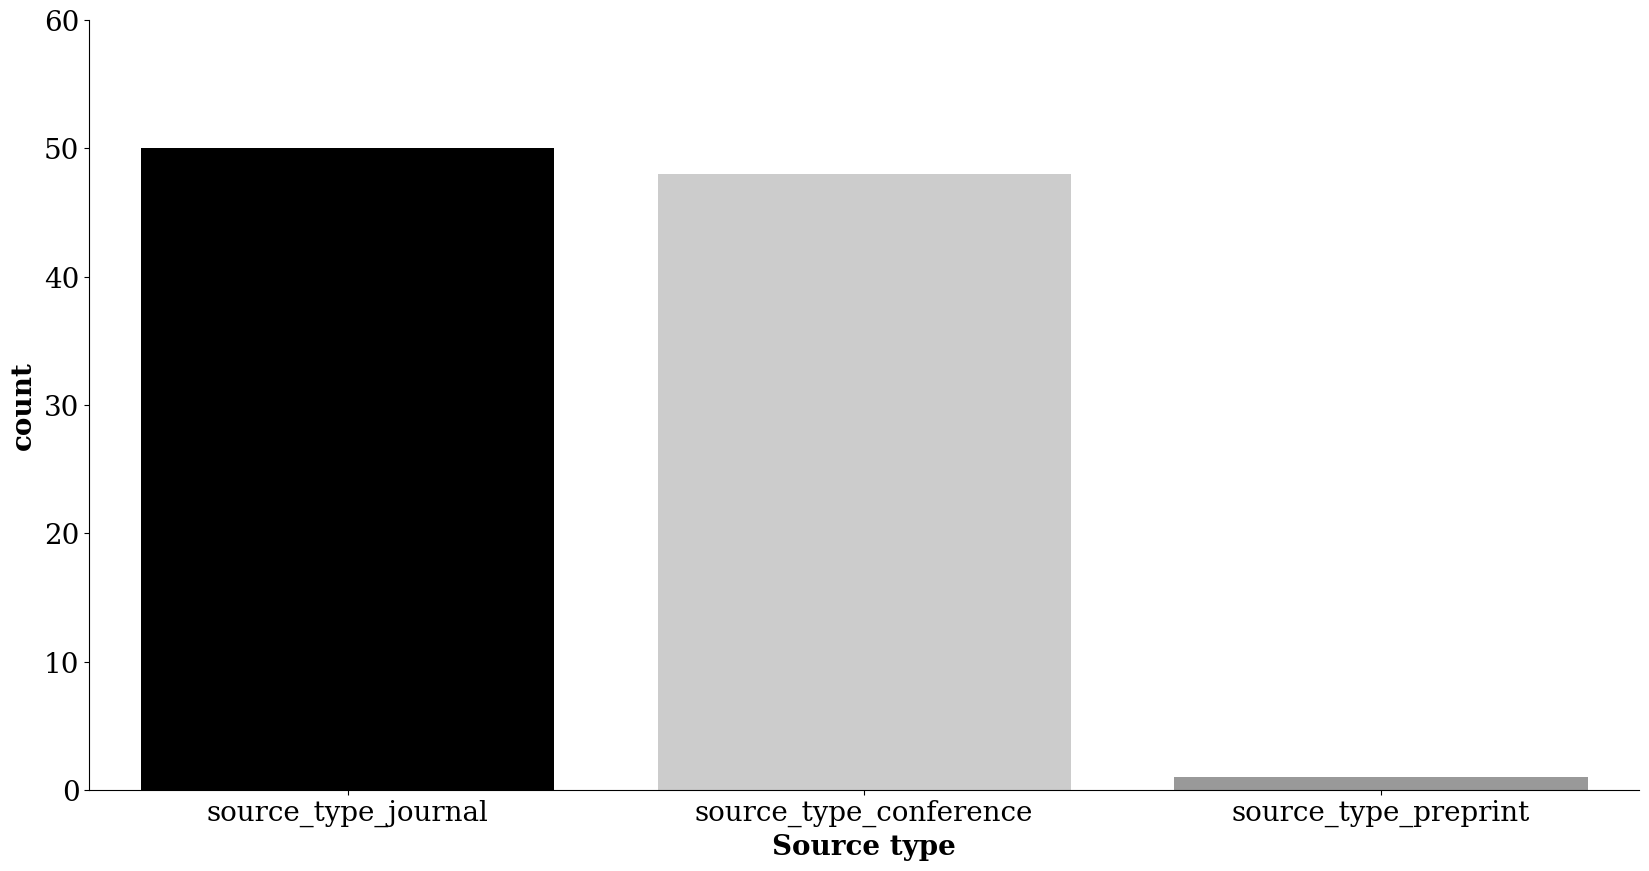

In [12]:
df_sources = df_metadata_sin_duplicates.iloc[:,7:10]
def get_value(row):
     for c in df_sources.columns:
         if row[c]== 'x':
             return c

df_sources = df_sources.apply(get_value, axis=1)
df_sources = pd.DataFrame(df_sources)
df_sources.columns = ['Source type']

#ploteo
quantity = df_sources['Source type'].value_counts()
df_quantity = pd.DataFrame(quantity)


sns.countplot(x='Source type', data=df_sources)

In [13]:
df_quantity

Source type
source_type_journal              50
source_type_conference           48
source_type_preprint              1

### ¿Cual es la evolucion temporal (2010-2020) del uso de los modelos emocionales empleados (categoriales o dimensionales)?

Gráfico de barra por año (2010-2020) por paper según modelos de emociones empleado (categoriales o dimensionales)

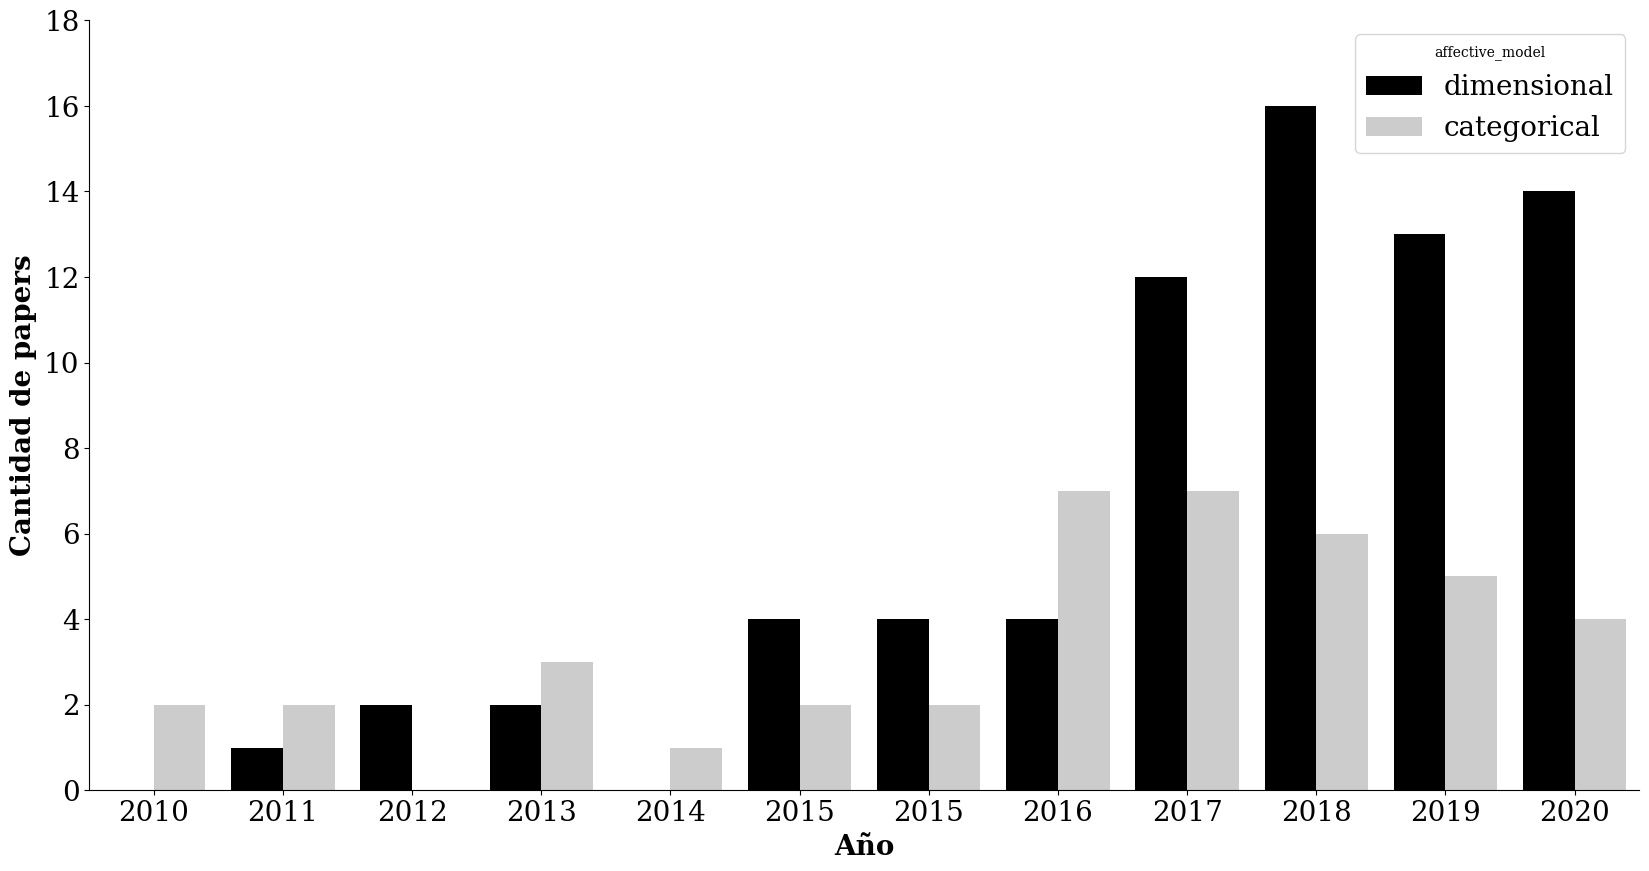

In [14]:
#rellenar datos faltantes y NO SE DROPEAN los duplicados (hay papers que usan multiples modelos)
df_statistical_learning_models=df_statistical_learning_models.fillna('-')
df_statistical_learning_models=df_statistical_learning_models[df_statistical_learning_models['affective_model'].isin(['categorical', 'dimensional'])]
df_statistical_learning_models_0 = df_statistical_learning_models.groupby(['paper_id','affective_model']).nth(0)
df_statistical_learning_models_0.reset_index(inplace=True)

#ploteo
category_order = [2010, 2011, 2012, 2013, 2014, 2015, 2015, 2016, 2017, 2018, 2019, 2020]
g= sns.countplot(x='year', 
    data= df_statistical_learning_models_0, 
    hue='affective_model', 
    order=category_order)
g.set(xlabel = 'Año', ylabel = 'Cantidad de papers')
plt.savefig('.\\Emmanuel\\figures\\NUEVOS. Cantidad de papers por año (2010-2020) segun tipo de modelo emocional.png')

In [15]:
df_statistical_learning_models_0["year"] = df_statistical_learning_models_0["year"].astype(int)
df_statistical_learning_models_0

paper_id affective_model  model_id  \
0           1     dimensional         1   
1           2     categorical         2   
2           3     dimensional         3   
3           4     dimensional         5   
4           5     categorical        11   
..        ...             ...       ...   
102        95     dimensional       481   
103        96     dimensional       491   
104        97     dimensional       492   
105        98     dimensional       494   
106        99     dimensional       498   

                                          apa_citation  year is_classifier  \
0    Zangróniz, R., Martínez-Rodrigo, A., Pastor, J...  2017             x   
1    Liu, M., Fan, D., Zhang, X., & Gong, X. (2017)...  2016             x   
2    Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...  2018             x   
3    Ali, M., Machot, F. A., Mosa, A. H., Jdeed, M....  2018             x   
4    Wei, J., Chen, T., Liu, G., & Yang, J. (2016)....  2016             -   
..                                                 ...   ...           ...   
102  Yang, H. C., & Lee, C. C. (2019, September). A...  2020             x   
103  Kołodziej, M., Tarnowski, P., Majkowski, A., &...  2020             x   
104  Ganapathy, N., & Swaminathan, R. (2019). Emoti...  2020             x   
105  Subramanian, R., Wache, J., Abadi, M. K., Vier...  2018             x   
106  Yun, H., Fortenbacher, A., Helbig, R., & Pinkw...  2019             x   

    class_model_output_number        class_model_output_categories  \
0                           2                       calm, distress   
1                           5  Happiness, Grief, Fear, Anger, Calm   
2                           2                               LA, HA   
3                           4               HAHV, HALV, LAHV, LALV   
4                           -                                    -   
..                        ...                                  ...   
102                         2                               HA, LA   
103                         2                               HA, LA   
104                         2                               HA, LA   
105                         2                               HV, LV   
106                         4               HAHV, HALV, LAHV, LALV   

    class_Logistic Regression class_Support Vector Machine (SVM)  ...  \
0                           -                                  -  ...   
1                           -                                  x  ...   
2                           -                                  -  ...   
3                           -                                  -  ...   
4                           -                                  -  ...   
..                        ...                                ...  ...   
102                         -                                  x  ...   
103                         -                                  x  ...   
104                         -                                  -  ...   
105                         -                                  x  ...   
106                         -                                  x  ...   

    regre_Recurrent NN regre_LSTM regre_PNN (probabilistic neural network)  \
0                    -          -                                        -   
1                    -          -                                        -   
2                    -          -                                        -   
3                    -          -                                        -   
4                    -          -                                        -   
..                 ...        ...                                      ...   
102                  -          -                                        -   
103                  -          -                                        -   
104                  -          -                                        -   
105                  -          -                    

### ¿Los modelos de clasificacion dimensionales basados en arousal performan mejor que los basados en valence?

Análisis estadístico 
1. Subsetear par quedarse solo con modelso de “HV,LV” (y “LV, “HV”), y “HA,LA” (y “LA, “HA”).
2. FIltrar para quedarnos unicamente con papers que tengan tanto valencia Y arousal (al querer hacer modelos “intrasujeto” es imporatne que se cumpla con esta condición.
3. Agrupar  por paper y sacar la media de la performance (para que quede paper un unico valor de performance promedio de valencia, y un unico valor de performance promedio de arousal. Esto es fundamental para los pasos que siguen)
4. Recien ahora (y  no antes, esto es mucho muy importante) analizar cual es la medida de performance mas prevalente y subsetear para quedarnos solo con esa medida.
5. Hacer T test INTRASUJETO

In [16]:
#creacion data frame y subseteo por: modelos dimensionales, tipo clasiffier, categorias HA/LA y HV/LV
df_alg_perf = df_alg_perf.fillna(0)
df = df_alg_perf
df = df[df['affective_model'] == 'dimensional']
df = df[df['is_classifier'].isin(['x', 'X'])]
df = df[df['class_model_output_categories'].isin(['HA, LA', 'HV, LV', 'LA, HA', 'LV, HV'])]
df[['class_model_output_categories']] = df[['class_model_output_categories']].replace(['LA, HA', 'LV, HV'], ['HA, LA', 'HV, LV' ])

In [17]:
df[["paper_id", "apa_citation", "class_model_output_categories"]]


paper_id                                       apa_citation  \
2           3  Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...   
3           3  Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...   
44         11  Girardi, D., Lanubile, F., & Novielli, N. (201...   
45         11  Girardi, D., Lanubile, F., & Novielli, N. (201...   
129        20  Wiem, M. B. H., & Lachiri, Z. (2017). Emotion ...   
..        ...                                                ...   
492        97  Ganapathy, N., & Swaminathan, R. (2019). Emoti...   
493        98  Subramanian, R., Wache, J., Abadi, M. K., Vier...   
494        98  Subramanian, R., Wache, J., Abadi, M. K., Vier...   
495        98  Subramanian, R., Wache, J., Abadi, M. K., Vier...   
496        98  Subramanian, R., Wache, J., Abadi, M. K., Vier...   

    class_model_output_categories  
2                          HA, LA  
3                          HV, LV  
44                         HA, LA  
45                         HV, LV  
129                        HA, LA  
..                            ...  
492                        HV, LV  
493                        HV, LV  
494                        HV, LV  
495                        HA, LA  
496                        HA, LA  

[121 rows x 3 columns]

2. FIltrar para quedarnos unicamente con papers que tengan tanto valencia Y arousal (al querer hacer modelos “intrasujeto” es imporatne que se cumpla con esta condición.

In [18]:
"""revision a mano de los modelos
vuela el paper_id 24, 37, 66, 97
porque no contenian modelos tanto para arousal como para valencia
se procede a filtrarlos"""

df.drop(df[ df['paper_id'] == 24].index,inplace = True)
df.drop(df[ df['paper_id'] == 37].index,inplace = True)
df.drop(df[ df['paper_id'] == 66].index,inplace = True)
df.drop(df[ df['paper_id'] == 97].index,inplace = True)

In [19]:
df_excel = df
df_excel.to_excel(".\data\\analisis_estadistico.xlsx")

In [20]:
df.iloc[:,57:]

accuracy precision f-measure recall-sensitivity-true_positive_rate  \
2      71.53         -         -                                     -   
3      71.04         -         -                                     -   
44         -        67        63                                    64   
45         -        58        35                                    50   
129    62.23         -         -                                     -   
..       ...       ...       ...                                   ...   
490       79     78.38     77.85                                 77.33   
493        0         0        64                                     0   
494        0         0        68                                     0   
495        0         0        61                                     0   
496        0         0        66                                     0   

    specificity_true-negative-rate false-positive-rate false-negative-rate  \
2                                -                   -                   0   
3                                -                   0                   0   
44                               0                   0                   0   
45                               0                   0                   0   
129                              -                   -                   -   
..                             ...                 ...                 ...   
490                          77.78                   0                   0   
493                              0                   0                   0   
494                              0                   0                   0   
495                              0                   0                   0   
496                              0                   0                   0   

    roc-auc R2  R MAE-(Mean-Absolute-Error)  \
2         -  -  0                         -   
3         -  -  0                         -   
44        0  0  0                         0   
45        0  0  0                         0   
129       -  -  -                         -   
..      ... .. ..                       ...   
490       0  0  0                         0   
493       0  0  0                         0   
494       0  0  0                         0   
495       0  0  0                         0   
496       0  0  0                         0   

    Concordance-Correlation-Coefficient-(CCC) Spearman’s-ranking-correlation  \
2                                           0                              0   
3                                           0                              0   
44                                          0                              0   
45                                          0                              0   
129                                         -                              0   
..                                        ...                            ...   
490                                         0                              0   
493                                         0                              0   
494                                         0                              0   
495                                         0                              0   
496                                         0                              0   

    Mean-square-error-(MSE) Root-Mean-Square-Error-(RMSE)  \
2                         0                             0   
3                         0                             0   
44                        0                             0   
45                        0                             0   
129                       0                             0   
..                      ...                           ...   
490                       0                             0   
493                       0                             0   
494                       0                             0   
495                       0               

In [21]:
df[["paper_id", "model_id", "apa_citation", "class_model_output_categories"]]

paper_id  model_id                                       apa_citation  \
2           3         3  Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...   
3           3         4  Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...   
44         11        45  Girardi, D., Lanubile, F., & Novielli, N. (201...   
45         11        46  Girardi, D., Lanubile, F., & Novielli, N. (201...   
129        20       130  Wiem, M. B. H., & Lachiri, Z. (2017). Emotion ...   
..        ...       ...                                                ...   
490        96       491  Kołodziej, M., Tarnowski, P., Majkowski, A., &...   
493        98       494  Subramanian, R., Wache, J., Abadi, M. K., Vier...   
494        98       495  Subramanian, R., Wache, J., Abadi, M. K., Vier...   
495        98       496  Subramanian, R., Wache, J., Abadi, M. K., Vier...   
496        98       497  Subramanian, R., Wache, J., Abadi, M. K., Vier...   

    class_model_output_categories  
2                          HA, LA  
3                          HV, LV  
44                         HA, LA  
45                         HV, LV  
129                        HA, LA  
..                            ...  
490                        HA, LA  
493                        HV, LV  
494                        HV, LV  
495                        HA, LA  
496                        HA, LA  

[64 rows x 4 columns]

In [22]:
"""
se calcula a mano los promedios de arousal y valencia para cada paper
"""
df2 = pd.read_excel(".\data\\Libro12.xlsx") 
df2.head()

paper_id                                       apa_citation  year  \
0         3  Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...  2018   
1         3  Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...  2018   
2        11  Girardi, D., Lanubile, F., & Novielli, N. (201...  2018   
3        11  Girardi, D., Lanubile, F., & Novielli, N. (201...  2018   
4        20  Wiem, M. B. H., & Lachiri, Z. (2017). Emotion ...  2017   

  affective_model class_model_output_categories  accuracy  precision  \
0     dimensional                        HA, LA     71.53        0.0   
1     dimensional                        HV, LV     71.04        0.0   
2     dimensional                        HA, LA      0.00       67.0   
3     dimensional                        HV, LV      0.00       58.0   
4     dimensional                        HA, LA     62.23        0.0   

   f0measure  recall0sensitivity0true_positive_rate  \
0        0.0                                    0.0   
1        0.0                                    0.0   
2       63.0                                   64.0   
3       35.0                                   50.0   
4        0.0                                    0.0   

   specificity_true0negative0rate  ...  R  MAE0(Mean0Absolute0Error)  \
0                               0  ...  0                          0   
1                               0  ...  0                          0   
2                               0  ...  0                          0   
3                               0  ...  0                          0   
4                               0  ...  0                          0   

   Concordance0Correlation0Coefficient0(CCC)  Spearman’s0ranking0correlation  \
0                                          0                               0   
1                                          0                               0   
2                                          0                               0   
3                                          0                               0   
4                                          0                               0   

   Mean0square0error0(MSE)  Root0Mean0Square0Error0(RMSE)  \
0                        0                              0   
1                        0                              0   
2                        0                              0   
3                        0                              0   
4                        0                              0   

   Pearson0Correlation Coefficient0(r)  unweighted0average0recall0(UAR)  \
0                                    0                              0.0   
1                                    0                              0.0   
2                                    0                              0.0   
3                                    0                              0.0   
4                                    0                              0.0   

   Matthews0Correlation0Coefficient  G0mean0(Geometric0mean)  
0                               0.0                        0  
1                               0.0                        0  
2                               0.0                        0  
3                               0.0                        0  
4                               0.0                        0  

[5 rows x 24 columns]

4. Recien ahora (y  no antes, esto es mucho muy importante) analizar cual es la medida de performance mas prevalente y subsetear para quedarnos solo con esa medida.

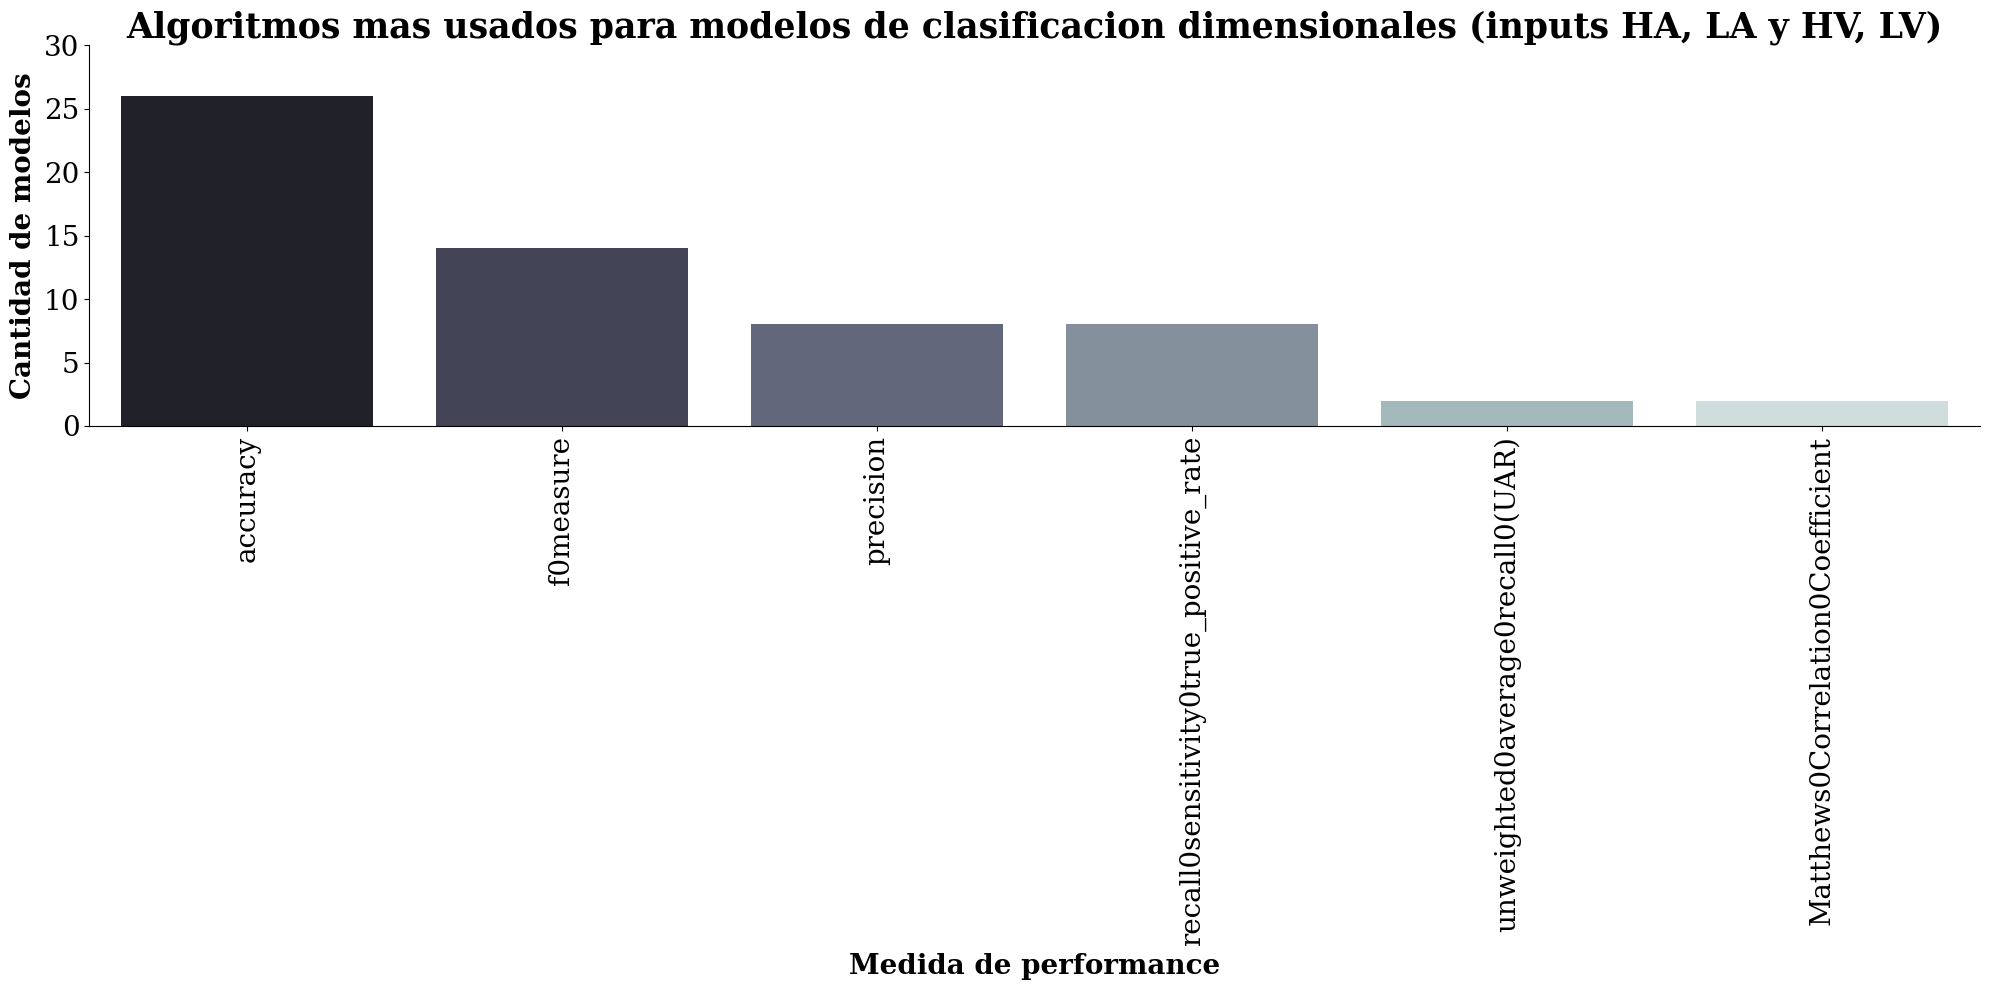

In [23]:
df_performance_medidas = multi_reversing_n(df2, 'paper_id',df2.iloc[:,5:])
titulos = ['Algoritmos mas usados para modelos de clasificacion dimensionales (inputs HA, LA y HV, LV)', 'Medida de performance', 'Cantidad de modelos']
bar_plot('variable',df_performance_medidas,titulos)

In [24]:
#filtramos por accuracy
df2 = df2.fillna('-')
df2 = df2[(df2['accuracy'] != '-') & (df2['accuracy'] != 0)]

In [25]:
df2[["paper_id", "apa_citation", "class_model_output_categories", "accuracy"]]

paper_id                                       apa_citation  \
0          3  Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...   
1          3  Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...   
4         20  Wiem, M. B. H., & Lachiri, Z. (2017). Emotion ...   
5         20  Wiem, M. B. H., & Lachiri, Z. (2017). Emotion ...   
6         23  Ayata, D., Yaslan, Y., & Kamasak, M. (2017). E...   
7         23  Ayata, D., Yaslan, Y., & Kamasak, M. (2017). E...   
10        32  Siddharth,  null, Jung, T.-P., & Sejnowski, T....   
11        32  Siddharth,  null, Jung, T.-P., & Sejnowski, T....   
12        38  Ayata, D., Yaslan, Y., & Kamasak, M. (2017). E...   
13        38  Ayata, D., Yaslan, Y., & Kamasak, M. (2017). E...   
14        64  Sharma, V., Prakash, N. R., & Kalra, P. (2019)...   
15        64  Sharma, V., Prakash, N. R., & Kalra, P. (2019)...   
16        67  Ganapathy, N., Veeranki, Y. R., & Swaminathan,...   
17        67  Ganapathy, N., Veeranki, Y. R., & Swaminathan,...   
20        75  Chang, E. J., Rahimi, A., Benini, L., & Wu, A....   
21        75  Chang, E. J., Rahimi, A., Benini, L., & Wu, A....   
24        83  Santamaria-Granados, L., Munoz-Organero, M., R...   
25        83  Santamaria-Granados, L., Munoz-Organero, M., R...   
26        87  Ganapathy, N., & Swaminathan, R. (2020). Emoti...   
27        87  Ganapathy, N., & Swaminathan, R. (2020). Emoti...   
28        92  Susanto, I. Y., Pan, T. Y., Chen, C. W., Hu, M...   
29        92  Susanto, I. Y., Pan, T. Y., Chen, C. W., Hu, M...   
30        95  Yin, G., Sun, S., Zhang, H., Yu, D., Li, C., Z...   
31        95  Yin, G., Sun, S., Zhang, H., Yu, D., Li, C., Z...   
34        98  Ganapathy, N., & Swaminathan, R. (2019). Emoti...   
35        98  Ganapathy, N., & Swaminathan, R. (2019). Emoti...   

   class_model_output_categories  accuracy  
0                         HA, LA     71.53  
1                         HV, LV     71.04  
4                         HA, LA     62.23  
5                         HV, LV     55.78  
6                         HA, LA     71.53  
7                         HV, LV     71.04  
10                        HA, LA     64.84  
11                        HV, LV     63.28  
12                        HA, LA     50.54  
13                        HV, LV     65.33  
14                        HA, LA     79.00  
15                        HV, LV     69.80  
16                        HV, LV     53.68  
17                        HA, LA     62.11  
20                        HV, LV     71.20  
21                        HA, LA     64.33  
24                        HA, LA     69.00  
25                        HV, LV     67.00  
26                        HA, LA     72.08  
27                        HV, LV     68.90  
28                        HA, LA     59.88  
29                        HV, LV     60.13  
30                        HV, LV     55.92  
31                        HA, LA     57.24  
34                        HA, LA     65.63  
35                        HV, LV     68.75

In [26]:
#creamos df para el analisis estadistico
df_3 = df2[["class_model_output_categories","accuracy"]]
df_3

class_model_output_categories  accuracy
0                         HA, LA     71.53
1                         HV, LV     71.04
4                         HA, LA     62.23
5                         HV, LV     55.78
6                         HA, LA     71.53
7                         HV, LV     71.04
10                        HA, LA     64.84
11                        HV, LV     63.28
12                        HA, LA     50.54
13                        HV, LV     65.33
14                        HA, LA     79.00
15                        HV, LV     69.80
16                        HV, LV     53.68
17                        HA, LA     62.11
20                        HV, LV     71.20
21                        HA, LA     64.33
24                        HA, LA     69.00
25                        HV, LV     67.00
26                        HA, LA     72.08
27                        HV, LV     68.90
28                        HA, LA     59.88
29                        HV, LV     60.13
30                        HV, LV     55.92
31                        HA, LA     57.24
34                        HA, LA     65.63
35                        HV, LV     68.75

Aplicamos los estadísticos

obtenido de: https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

In [27]:
#creacion lista con la performance para arousal y valence
df_arousal = df_3[df_3['class_model_output_categories'] == 'HA, LA']
df_arousal = df_arousal['accuracy']
arousal1 = df_arousal.values.tolist()
arousal1 = list(map(float, arousal1))

df_valence = df_3[df_3['class_model_output_categories'] == 'HV, LV']
df_valence = df_valence['accuracy']
valence1 = df_valence.values.tolist()
valence1 = list(map(float, valence1))

p1 = stats.ttest_rel(arousal1, valence1, alternative = "greater")

print(p1)

#Test parametrico - t de student
#t_student(arousal1, valence1)

#Test no parametrico - U de Mann-Whitney
#mann_whitney_u(arousal1, valence1)

Ttest_relResult(statistic=0.35229084656919984, pvalue=0.3653649152631109)


### ¿Cual es la performance promedio (usando accuracy) para cada anio?

1. Hacer un plots para ver como cambia la performance promedio (accuracy) en general con el paso del tiempo.  Esto lo resolveria con un box plot por año de accuracy. Donde en el eje X este de 2010 a 2020, y en el eje Y este el accuracy. Con este plot podriamos analizar si efectivamente mejora la performance de los modelos predictivos con el paso del tiempo

creacion df para el plot, con el anio las dimensiones y a performance

In [28]:
performances_av = df2[["year", "class_model_output_categories", "accuracy"]]
#reemplazos
performances_av[['class_model_output_categories']] = performances_av[['class_model_output_categories']].replace(['HA, LA', 'HV, LV' ], ['arousal', 'valence' ])
performances_av.rename(columns = {'class_model_output_categories':'dimension', 'accuracy':'performance'}, inplace = True)

performances_av

C:\Users\someo\AppData\Local\Temp\ipykernel_8148\1501514481.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  performances_av[['class_model_output_categories']] = performances_av[['class_model_output_categories']].replace(['HA, LA', 'HV, LV' ], ['arousal', 'valence' ])
C:\Users\someo\AppData\Local\Temp\ipykernel_8148\1501514481.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  performances_av.rename(columns = {'class_model_output_categories':'dimension', 'accuracy':'performance'}, inplace = True)


year dimension  performance
0   2018   arousal        71.53
1   2018   valence        71.04
4   2017   arousal        62.23
5   2017   valence        55.78
6   2017   arousal        71.53
7   2017   valence        71.04
10  2018   arousal        64.84
11  2018   valence        63.28
12  2017   arousal        50.54
13  2017   valence        65.33
14  2019   arousal        79.00
15  2019   valence        69.80
16  2020   valence        53.68
17  2020   arousal        62.11
20  2019   valence        71.20
21  2019   arousal        64.33
24  2019   arousal        69.00
25  2019   valence        67.00
26  2020   arousal        72.08
27  2020   valence        68.90
28  2020   arousal        59.88
29  2020   valence        60.13
30  2020   valence        55.92
31  2020   arousal        57.24
34  2020   arousal        65.63
35  2020   valence        68.75

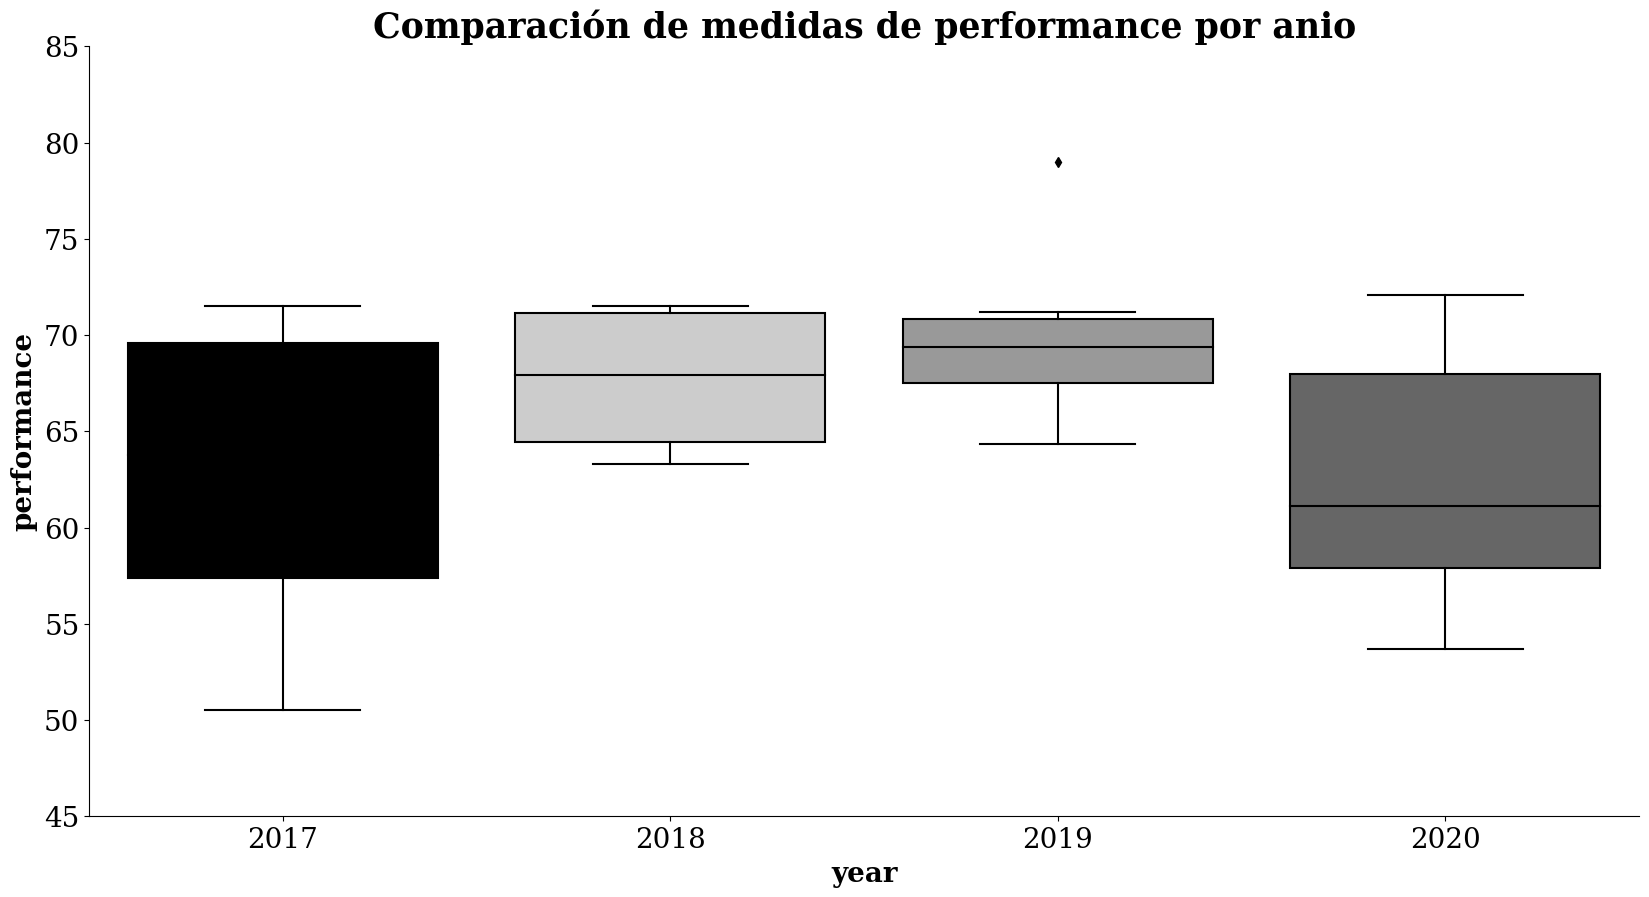

In [29]:
g = sns.boxplot(y="performance", x="year", data=performances_av)
g.set(title = 'Comparación de medidas de performance por anio')
plt.savefig('.\\Emmanuel\\figures\\NUEVOS. Comparación de medidas de performance por anio.png')

1.bis. subsjetear esta progresion de accuracies pero por dimension afectiva: hacer un plot (conjunto de boxplots de 2010 a 2020) de valencia y otro plot (conjunto de boxplots de 2010 a 2020) de arousal. Este plot nos ayudaría a ver si cambia la progresion de accuracies dependiendo cada dimension afectiva

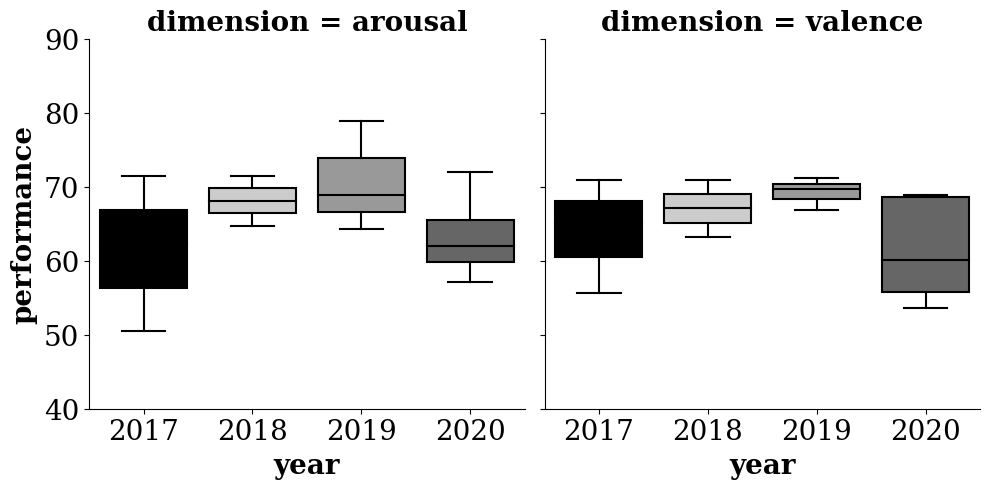

In [30]:
g = sns.catplot(x="year", y="performance", col =  "dimension", data=performances_av, kind="box")
plt.savefig('.\\Emmanuel\\figures\\NUEVOS. Comparación de medidas de performance por anio, para valence y arousal.png')

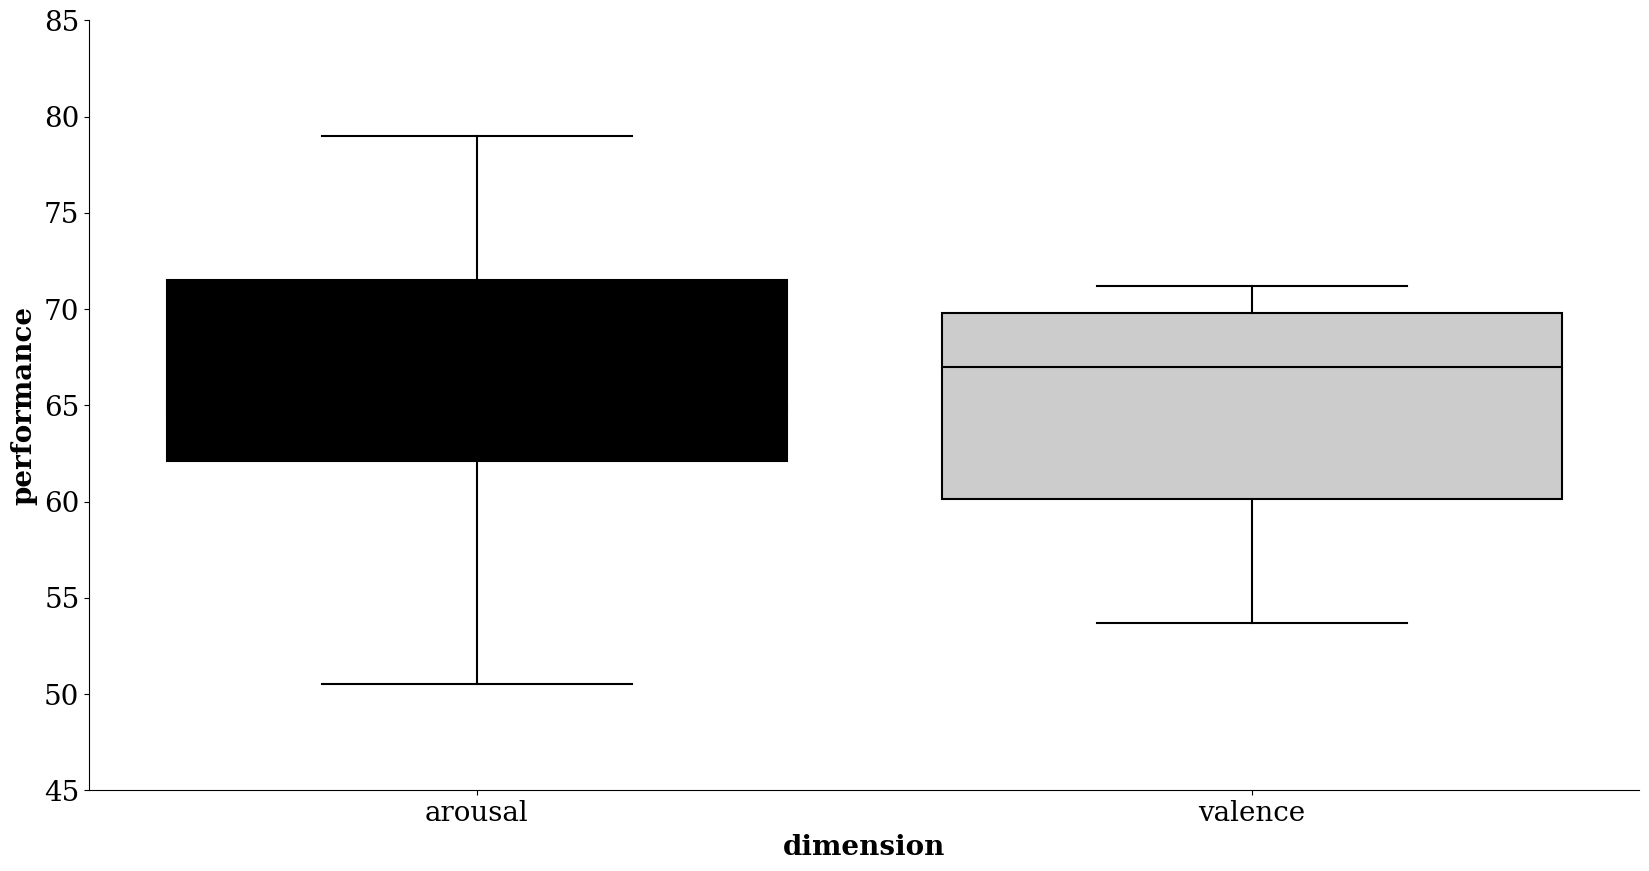

In [31]:
g = sns.boxplot(y="performance", x="dimension", data=performances_av)

### ¿Cual es la evolucion temporal (2010-2020) del uso de los modelos de regresion y categoriales empleados?
Cantidad de modelos de regresion o categorial por anio

2. Hacer un plot de la progresión de modelos de regresión vs clasificación de 2010 a 2020. Este plot deberia ser igual al plot que ve la progresion de modelos dimensioanles vs categoriales. La idea con este plot seria analizar sin la progresion de papers basados en modelos dimensioanels se acompaña con modelso estadísticos de regresion (que es lo que se esperaria dado el tipo de variable, pero asumimos que no sucede)

In [32]:
def label_model (row):
   if row['is_classifier'] == "x" :
      return 'classifier'
   if row['is_regressor'] == "x" :
      return 'regressor'
   return 'Other'

In [33]:
df_statistical_learning_models['model']  = df_statistical_learning_models.apply(lambda row: label_model(row), axis=1)

In [34]:
df_statistical_learning_models['model'].value_counts()

classifier    448
regressor      51
Name: model, dtype: int64

In [35]:
df_models = df_statistical_learning_models[["apa_citation",'model', "year", "model_id"]]

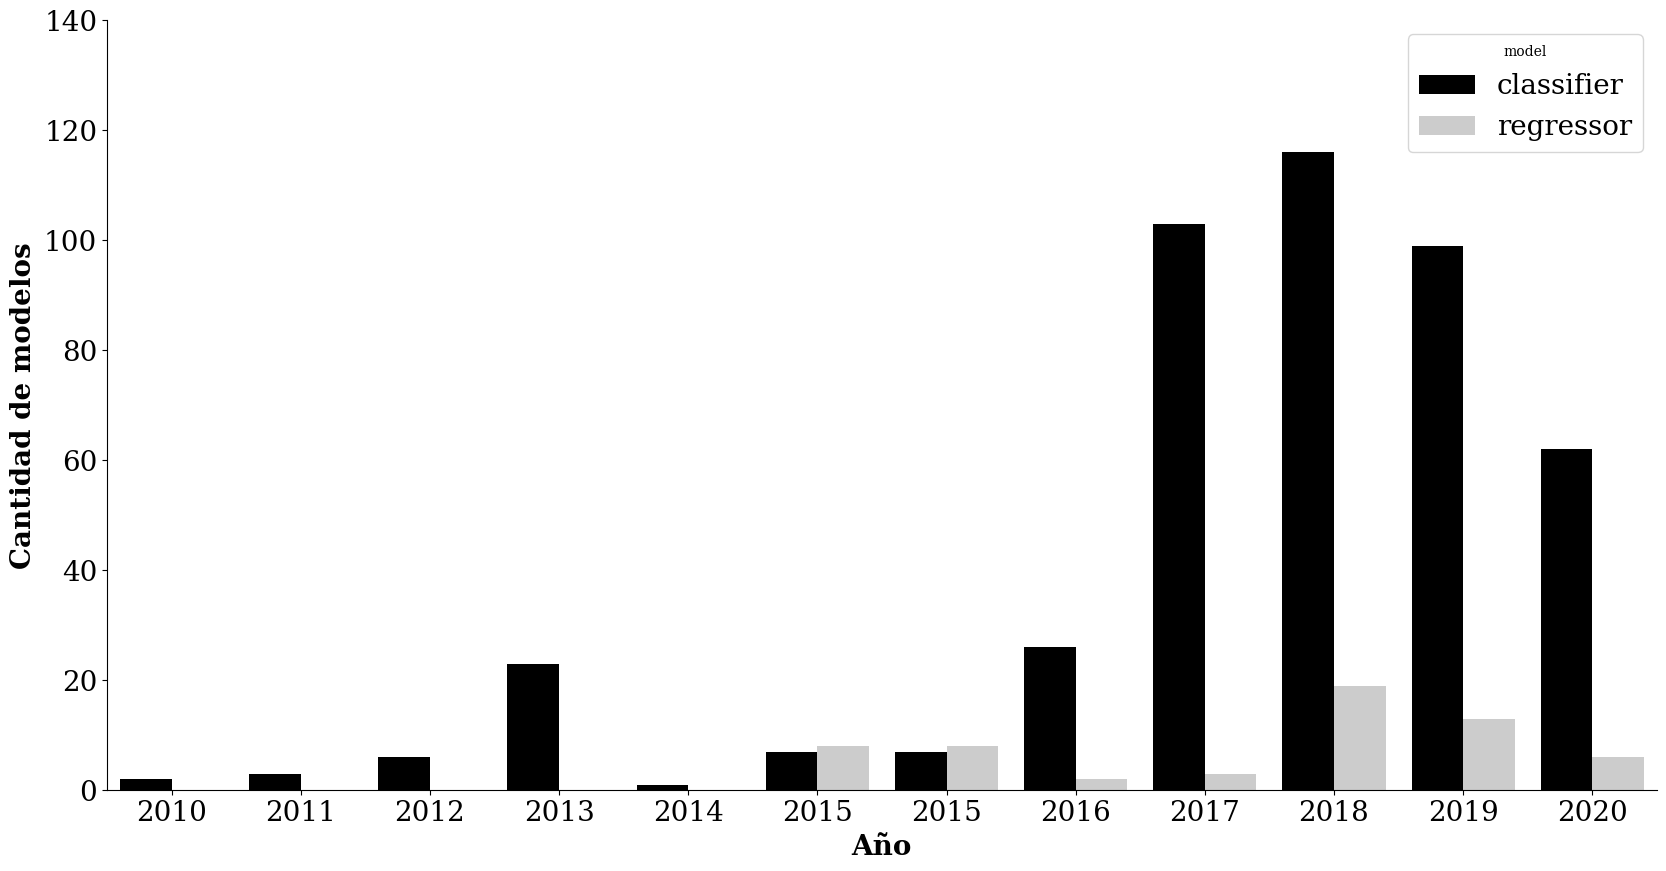

In [36]:
#ploteo
category_order = [2010, 2011, 2012, 2013, 2014, 2015, 2015, 2016, 2017, 2018, 2019, 2020]
g= sns.countplot(x='year', 
    data= df_models, 
    hue='model', 
    order=category_order)
g.set(xlabel = 'Año', ylabel = 'Cantidad de modelos')
plt.savefig('.\\Emmanuel\\figures\\NUEVOS. Cantidad de modelos de regresion y clasificacion por año (2010 - 2020).png')

### ¿Cuantas veces fueron testeadas juntas las distintas dimensiones y categorias emocionales?

#### Primero obtenemos las categorias emocionales usadas y su frecuencia

* Hubo 55 modelos que usaron categorias emocionales, siendo disgust, fear, y sadness las mas repetidas.
* Tener en cuenta que un modelo puede usar mas de una categoria, por lo que la funcion get_values no funciona en este caso, y un paper puede concentrar la mayoria de los usos de un conjunto de categorias

In [37]:
df_self_report = df_self_report.fillna('-')

In [38]:
emotional_categories_grouped = df_self_report.groupby(['paper_id','Stress', 'Disgust', 'Fear', 'Sadness', 'Surprise' ,'Happiness', 'Pleasant',
                            'Anxiety', 'Neutral', 'Funny', 'Boredom', 'Relaxation', 'Amusement', 'Joy']).nth(0)
emotional_categories_grouped.reset_index(inplace=True)

In [39]:
emotional_categories_grouped = multi_reversing(
    emotional_categories_grouped, 'paper_id', 
    emotional_categories_grouped
    [[
    'Stress', 'Disgust', 'Fear', 'Sadness', 'Surprise' ,'Happiness', 'Pleasant',
    'Anxiety', 'Neutral', 'Funny', 'Boredom', 'Relaxation', 'Amusement', 'Joy'
    ]])

In [40]:
emotional_categories_grouped

paper_id variable value
74          72   Stress     x
106          4  Disgust     x
112         10  Disgust     x
118         16  Disgust     x
122         20  Disgust     x
...        ...      ...   ...
1376        37      Joy     x
1399        59      Joy     x
1401        60      Joy     x
1410        69      Joy     x
1431        90      Joy     x

[138 rows x 3 columns]

In [41]:
print(emotional_categories_grouped['variable'].value_counts())
print(emotional_categories_grouped['variable'].unique())

Disgust       19
Fear          19
Sadness       19
Neutral       19
Surprise      17
Anxiety       11
Amusement     10
Joy           10
Happiness      8
Boredom        2
Stress         1
Pleasant       1
Funny          1
Relaxation     1
Name: variable, dtype: int64
['Stress' 'Disgust' 'Fear' 'Sadness' 'Surprise' 'Happiness' 'Pleasant'
 'Anxiety' 'Neutral' 'Funny' 'Boredom' 'Relaxation' 'Amusement' 'Joy']


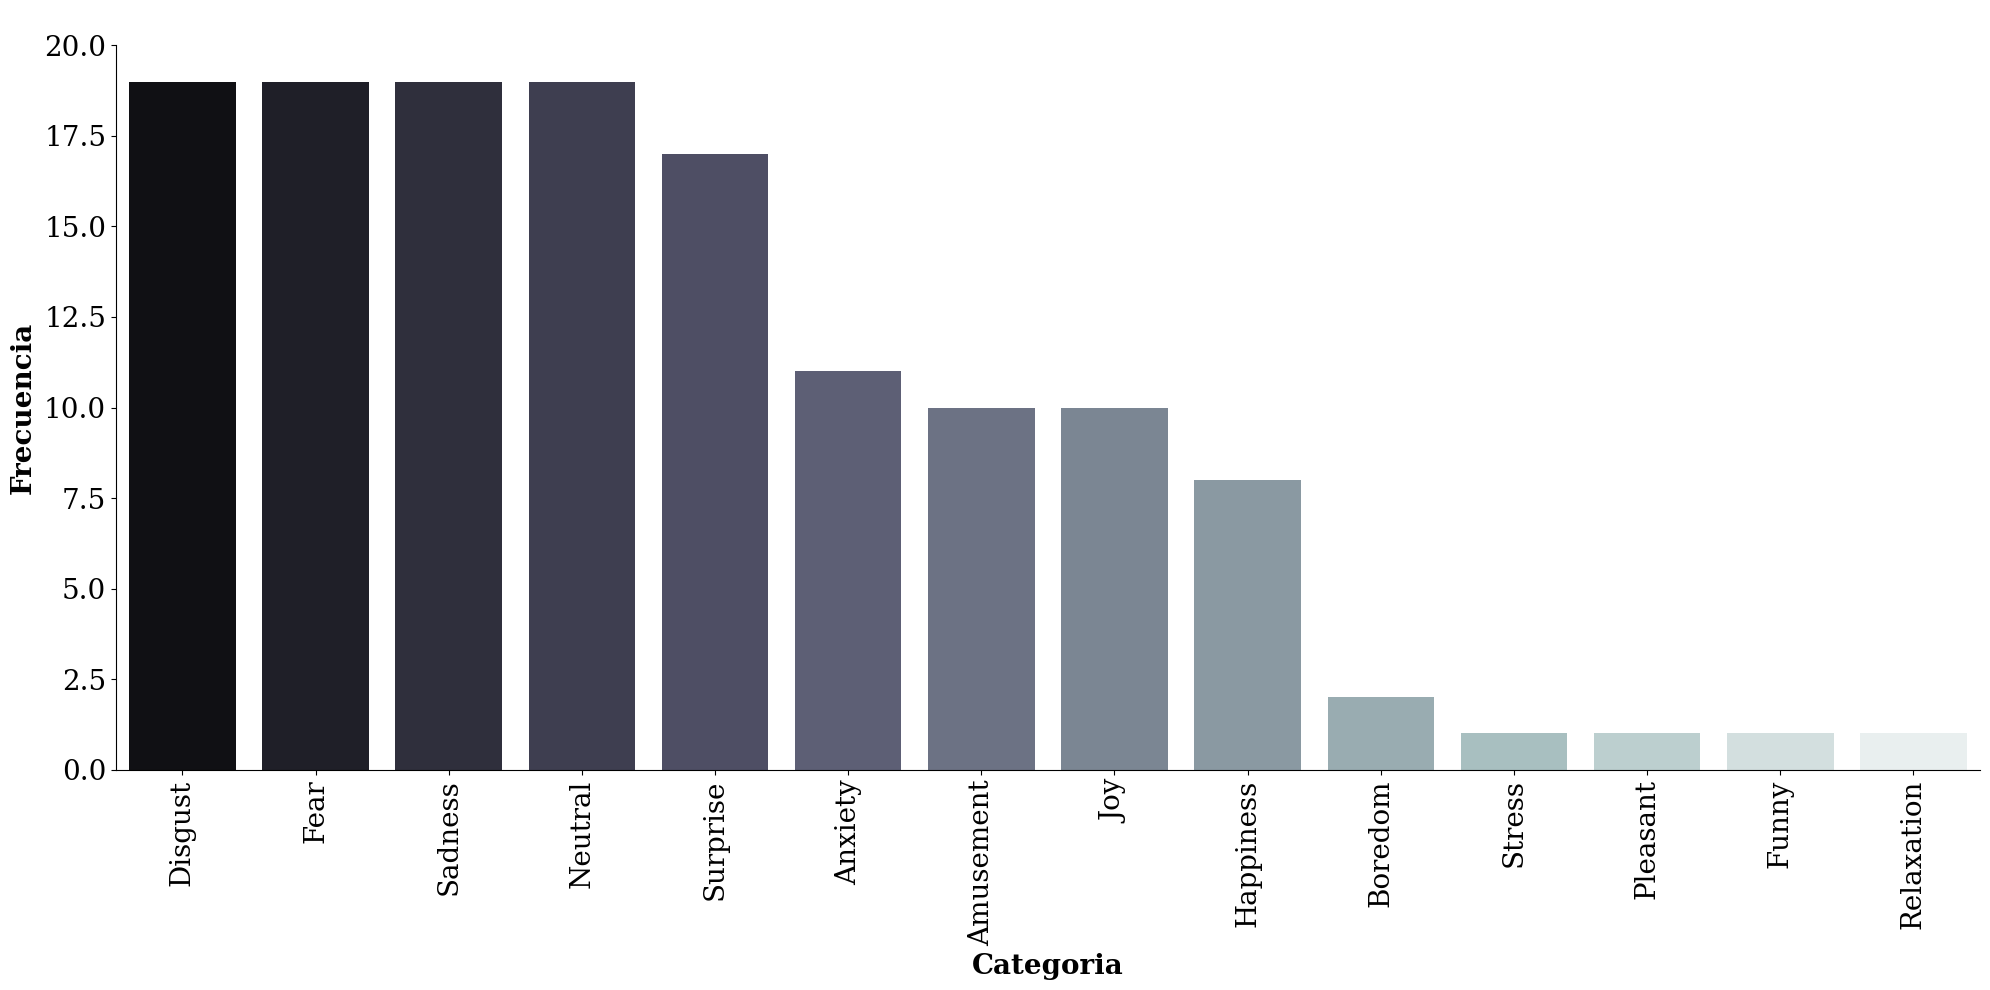

In [42]:
titulos = [' ', 'Categoria', 'Frecuencia']
bar_plot('variable',emotional_categories_grouped,titulos)

In [43]:
emotional_dimensions_grouped = df_self_report.groupby([
    'paper_id','valence',
    'arousal', 'dominance', 'like / dislike', 'familiarity', 'engagement',
    'predictability']).nth(0)
emotional_dimensions_grouped.reset_index(inplace=True)

In [44]:
emotional_dimensions_grouped = multi_reversing(
    emotional_dimensions_grouped, 'paper_id', 
    emotional_dimensions_grouped
    [[
    'valence',
    'arousal', 'dominance', 'like / dislike', 'familiarity', 'engagement',
    'predictability'
    ]])

In [45]:
emotional_dimensions_grouped

paper_id        variable value
2           3         valence     x
3           4         valence     x
4           5         valence     x
9          10         valence     x
10         11         valence     x
..        ...             ...   ...
658        35  predictability     x
662        37  predictability     x
685        59  predictability     x
686        60  predictability     x
696        69  predictability     x

[177 rows x 3 columns]

In [46]:
print(emotional_dimensions_grouped['variable'].value_counts())
print(emotional_dimensions_grouped['variable'].unique())

valence           49
arousal           49
dominance         29
like / dislike    20
familiarity       19
predictability     9
engagement         2
Name: variable, dtype: int64
['valence' 'arousal' 'dominance' 'like / dislike' 'familiarity'
 'engagement' 'predictability']


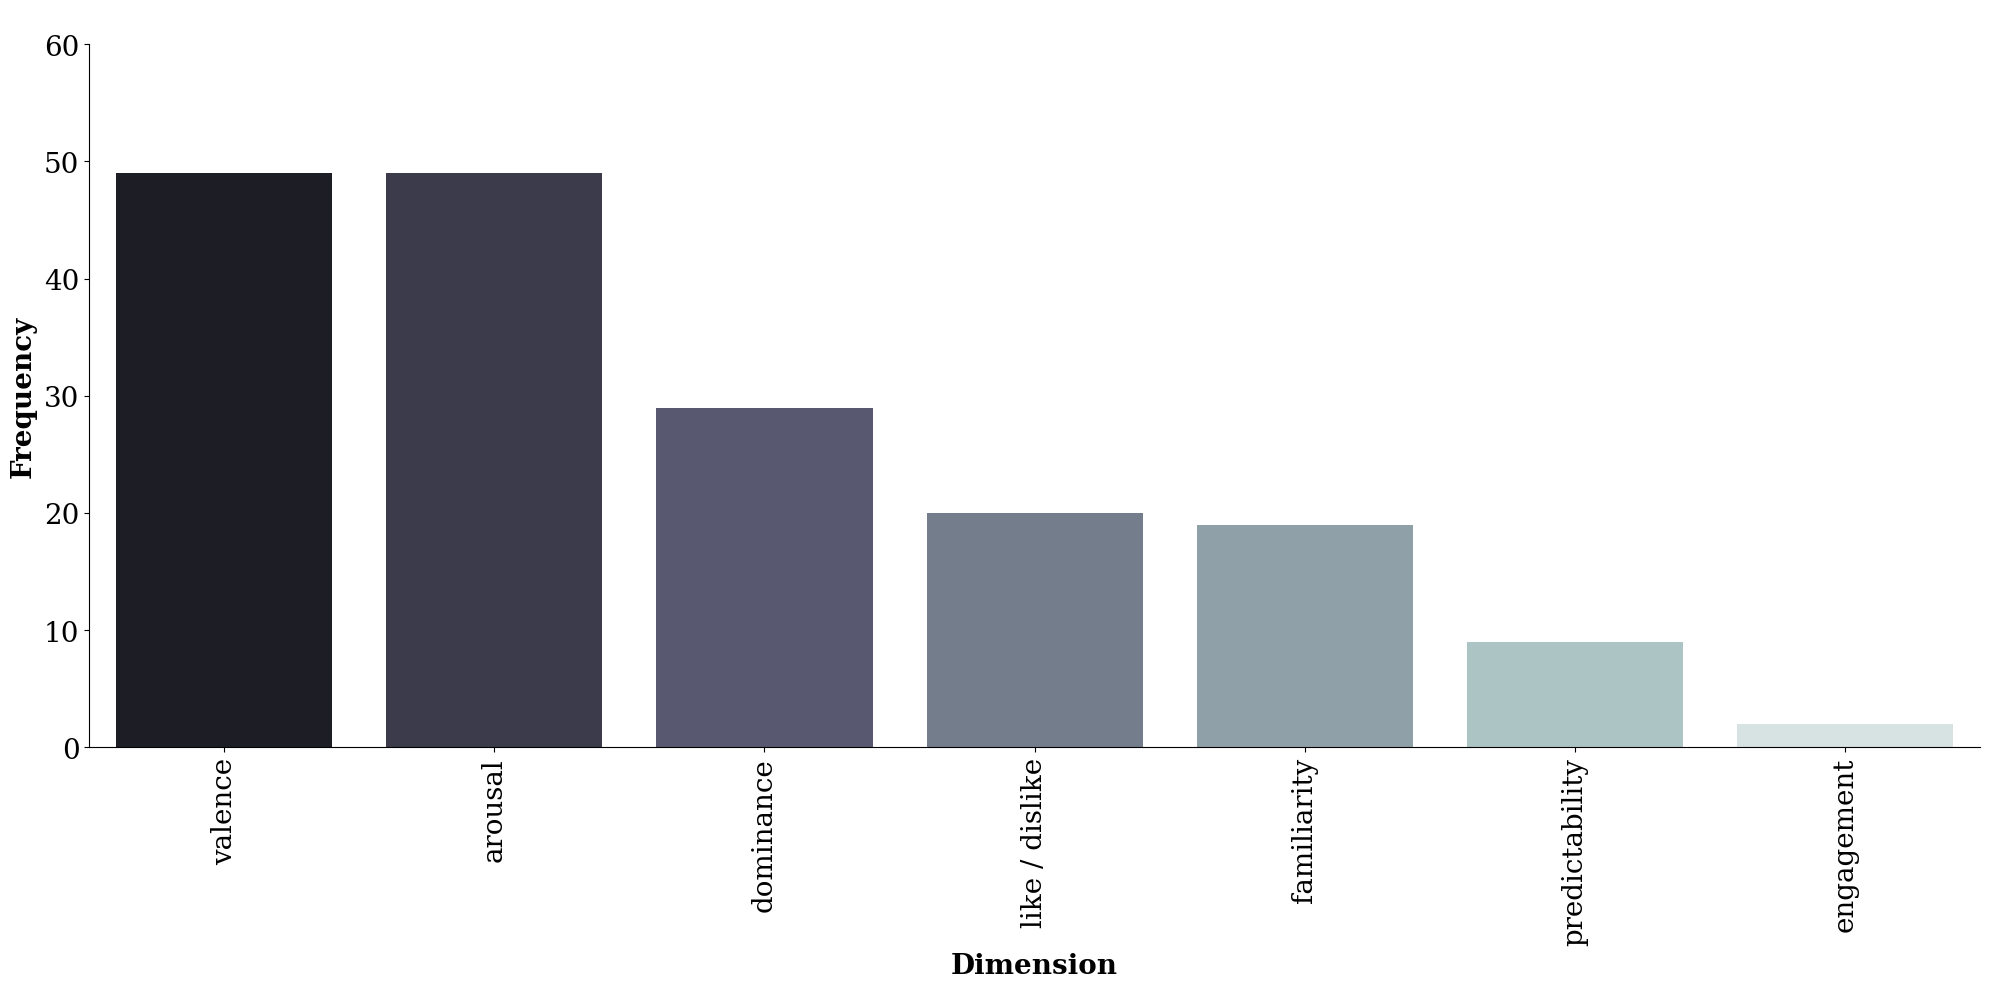

In [47]:
titulos = [' ', 'Dimension', 'Frequency']
bar_plot('variable',emotional_dimensions_grouped,titulos)

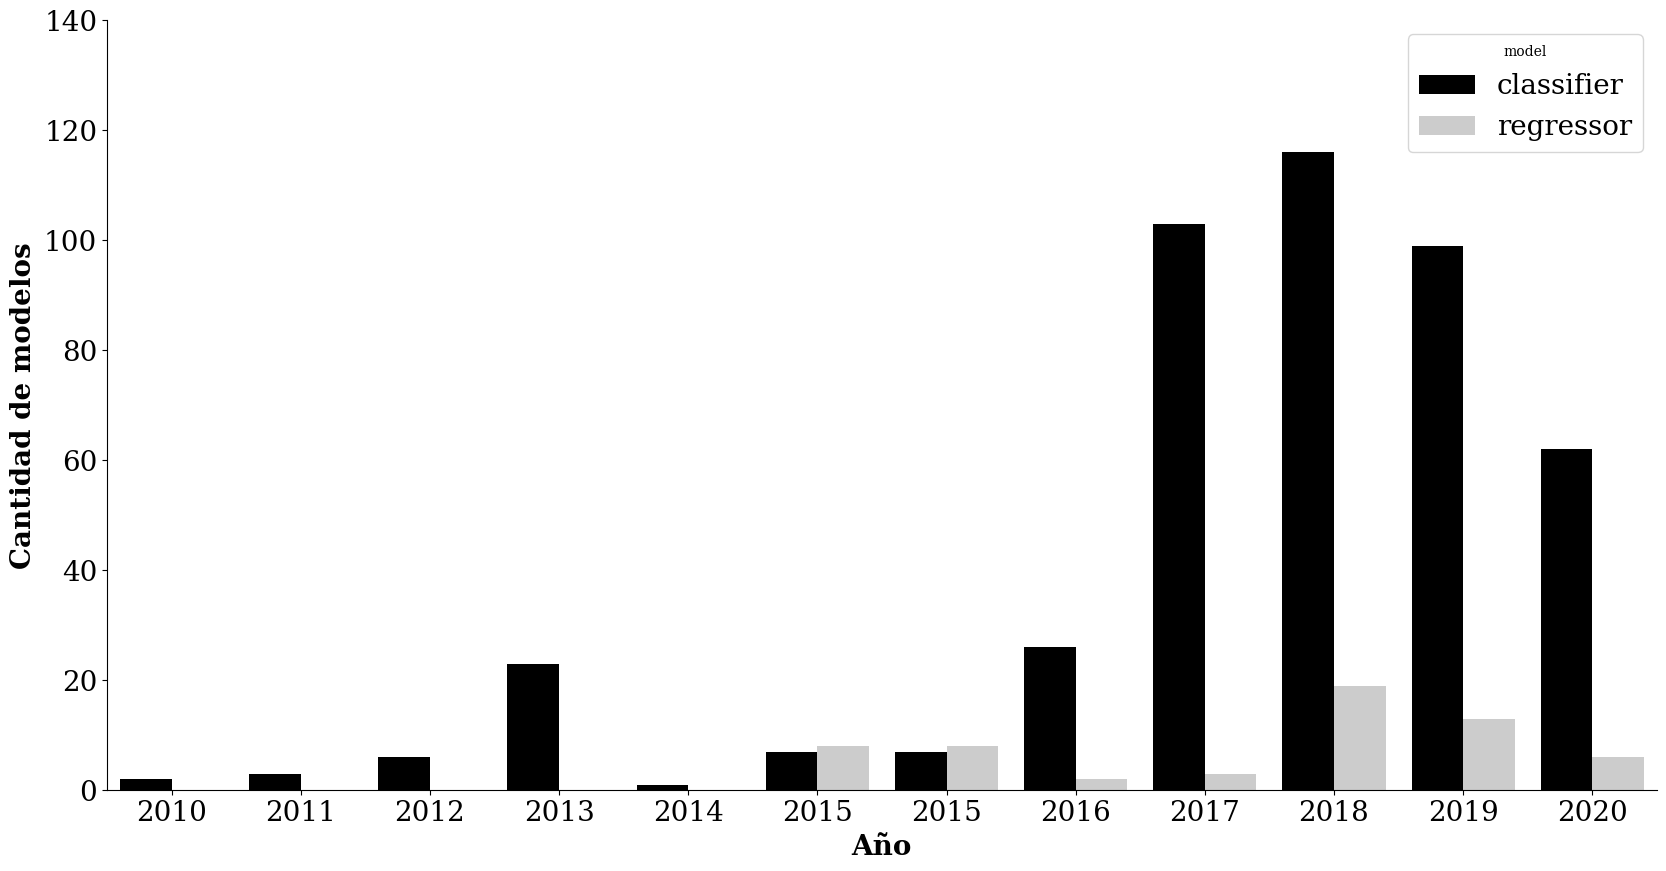

In [48]:
g= sns.countplot(x='year', 
    data= df_models, 
    hue='model', 
    order=category_order)
g.set(xlabel = 'Año', ylabel = 'Cantidad de modelos')
plt.savefig('.\\Emmanuel\\figures\\NUEVOS. Cantidad de modelos de regresion y clasificacion por año (2010 - 2020).png')

In [49]:
df_models["model"].value_counts()

classifier    448
regressor      51
Name: model, dtype: int64

In [50]:
df_models["model"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

classifier    89.8%
regressor     10.2%
Name: model, dtype: object

#### Creamos el grafo
https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [51]:
#creacion matrix de adyacencia
df_self_report.fillna('-', inplace= True)
self_0 = df_self_report[df_self_report['is_categorial']!= '-']

df_matrix_con_paperid_0 = self_0.groupby(
        ["paper_id",'Anger',
        'Stress', 'Disgust', 'Fear', 'Sadness', 'Surprise', 'Happiness',
        'Pleasant', 'Anxiety', 'Neutral', 'Funny', 'Boredom', 'Relaxation', 'Amusement', 'Joy']
        ).nth(0)
df_matrix_con_paperid_0.reset_index(inplace=True)

print(df_matrix_con_paperid_0)

df_matrix = df_matrix_con_paperid_0[['Anger',
        'Stress', 'Disgust', 'Fear', 'Sadness', 'Surprise', 'Happiness',
        'Pleasant', 'Anxiety', 'Neutral', 'Funny', 'Boredom', 'Relaxation', 'Amusement', 'Joy']
        ]

df_matrix = df_matrix.replace('-', 0)
df_matrix = df_matrix.replace('x', 1)
adj_matrix = df_matrix.T.dot(df_matrix)
np.fill_diagonal(adj_matrix.values, 0)

    paper_id Anger Stress Disgust Fear Sadness Surprise Happiness Pleasant  \
0          4     x      -       x    x       x        x         -        -   
1         10     x      -       x    x       x        x         -        -   
2         16     x      -       x    x       x        x         -        -   
3         20     x      -       x    x       x        x         -        -   
4         32     x      -       x    x       x        x         x        -   
5         35     x      -       x    x       x        x         -        -   
6         37     x      -       x    x       x        x         -        -   
7         37     x      -       x    x       x        x         x        -   
8         43     -      -       -    -       -        -         -        -   
9         59     x      -       x    x       x        x         -        -   
10        60     x      -       x    x       x        x         -        -   
11        61     -      -       -    -       -        -         

In [52]:
adj_matrix

Anger  Stress  Disgust  Fear  Sadness  Surprise  Happiness  \
Anger           0       0       18    18       18        17          8   
Stress          0       0        0     0        0         0          0   
Disgust        18       0        0    19       19        17          8   
Fear           18       0       19     0       19        17          8   
Sadness        18       0       19    19        0        17          8   
Surprise       17       0       17    17       17         0          8   
Happiness       8       0        8     8        8         8          0   
Pleasant        0       0        1     1        1         0          0   
Anxiety         9       0       10    10       10         9          0   
Neutral        17       0       17    17       17        17          8   
Funny           0       0        0     0        0         0          0   
Boredom         0       0        0     0        0         0          0   
Relaxation      0       0        0     0        0         0          0   
Amusement      10       0       10    10       10         9          0   
Joy             9       0        9     9        9         9          0   

            Pleasant  Anxiety  Neutral  Funny  Boredom  Relaxation  Amusement  \
Anger              0        9       17      0        0           0         10   
Stress             0        0        0      0        0           0          0   
Disgust            1       10       17      0        0           0         10   
Fear               1       10       17      0        0           0         10   
Sadness            1       10       17      0        0           0         10   
Surprise           0        9       17      0        0           0          9   
Happiness          0        0        8      0        0           0          0   
Pleasant           0        1        0      0        0           0          0   
Anxiety            1        0        9      0        0           0          9   
Neutral            0        9        0      1        0           0          9   
Funny              0        0        1      0        0           0          0   
Boredom            0        0        0      0        0           0          0   
Relaxation         0        0        0      0        0           0          0   
Amusement          0        9        9      0        0           0          0   
Joy                0        9        9      0        0           0          9   

            Joy  
Anger         9  
Stress        0  
Disgust       9  
Fear          9  
Sadness       9  
Surprise      9  
Happiness     0  
Pleasant      0  
Anxiety       9  
Neutral       9  
Funny         0  
Boredom       0  
Relaxation    0  
Amusement     9  
Joy           0

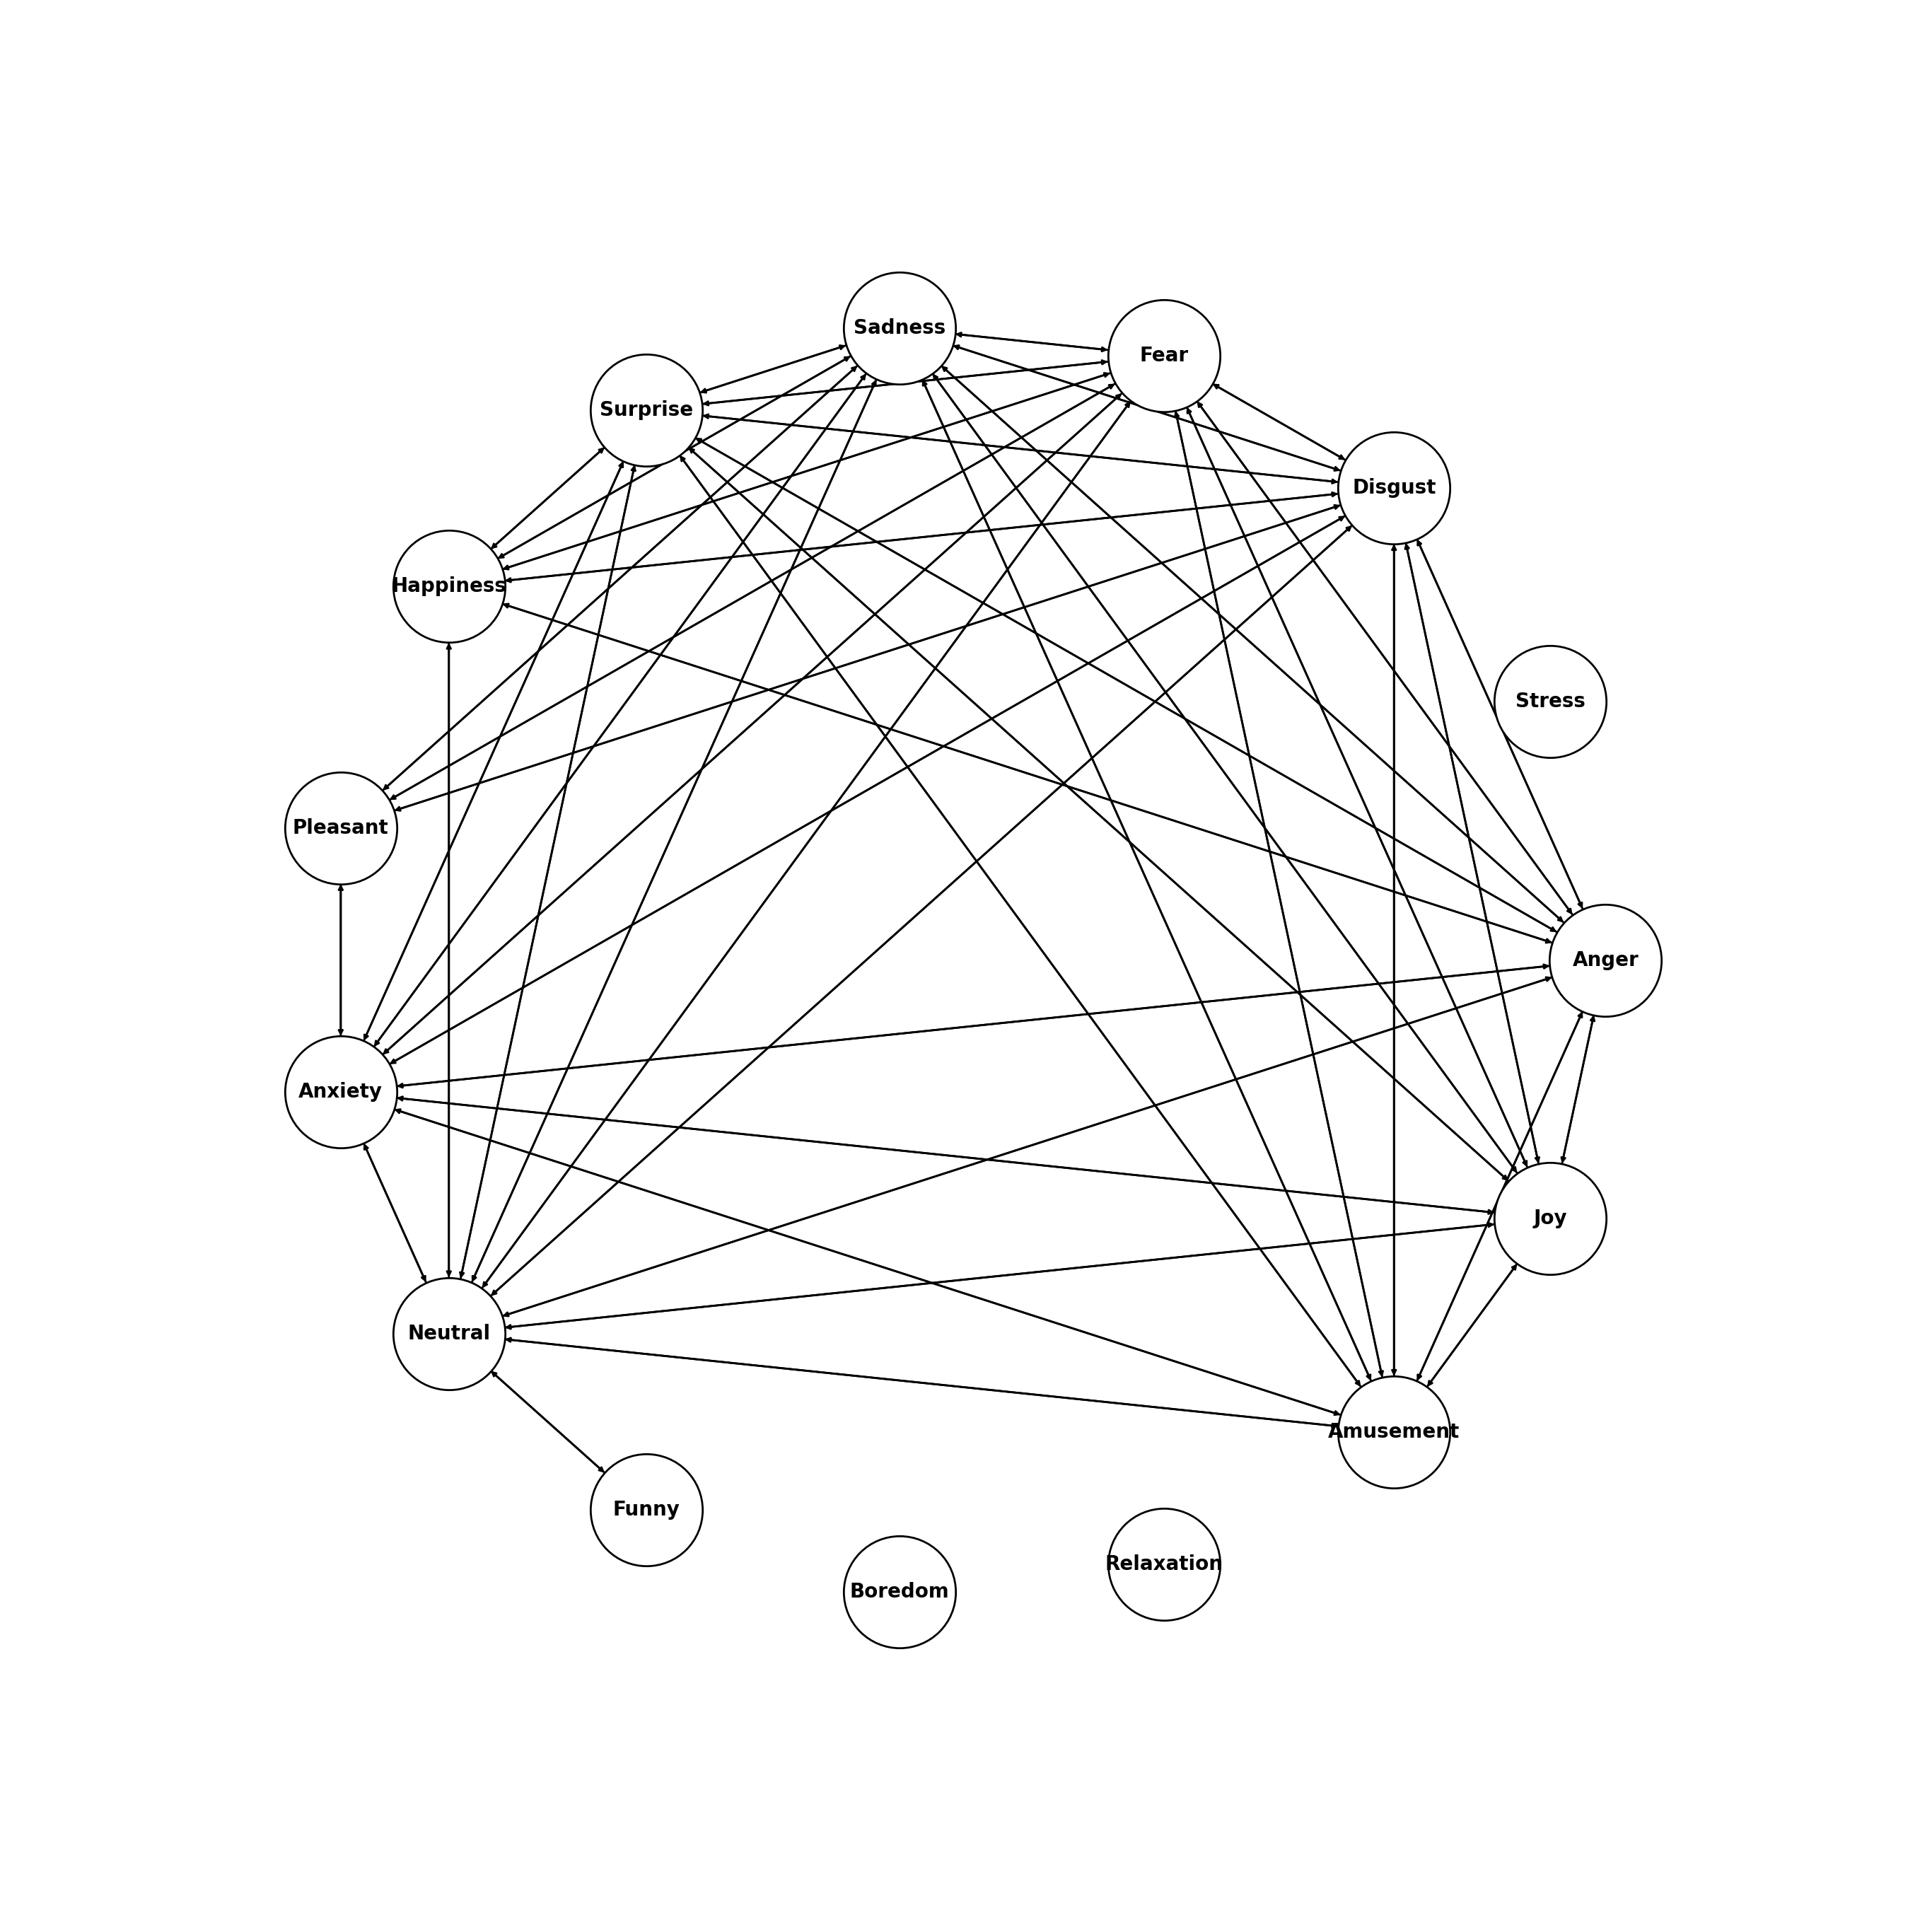

In [53]:
G = nx.DiGraph(adj_matrix)

fig, ax = plt.subplots(figsize=(35, 35))

g = nx.draw_circular(G, 
        with_labels=True,
        node_size=13000,
        node_color="white",
        edgecolors = "black",
        linewidths=2,
        font_size=20,
        font_color="black",
        font_weight="bold",
        width=2)
plt.savefig('.\\Emmanuel\\figures\\NUEVOS. Conexiones entre categorias emocionales.png')

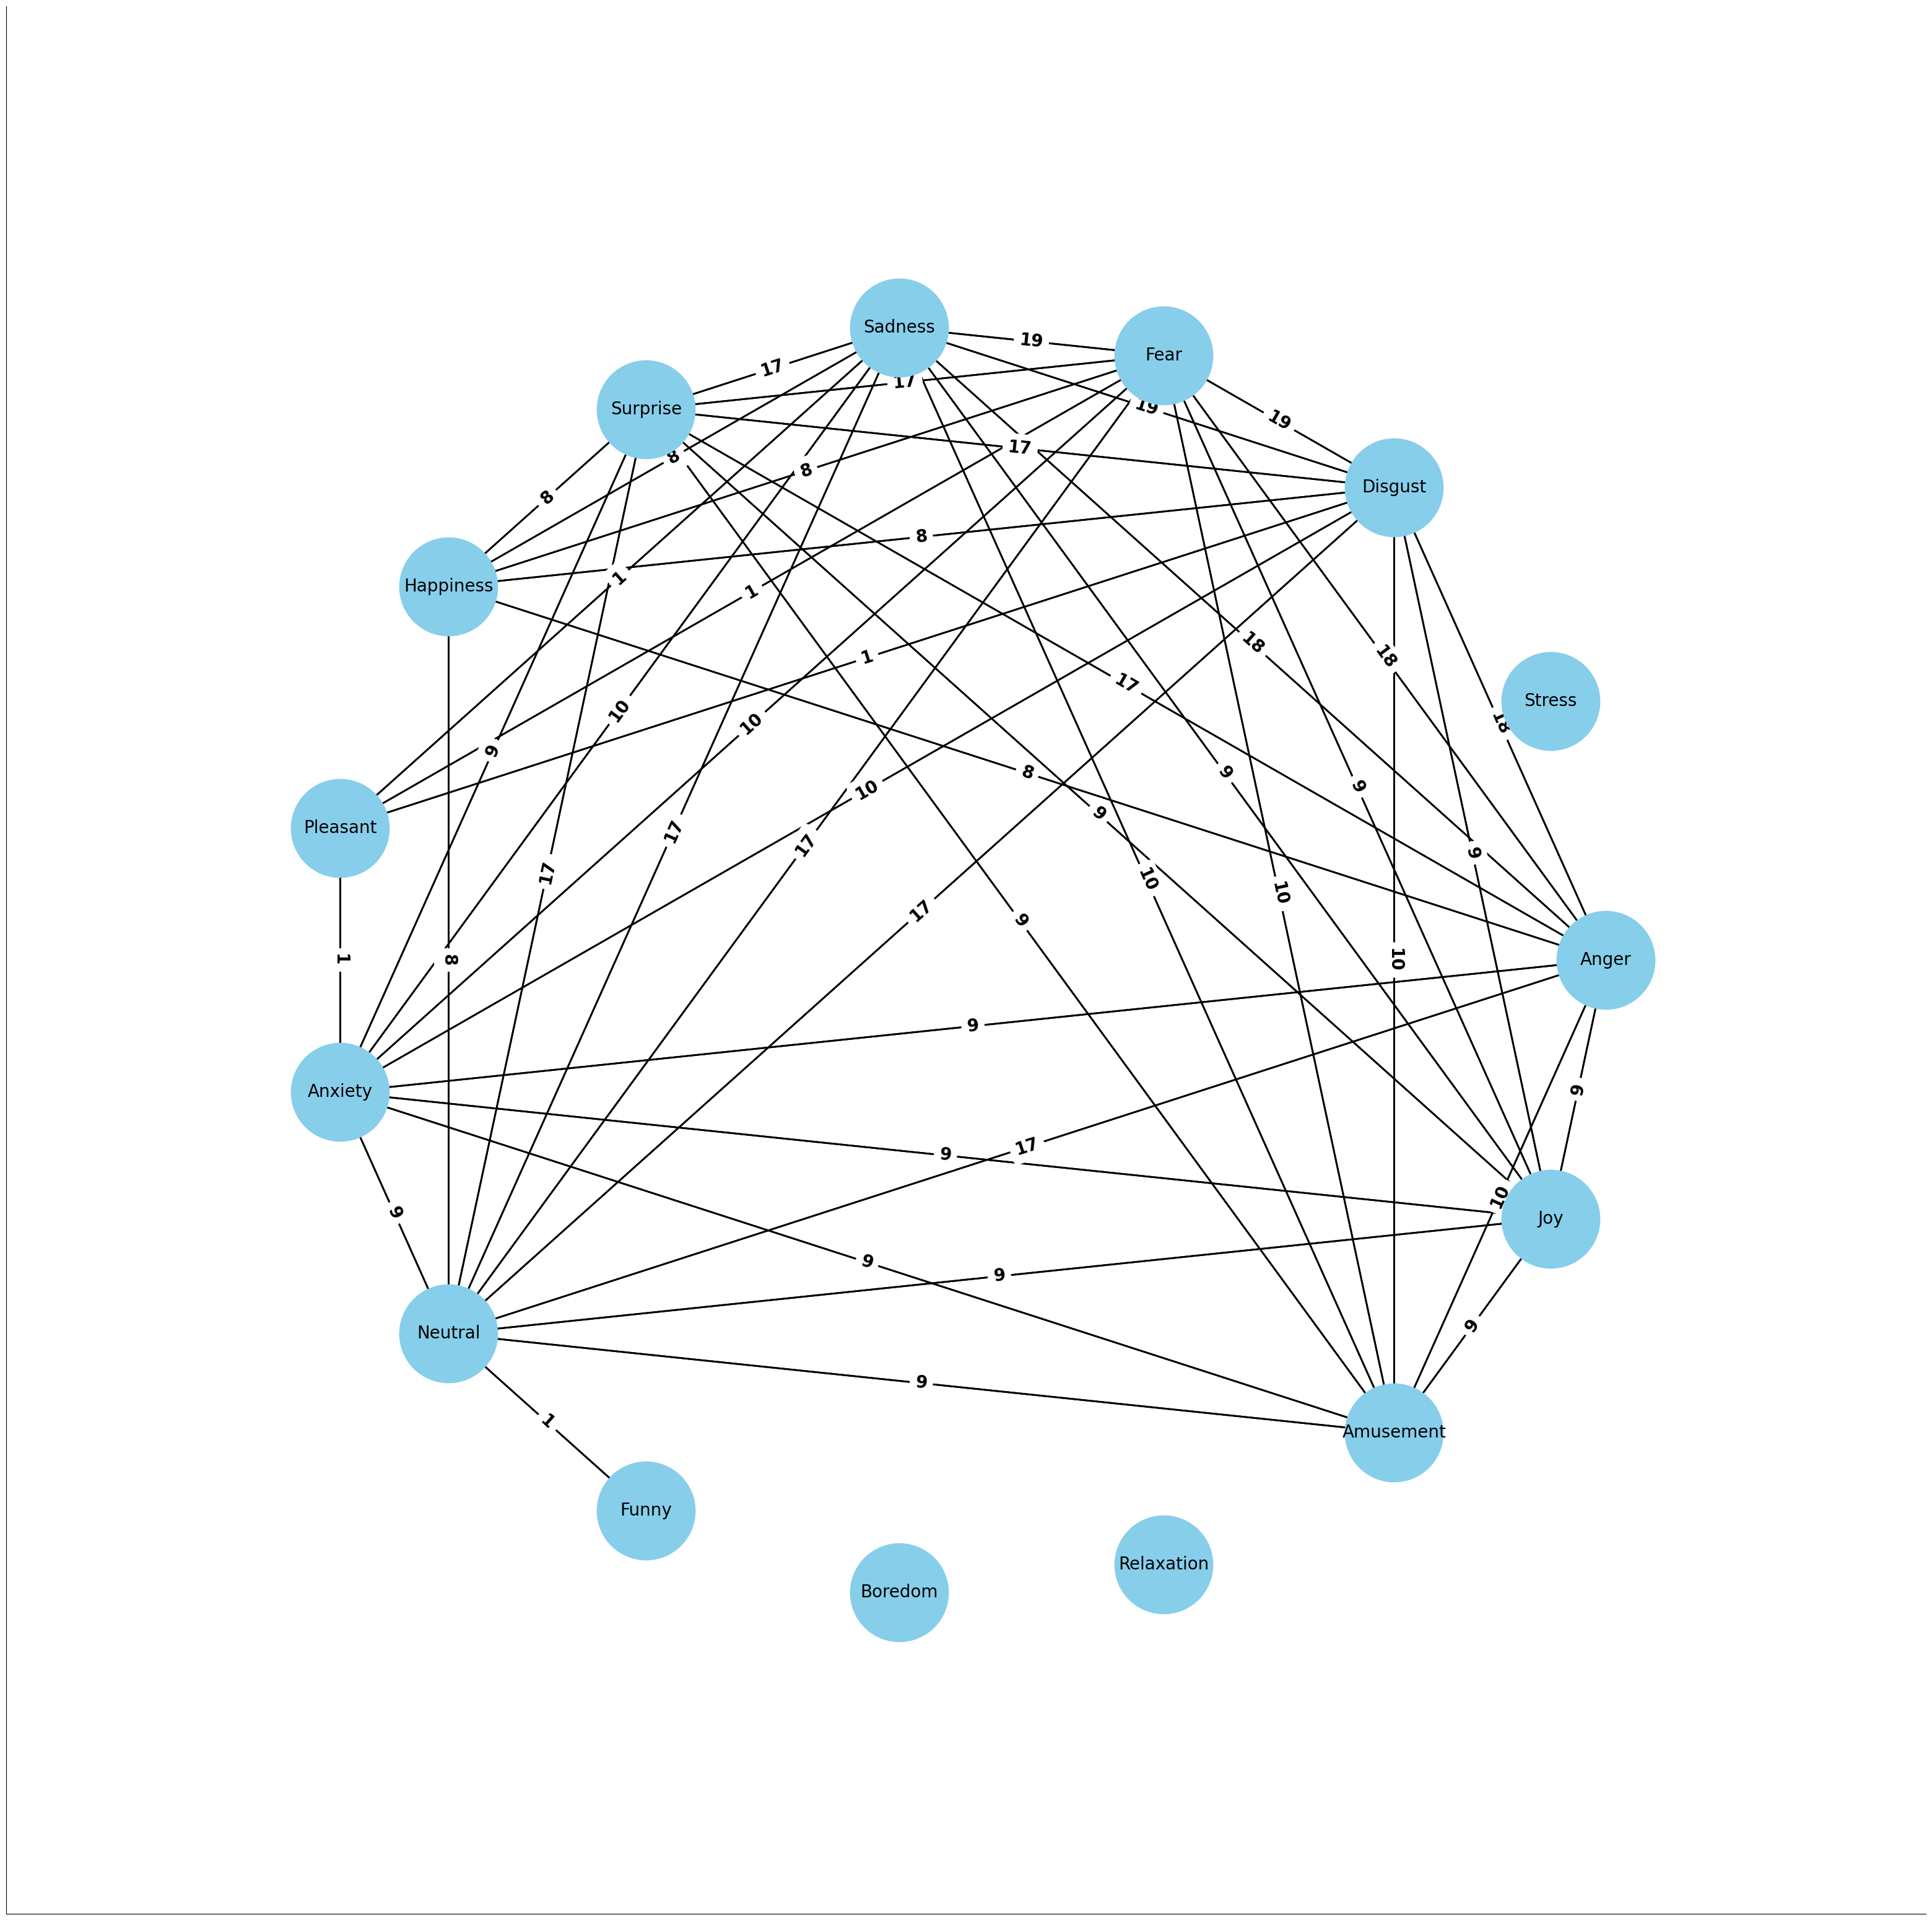

In [54]:
G.number_of_edges()

fig, ax = plt.subplots(figsize=(40, 40))

pos=nx.circular_layout(G)
weights=[wt for u, v, wt in G.edges(data="weight")]

nx.draw_networkx(G,pos,
        width=2,
        arrows=False,
        node_size=13000,
        node_color="skyblue",
        font_size=20)

labels=nx.get_edge_attributes(G, "weight") # entiendo que esto te permite poner la cantidad de frecuencia de cada relación con una etiqueta

nx.draw_networkx_edge_labels(G,pos,
        edge_labels=labels,
        font_size=20,
        font_color="black",
        font_weight="bold")

plt.savefig('.\\Emmanuel\\figures\\NUEVOS. Conexiones entre categorias emocionales - Numero de relaciones.png')

In [55]:
weights = nx.get_edge_attributes(G,'weight').values()


"""labels=nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G,pos,
        edge_labels=labels,
        font_size=20,
        font_color="black",
        font_weight="bold")"""

plt.savefig('.\\Emmanuel\\figures\\NUEVOS. Conexiones entre categorias emocionales - Grosor segun numero de relaciones.png')

<Figure size 2000x1000 with 0 Axes>

In [56]:
def nudge(pos, x_shift, y_shift):
    return {n:(x + x_shift, y + y_shift) for n,(x,y) in pos.items()}

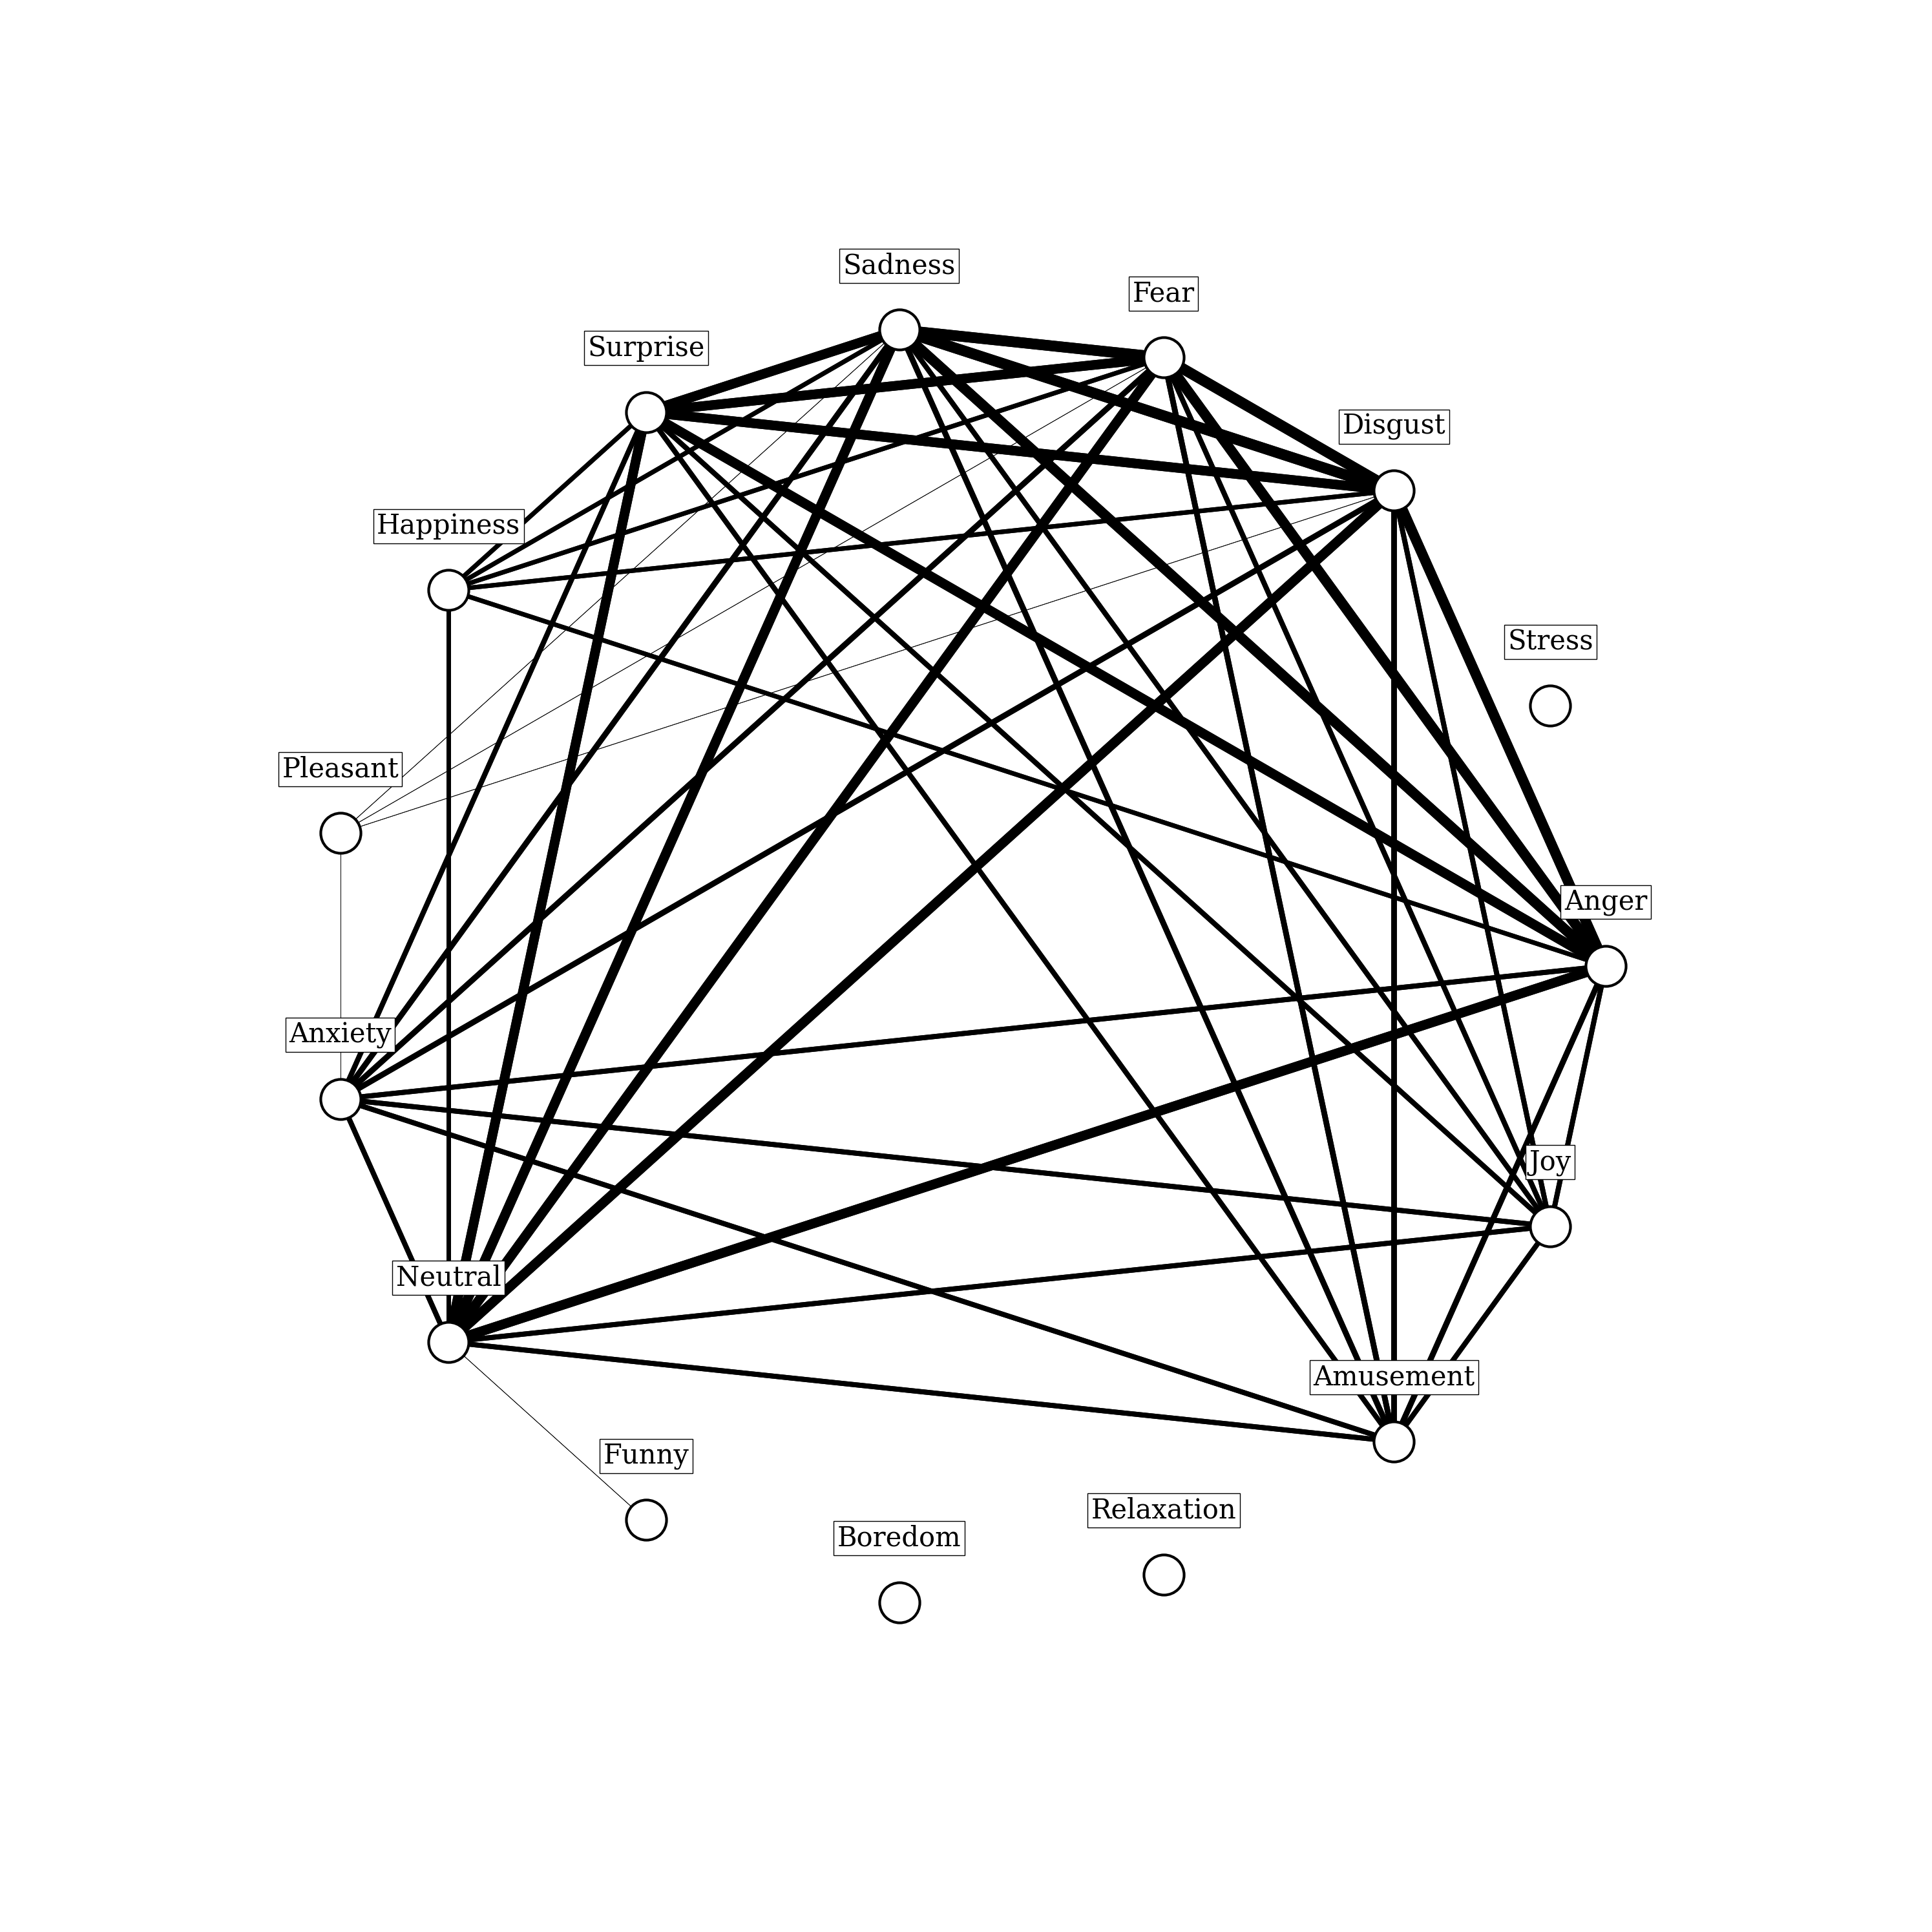

In [57]:

fig, ax = plt.subplots(figsize=(30, 30))

pos = nx.circular_layout(G)

nx.draw(G, pos, 
        edgecolors="black", 
        node_color='white',
        width=[i/1.6 for i in weights],
        node_size=2000,
        linewidths=3,
        alpha=1,
        font_size=25,
        font_weight="bold",
        arrows=False,
        edge_cmap=plt.colormaps['copper'])

boxes = dict(facecolor='white', alpha=1)

pos_nodes = nudge(pos, 0, 0.1)    
nx.draw_networkx_labels(G, pos=pos_nodes, labels=None, font_size=30, font_color='k',
                        font_family='serif', font_weight='normal', alpha=None, bbox=boxes, horizontalalignment='center', 
                        verticalalignment='center', ax=None, clip_on=True)

plt.tight_layout()

In [58]:
relaciones(weights)

Interacciones con 9 conexiones se observaron 14.0 veces.
Interacciones con 17 conexiones se observaron 9.0 veces.
Interacciones con 10 conexiones se observaron 7.0 veces.
Interacciones con 8 conexiones se observaron 6.0 veces.
Interacciones con 1 conexiones se observaron 5.0 veces.
Interacciones con 18 conexiones se observaron 3.0 veces.
Interacciones con 19 conexiones se observaron 3.0 veces.


Grafo para dimensiones emocionales (no categorias emocionales)

In [59]:
#creacion matrix de adyacencia
df_self_report.fillna('-', inplace= True)
self_dim = df_self_report[df_self_report['is_dimensional']!= '-']

df_matrix_con_paperid_dim = self_dim.groupby(
        ['paper_id','valence', 'arousal', 'dominance', 'like / dislike', 'familiarity', 'engagement', 'predictability']
        ).nth(0)
df_matrix_con_paperid_dim.reset_index(inplace=True)

df_matrix_dim = df_matrix_con_paperid_dim[
        ['valence', 'arousal', 'dominance', 'like / dislike', 'familiarity', 'engagement', 'predictability']
        ]

df_matrix_dim = df_matrix_dim.replace('-', 0)
df_matrix_dim = df_matrix_dim.replace('x', 1)
adj_matrix_dim = df_matrix_dim.T.dot(df_matrix_dim)
np.fill_diagonal(adj_matrix_dim.values, 0)

In [60]:
adj_matrix_dim

valence  arousal  dominance  like / dislike  familiarity  \
valence               0       49         29              20           19   
arousal              49        0         29              20           19   
dominance            29       29          0              17           17   
like / dislike       20       20         17               0           19   
familiarity          19       19         17              19            0   
engagement            2        2          0               2            2   
predictability        9        9          9               0            0   

                engagement  predictability  
valence                  2               9  
arousal                  2               9  
dominance                0               9  
like / dislike           2               0  
familiarity              2               0  
engagement               0               0  
predictability           0               0

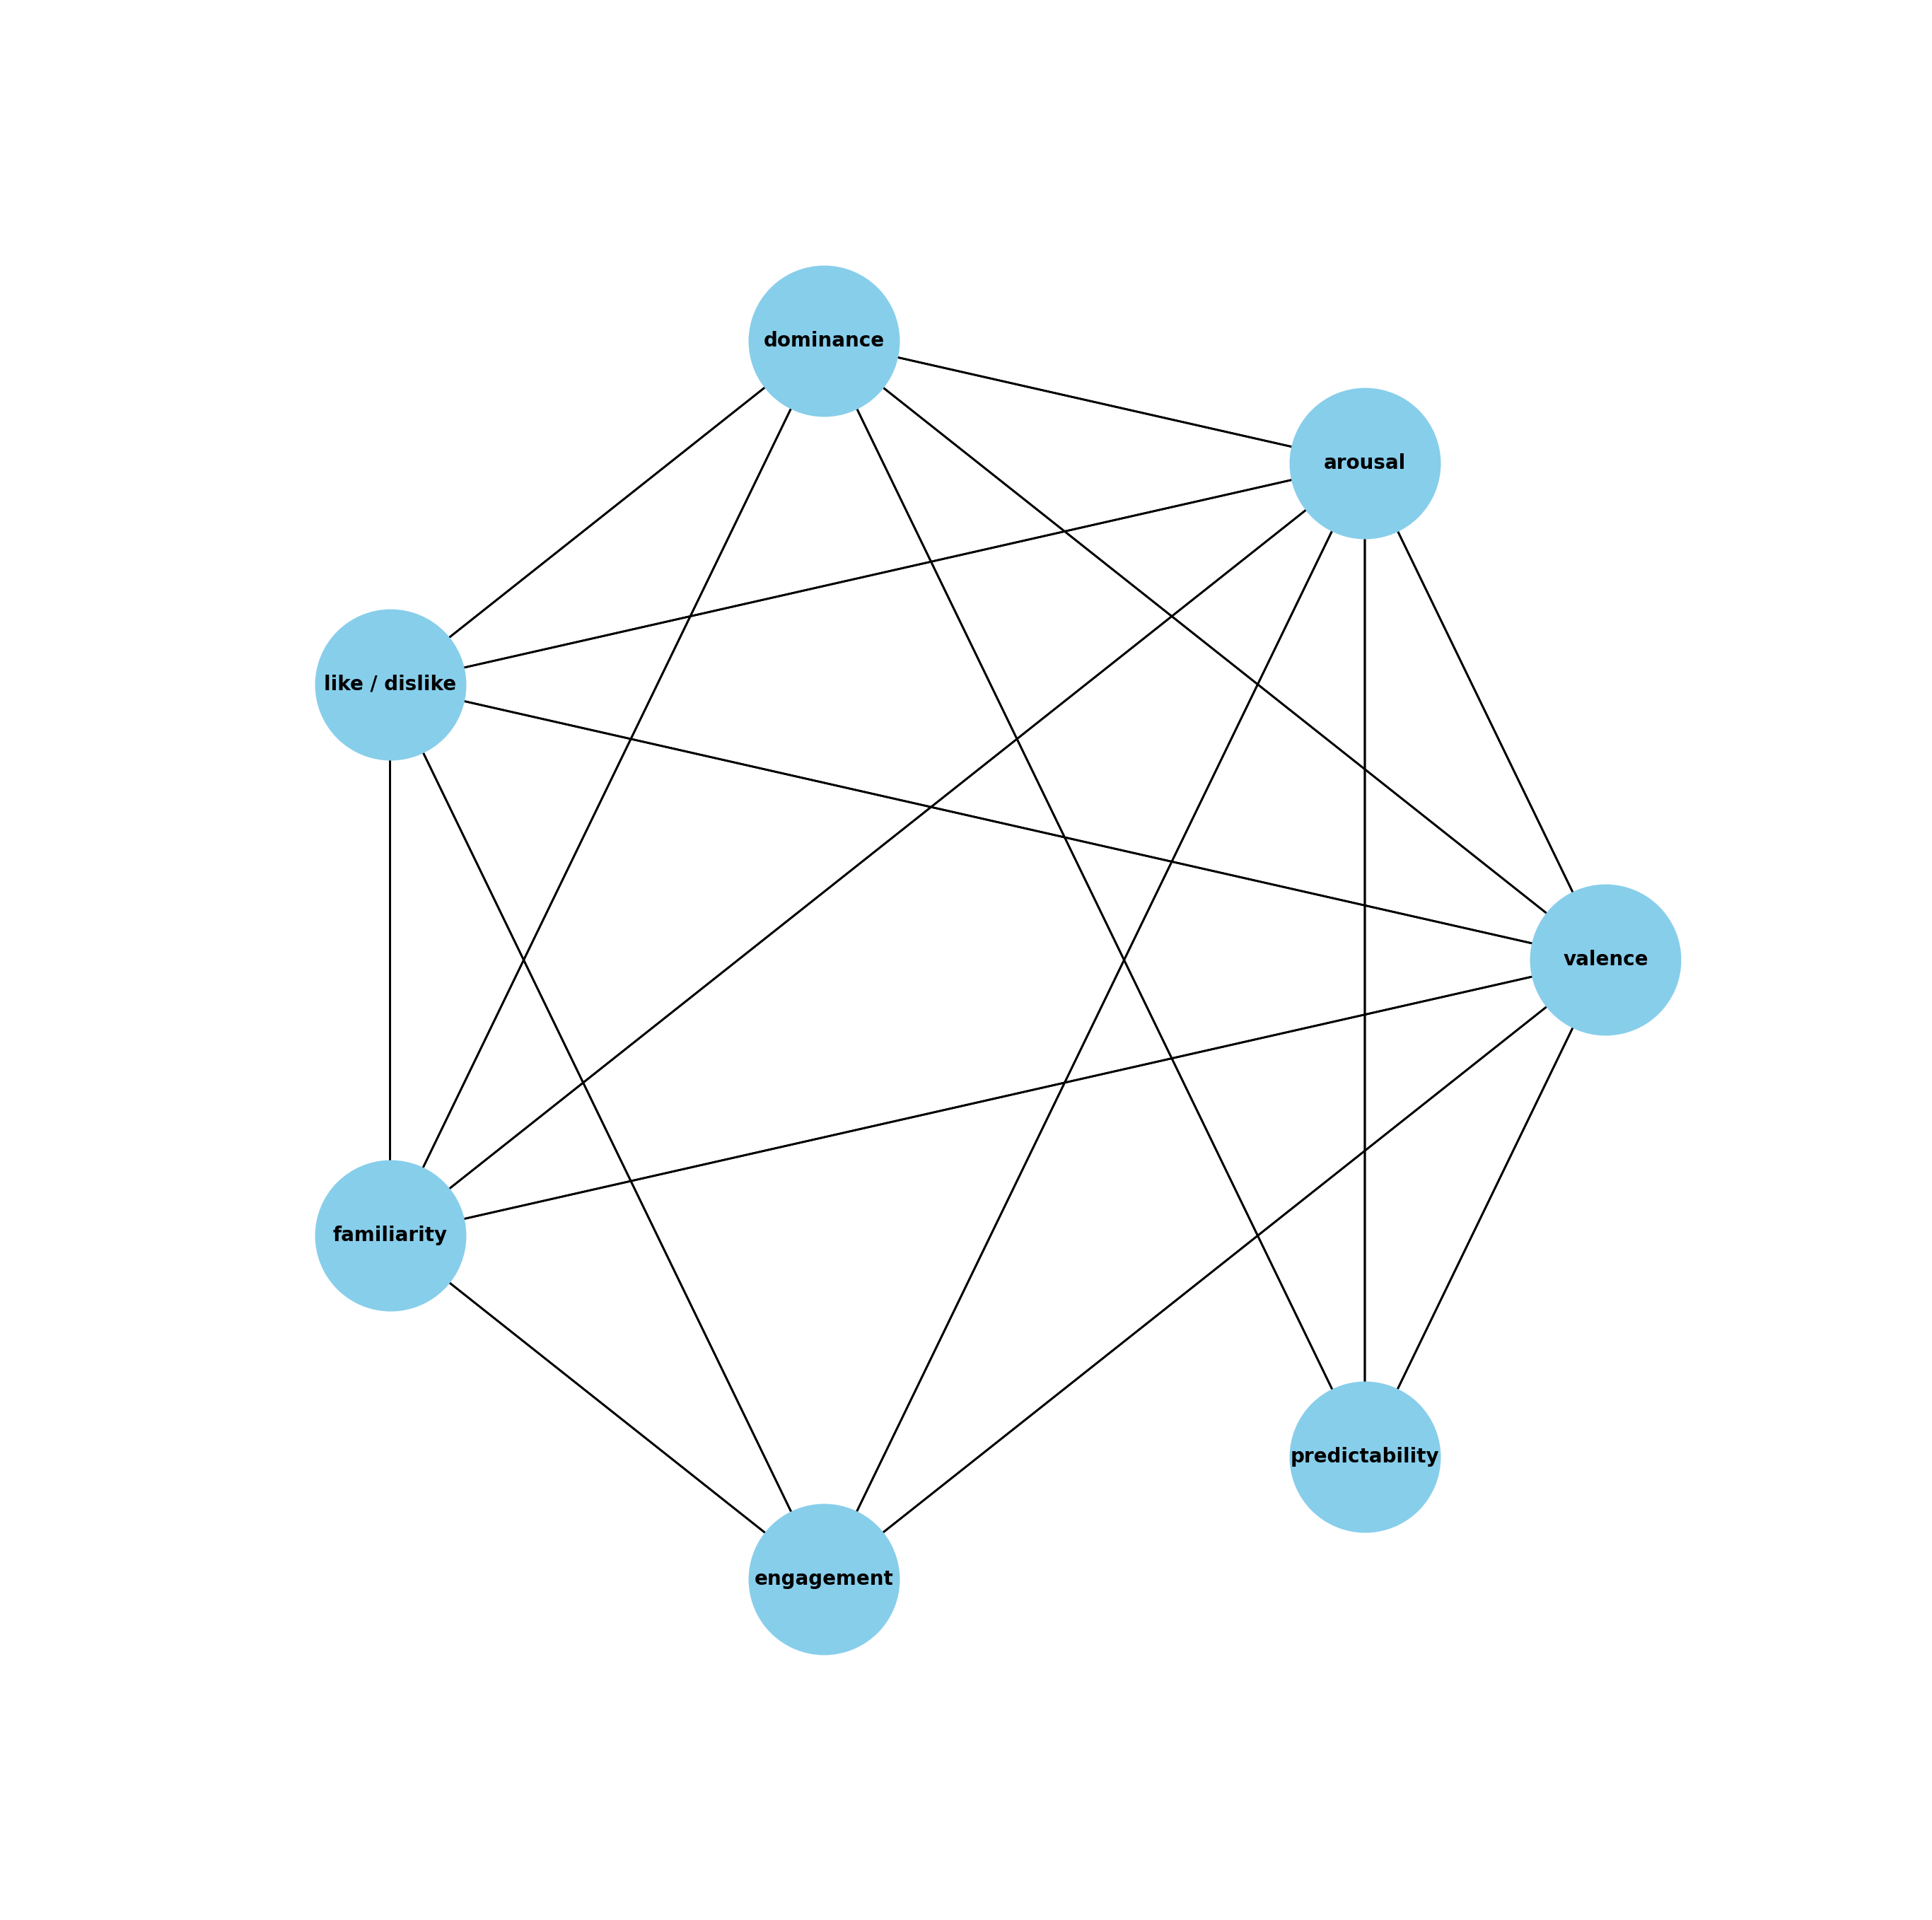

In [61]:
Gd = nx.DiGraph(adj_matrix_dim)

fig, ax = plt.subplots(figsize=(35, 35))

nx.draw_circular(Gd, 
        with_labels=True,
        node_size=13000,
        node_color="skyblue",
        linewidths=40,
        font_size=20,
        font_color="black",
        font_weight="bold",
        width=2)

plt.savefig('.\\Emmanuel\\figures\\NUEVOS. Conexiones entre dimensiones emocionales.png')

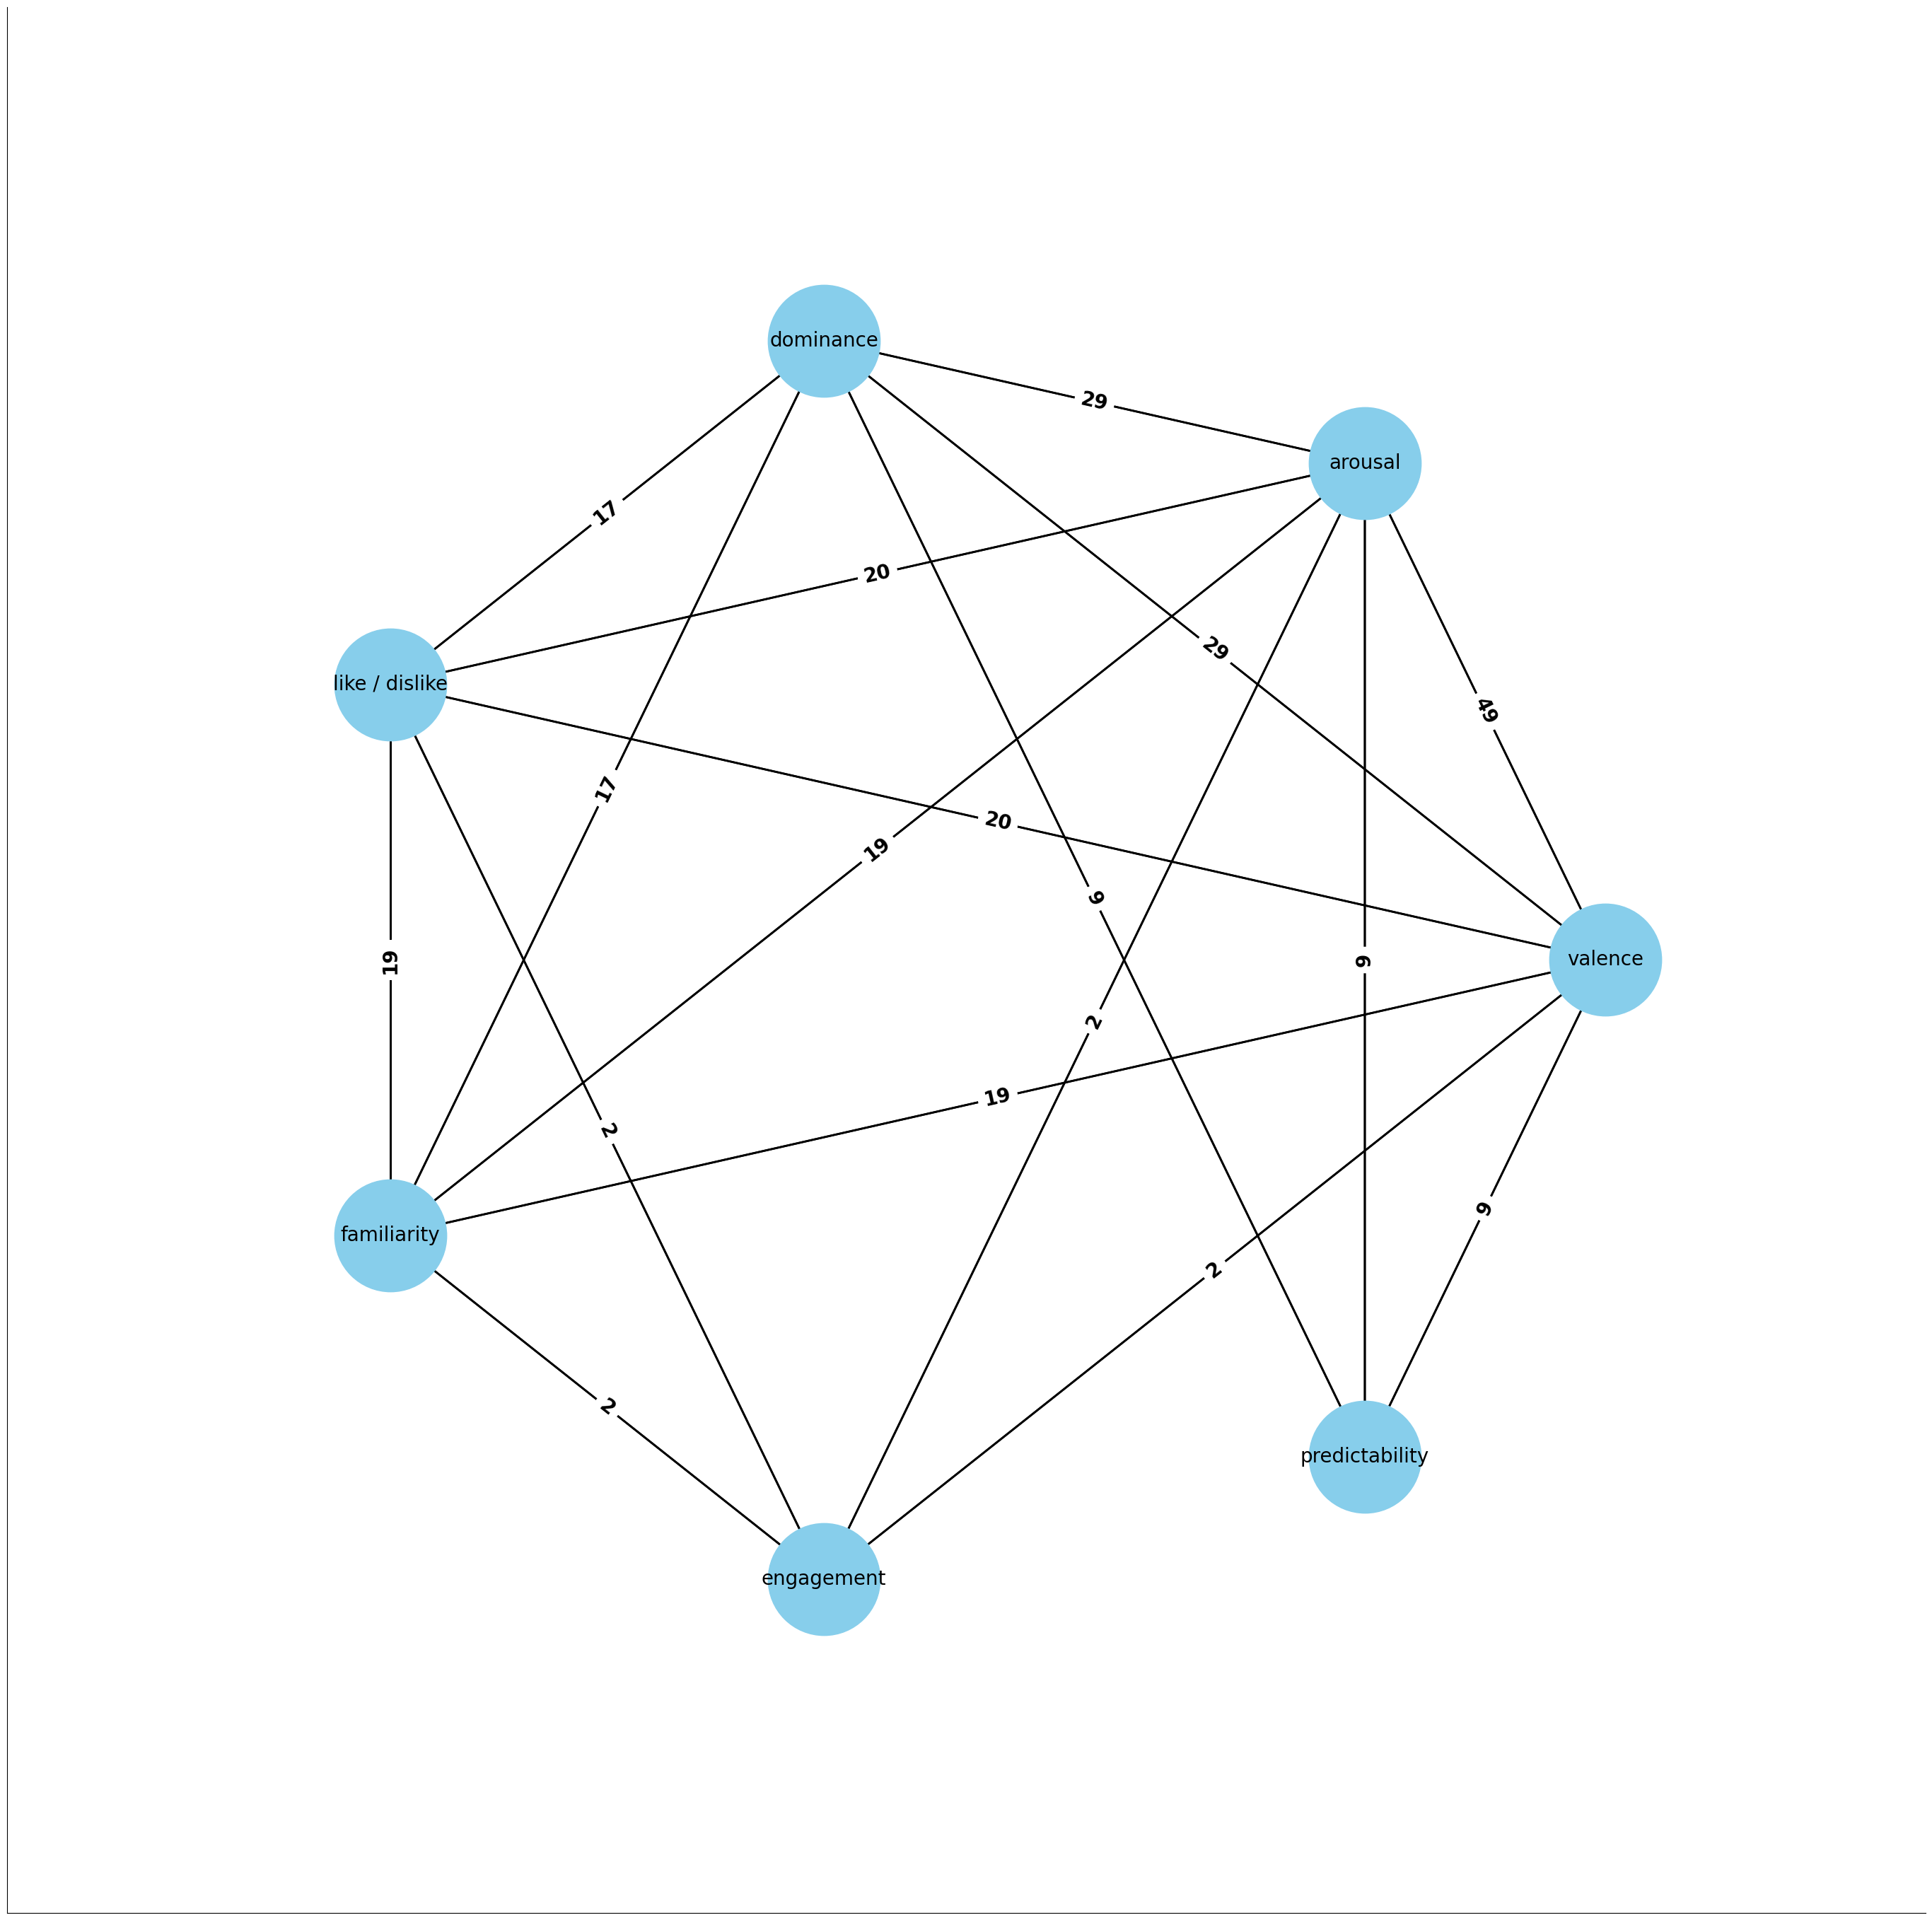

In [62]:
Gd.number_of_edges()

fig, ax = plt.subplots(figsize=(35, 35))

pos=nx.circular_layout(Gd)
weights=[wt for u, v, wt in Gd.edges(data="weight")]

nx.draw_networkx(Gd,pos,
        width=2,
        arrows=False,
        node_size=13000,
        node_color="skyblue",
        font_size=20)

labels=nx.get_edge_attributes(Gd, "weight") # entiendo que esto te permite poner la cantidad de frecuencia de cada relación con una etiqueta

nx.draw_networkx_edge_labels(Gd,pos,
        edge_labels=labels,
        font_size=20,
        font_color="black",
        font_weight="bold")

plt.savefig('.\\Emmanuel\\figures\\NUEVOS. Conexiones entre dimensiones emocionales - Numero de relaciones.png')

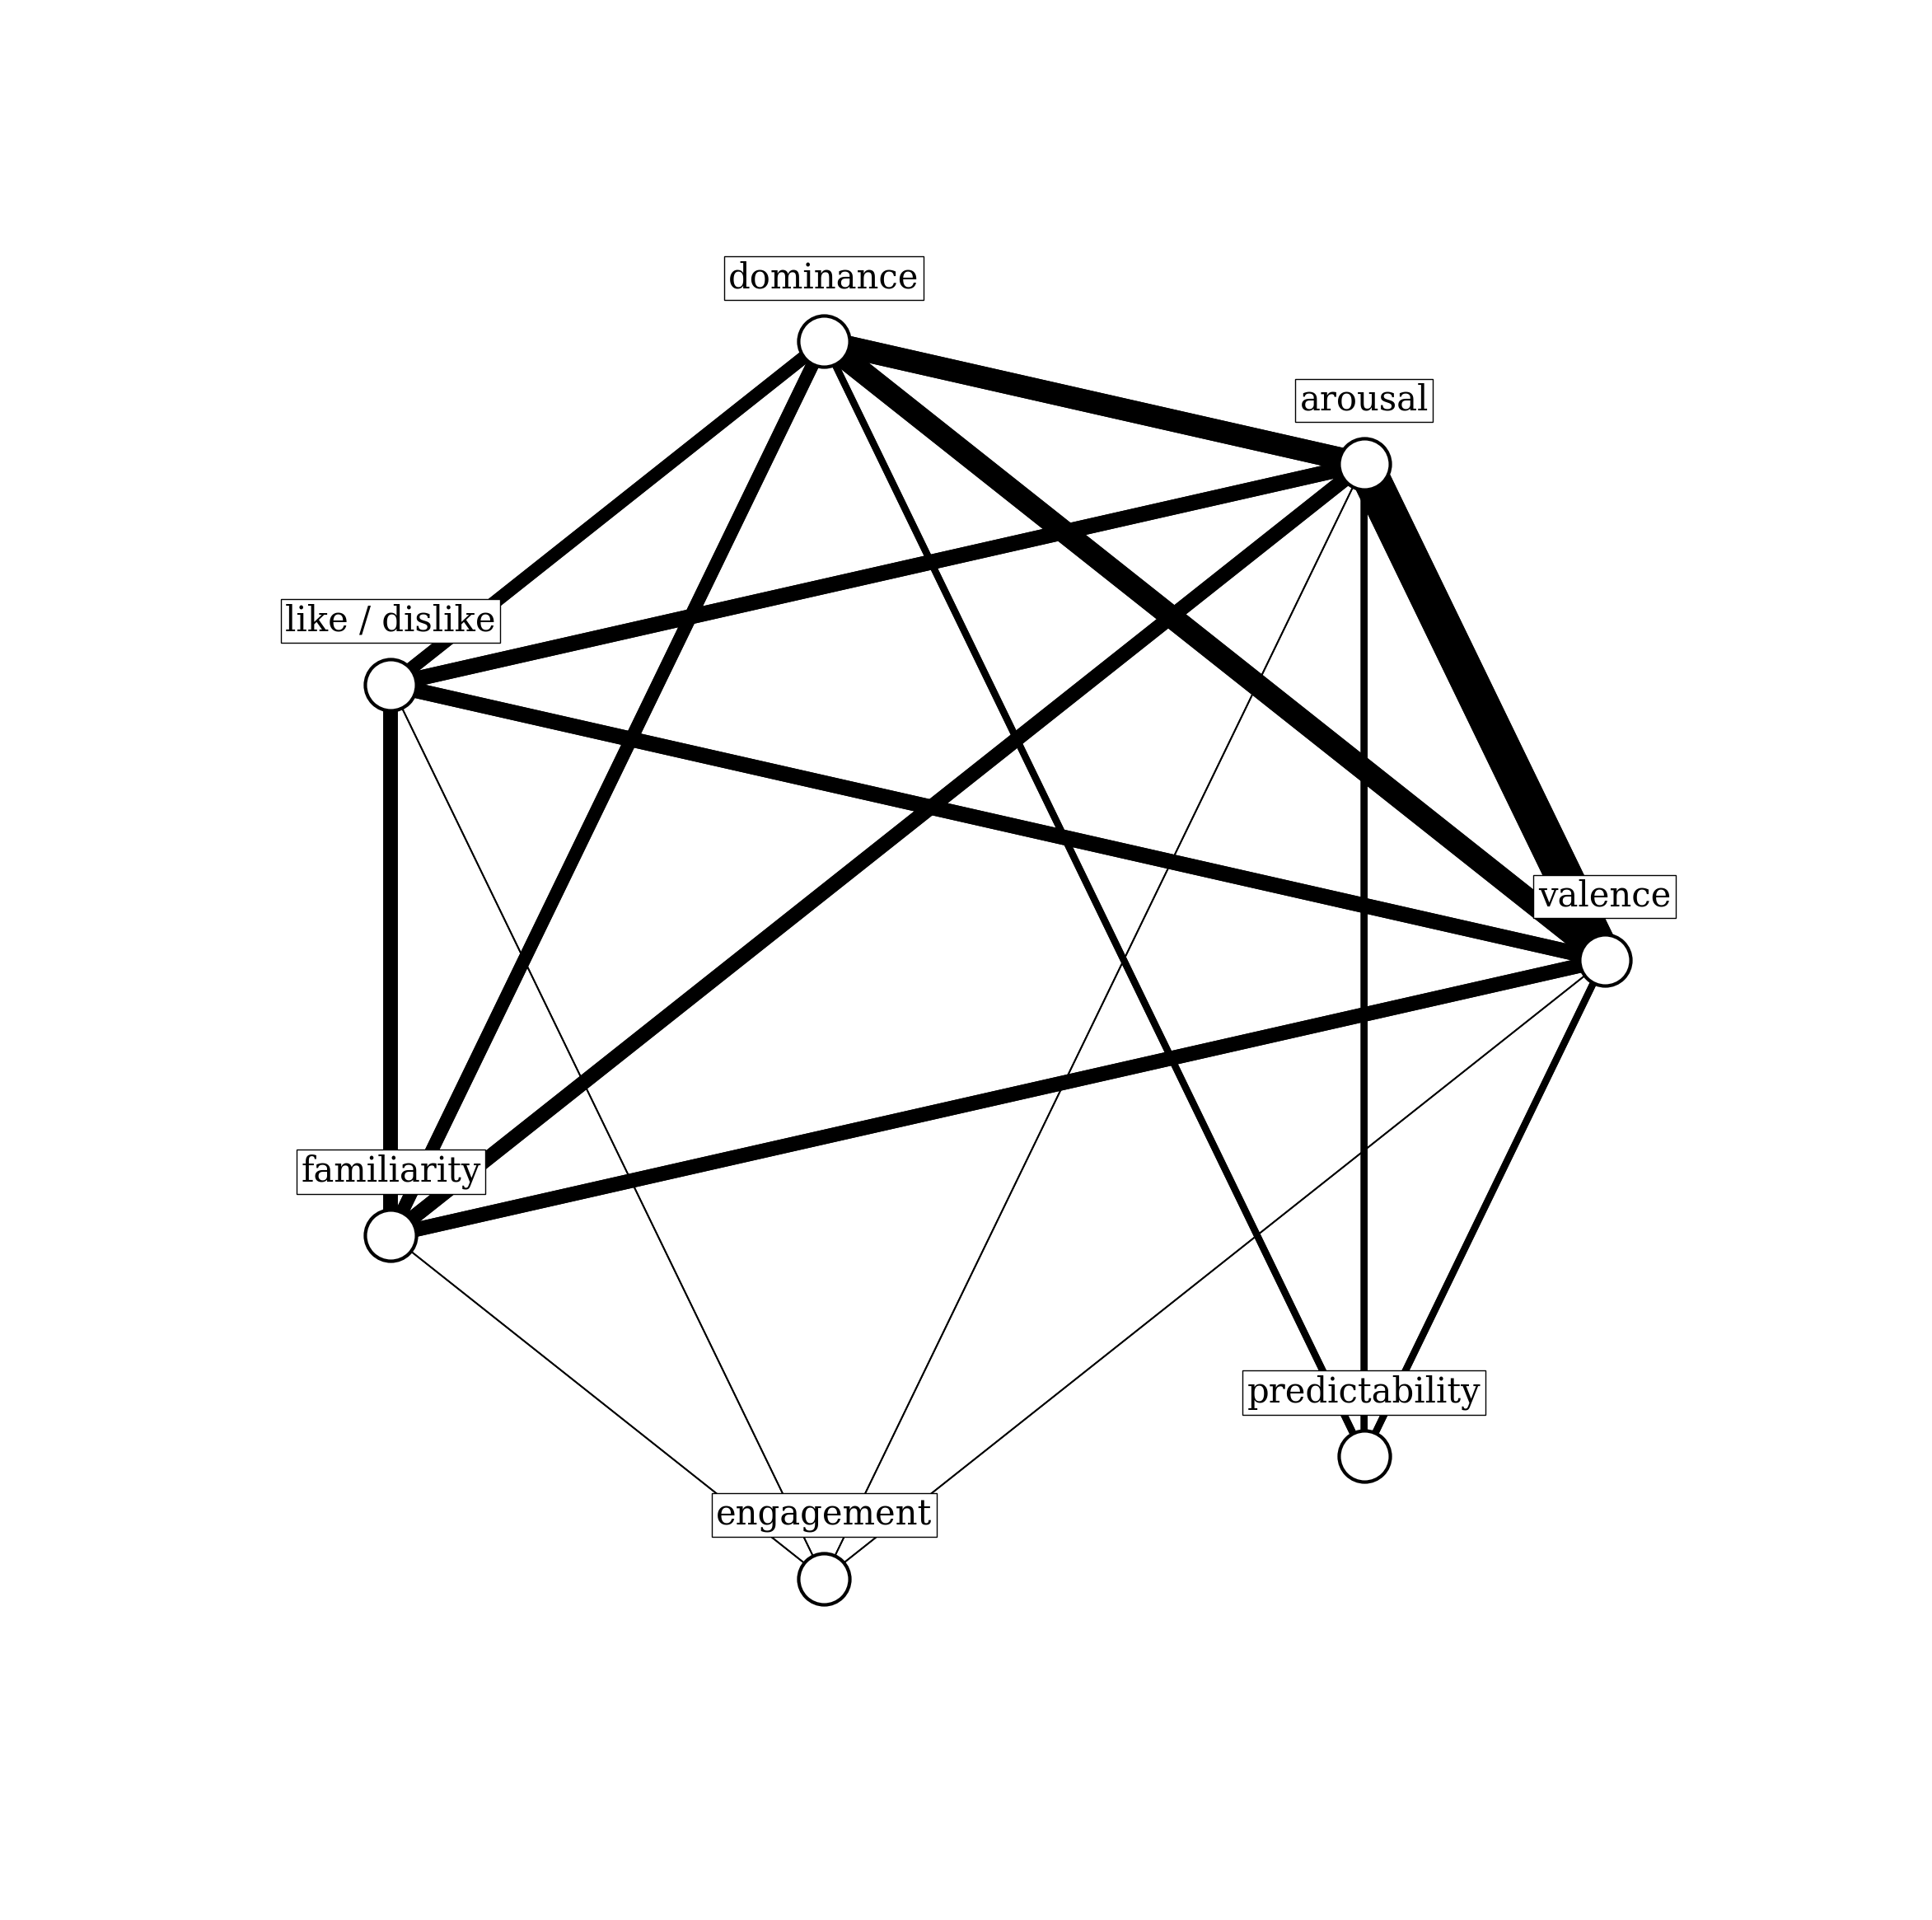

In [63]:

weights = nx.get_edge_attributes(Gd,'weight').values()

fig, ax = plt.subplots(figsize=(30, 30))

pos = nx.circular_layout(Gd)

"""nx.draw(Gd, pos, 
        edge_color=weights, 
        node_color='skyblue',
        width=[i*1.5 for i in weights],
        with_labels=True,
        node_size=13000,
        alpha=1,
        font_size=20,
        font_weight="bold",
        arrows=False,
        edge_cmap=plt.colormaps['cividis'])"""



nx.draw(Gd, pos, 
        edgecolors="black", 
        node_color='white',
        width=[i/1.5 for i in weights],
        node_size=2000,
        linewidths=3,
        alpha=1,
        font_size=25,
        font_weight="bold",
        arrows=False,
        edge_cmap=plt.colormaps['copper'])

boxes = dict(facecolor='white', alpha=1)

pos_nodes = nudge(pos, 0, 0.1)    
nx.draw_networkx_labels(Gd, pos=pos_nodes, labels=None, font_size=30, font_color='k',
                        font_family='serif', font_weight='normal', alpha=None, bbox=boxes, horizontalalignment='center', 
                        verticalalignment='center', ax=None, clip_on=True)


plt.savefig('.\\Emmanuel\\figures\\NUEVOS. Conexiones entre dimensiones emocionales - Colores y grosor segun numero de relaciones.png')

In [64]:
relaciones(weights)

Interacciones con 2 conexiones se observaron 4.0 veces.
Interacciones con 9 conexiones se observaron 3.0 veces.
Interacciones con 19 conexiones se observaron 3.0 veces.
Interacciones con 17 conexiones se observaron 2.0 veces.
Interacciones con 20 conexiones se observaron 2.0 veces.
Interacciones con 29 conexiones se observaron 2.0 veces.
Interacciones con 49 conexiones se observaron 1.0 veces.


In [65]:
df_self_report

paper_id  model_id                                       apa_citation  \
0           1         1  Zangróniz, R., Martínez-Rodrigo, A., Pastor, J...   
1           2         2  Liu, M., Fan, D., Zhang, X., & Gong, X. (2017)...   
2           3         3  Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...   
3           3         4  Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...   
4           4         5  Ali, M., Machot, F. A., Mosa, A. H., Jdeed, M....   
..        ...       ...                                                ...   
494        98       495  Subramanian, R., Wache, J., Abadi, M. K., Vier...   
495        98       496  Subramanian, R., Wache, J., Abadi, M. K., Vier...   
496        98       497  Subramanian, R., Wache, J., Abadi, M. K., Vier...   
497        99       498  Yun, H., Fortenbacher, A., Helbig, R., & Pinkw...   
498        99       499  Yun, H., Fortenbacher, A., Helbig, R., & Pinkw...   

                   use_questionnaite affective_questionaire_SAM  \
0    Relies on other's questionnaire                          x   
1                                 No                          -   
2                                Yes                          x   
3                                Yes                          x   
4                                Yes                          x   
..                               ...                        ...   
494                              Yes                          -   
495                              Yes                          -   
496                              Yes                          -   
497                              Yes                          x   
498                              Yes                          x   

    affective_questionaire_PSS affective_questionaire_PANAS  \
0                            -                            -   
1                            -                            -   
2                            -                            -   
3                            -                            -   
4                            -                            -   
..                         ...                          ...   
494                          -                            -   
495                          -                            -   
496                          -                            -   
497                          -                            -   
498                          -                            -   

    affective_questionaire_DES affective_questionaire_affective_grid  \
0                            -                                     -   
1                            -                                     -   
2                            -                                     -   
3                            -                                     -   
4                            -                                     -   
..                         ...                                   ...   
494                          -                                     -   
495                          -                                     -   
496                          -                                     -   
497                          -                                     -   
498                          -                                     -   

    is_dimensional  ... Surprise Happiness Pleasant Anxiety Neutral Funny  \
0                -  ...        -         -        -       -       -     -   
1                -  ...        -         -        -       -       -     -   
2                x  ...        -         -        -       -       -     -   
3                x  ...        -         -        -       -       -     -   
4                x  ...        x         -        -       x       x     -   
..             ...  ...      ...       ...      ...     ...     ...   ...   
494              x  ...        -         -        -       -       -     -   
495              x  ...  

In [66]:
df_self_report['use_questionnaite'] = df_self_report['use_questionnaite'].str.replace('x',"Yes")
df_self_report['use_questionnaite'] = df_self_report['use_questionnaite'].str.replace('-',"No")
df_self_report['use_questionnaite'] = df_self_report['use_questionnaite'].str.replace("Relies on  other's questionnaire","Relies on other's questionnaire")
df_self_report['use_questionnaite'] = df_self_report['use_questionnaite'].str.replace("Relies on other´s questionaire","Relies on other's questionnaire")

In [67]:
df_self_report.iloc[:,0:9]
used_questionnaries = df_self_report.groupby(['paper_id', "use_questionnaite"]).nth(0)
used_questionnaries.reset_index(inplace= True)
used_questionnaries["use_questionnaite"].value_counts()

No                                 48
Yes                                48
Relies on other's questionnaire     6
No                                  1
Name: use_questionnaite, dtype: int64

In [68]:
used_questionnaries["use_questionnaite"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

No                                 46.6%
Yes                                46.6%
Relies on other's questionnaire     5.8%
No                                  1.0%
Name: use_questionnaite, dtype: object

In [69]:
questionnaries = df_self_report.groupby(['paper_id', 'affective_questionaire_SAM','affective_questionaire_PSS', 
                                         "affective_questionaire_PANAS", "affective_questionaire_DES", "affective_questionaire_affective_grid"]).nth(0)
questionnaries.reset_index(inplace= True)
questionnaries = multi_reversing(questionnaries, 'paper_id', questionnaries[['affective_questionaire_SAM','affective_questionaire_PSS', "affective_questionaire_PANAS", "affective_questionaire_DES", "affective_questionaire_affective_grid"]])
questionnaries['variable'].value_counts()

affective_questionaire_SAM               37
affective_questionaire_PANAS             12
affective_questionaire_affective_grid     2
affective_questionaire_PSS                1
affective_questionaire_DES                1
Name: variable, dtype: int64

In [70]:
questionnaries['variable'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

affective_questionaire_SAM               69.8%
affective_questionaire_PANAS             22.6%
affective_questionaire_affective_grid     3.8%
affective_questionaire_PSS                1.9%
affective_questionaire_DES                1.9%
Name: variable, dtype: object

### ¿Cual es la frecuencia del uso de modelos algoritmicos de regresion y clasificacion?
3. Gráficos frencuencia de los modelos algoritimicos, según modelos de regresión y clasificación

- Interpretaciones: Los algoritmos clasificadores son por mucho los mas usados, ademas de ser los que mas variedad representan. Que implica esto? Es lo mismo aplicar algoritmos clasificadores o regresores?
- Nota: ordenar los valores de los gráficos y unirlos en uno, buscar graficar los mas usados (primeros 5 o 10) 

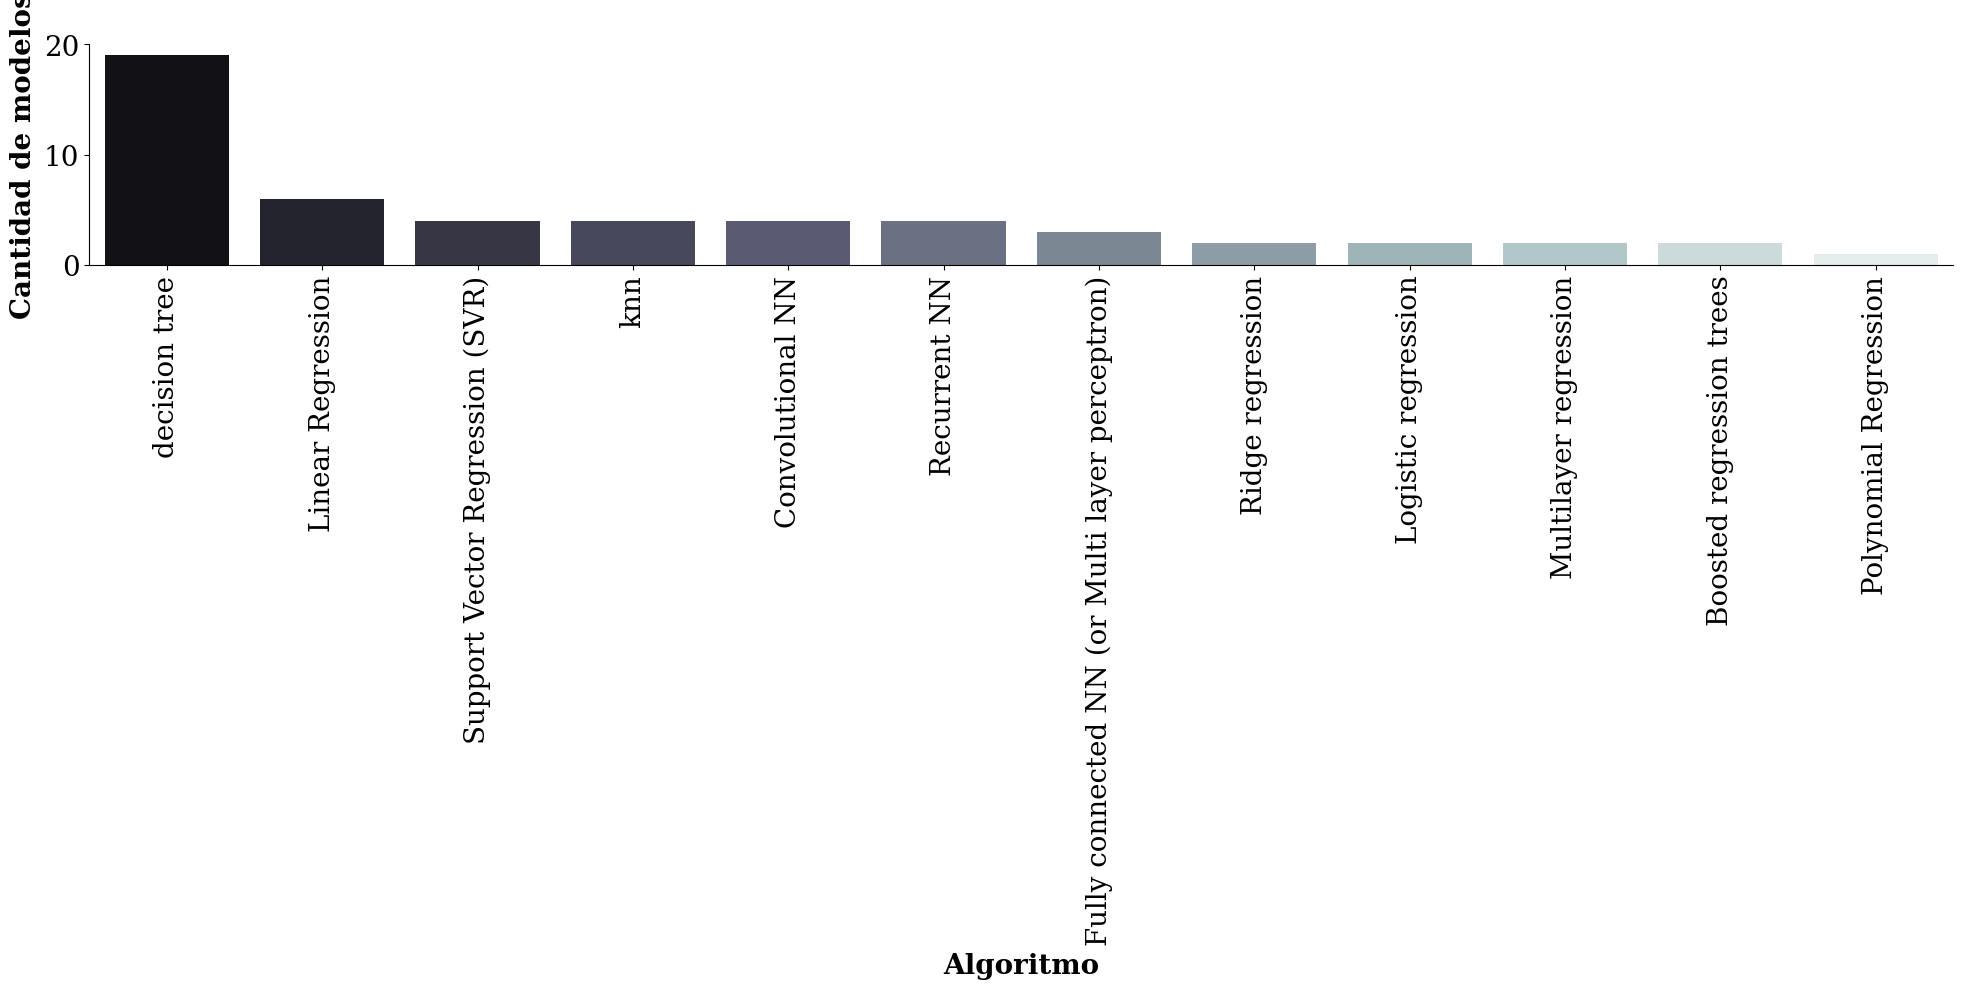

In [71]:
df_statistical_learning_models = df_statistical_learning_models.fillna('-')

#para regressor
df_algoritmos_regre = multi_reversing(df_statistical_learning_models, 'model_id', df_statistical_learning_models.iloc[:,43:57])
df_algoritmos_regre['variable'] = df_algoritmos_regre['variable'].str.replace('regre_','')

titulos = [' ', 'Algoritmo', 'Cantidad de modelos']
bar_plot('variable',df_algoritmos_regre,titulos)

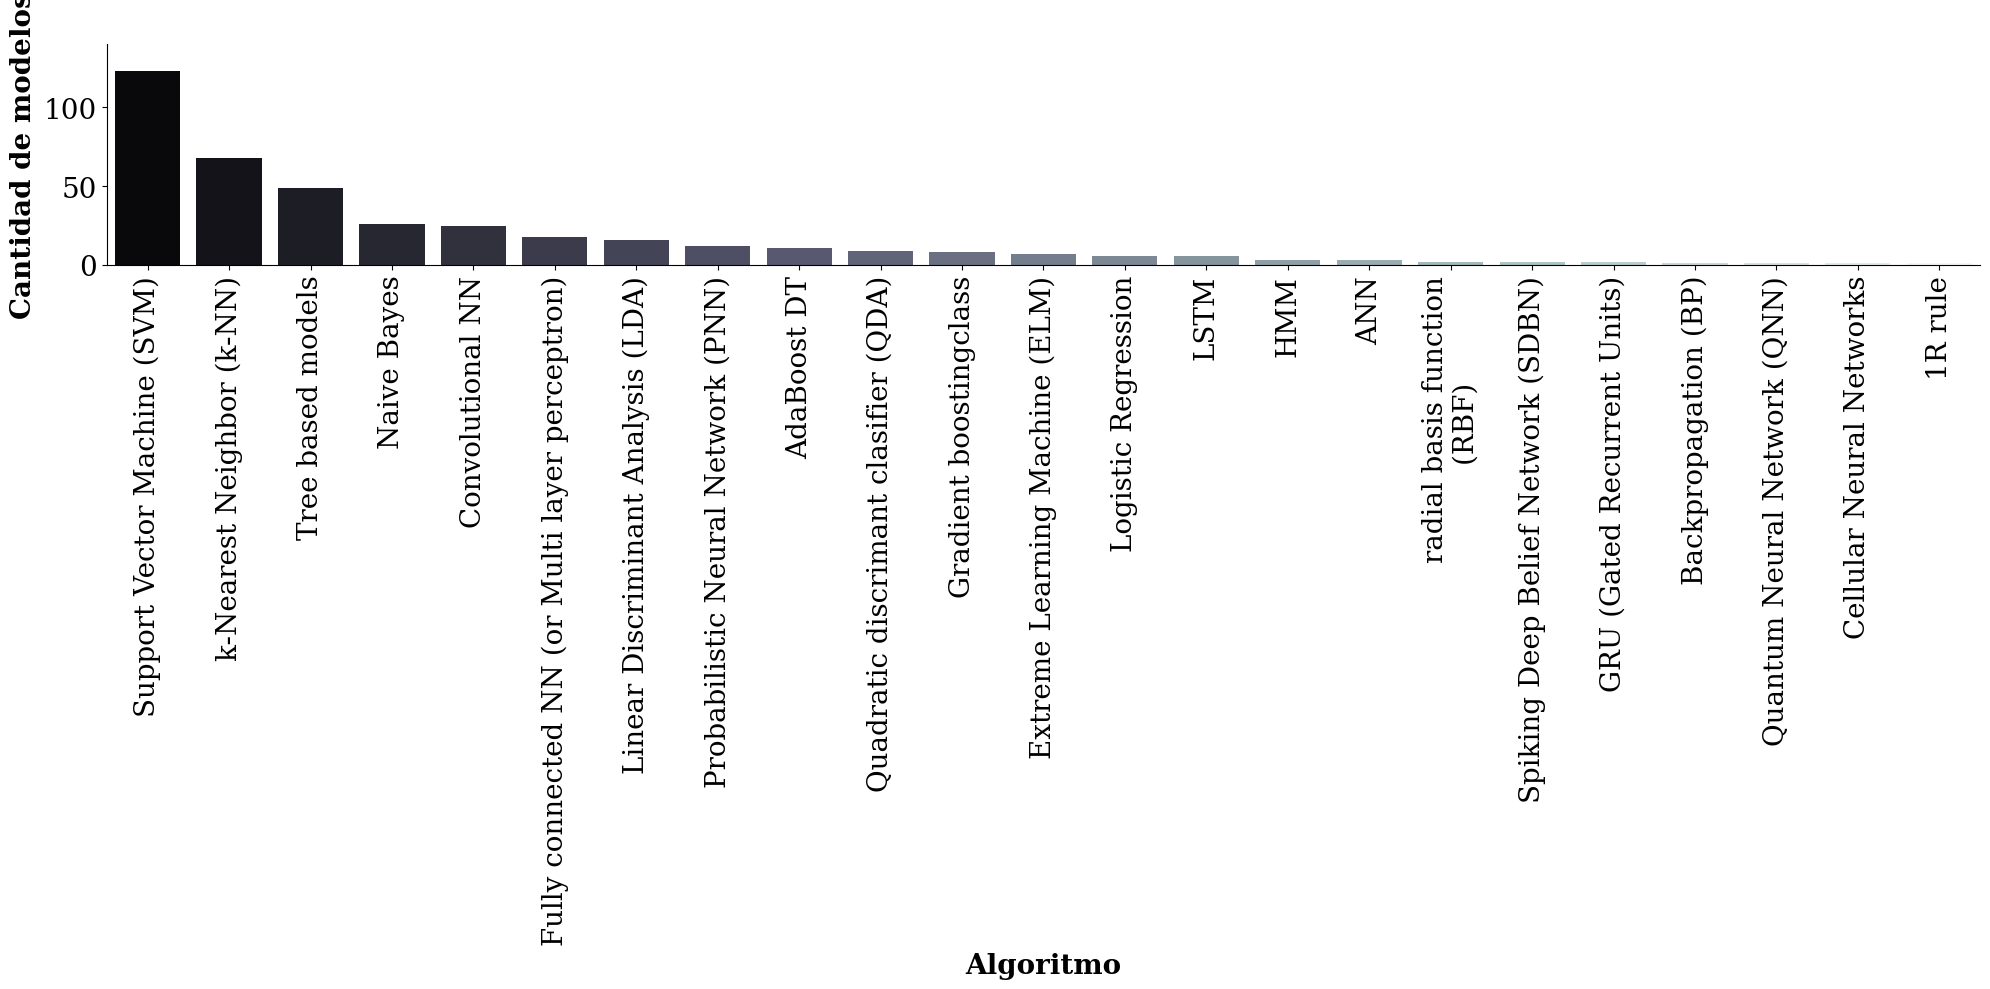

In [72]:
#para classifier

df_algoritmos_class = multi_reversing(df_statistical_learning_models, 'model_id', df_statistical_learning_models.iloc[:,8:40])
df_algoritmos_class['variable'] = df_algoritmos_class['variable'].str.replace('class_','')

#Lista de algoritmos unicos de clasificacion
algoritmos_de_clasificacion = df_algoritmos_class["variable"].unique()
#print(algoritmos_de_clasificacion)

titulos = [' ', 'Algoritmo', 'Cantidad de modelos']
bar_plot('variable',df_algoritmos_class,titulos)

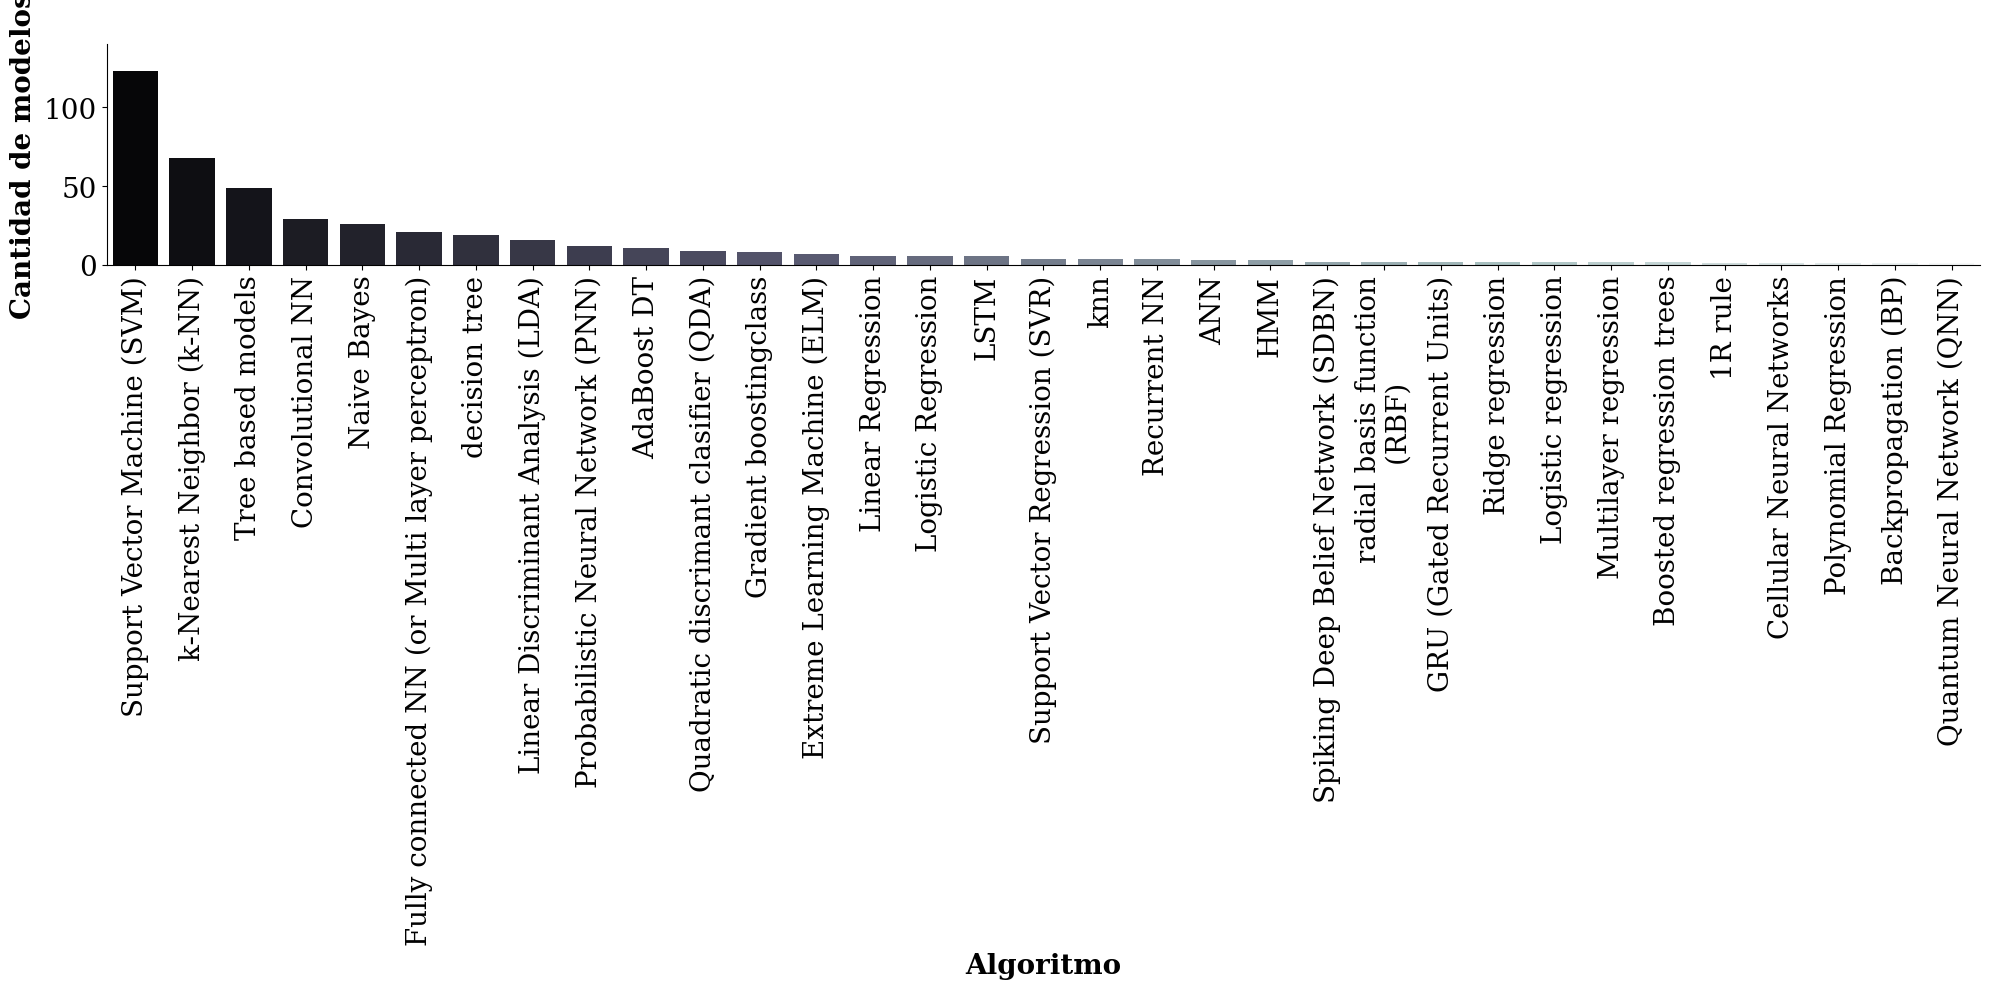

In [73]:
df_all_models = df_statistical_learning_models.iloc[:,1:57]
df_all_models.drop(df_all_models.columns[[1,2,3,4,5,6,39,40,41]], axis=1, inplace=True)

df_all_models = multi_reversing(df_all_models, 'model_id', df_all_models.iloc[:,1:])
df_all_models['variable'] = df_all_models['variable'].str.replace('class_','')
df_all_models['variable'] = df_all_models['variable'].str.replace('regre_','')

titulos = [' ', 'Algoritmo', 'Cantidad de modelos']
bar_plot('variable',df_all_models,titulos)

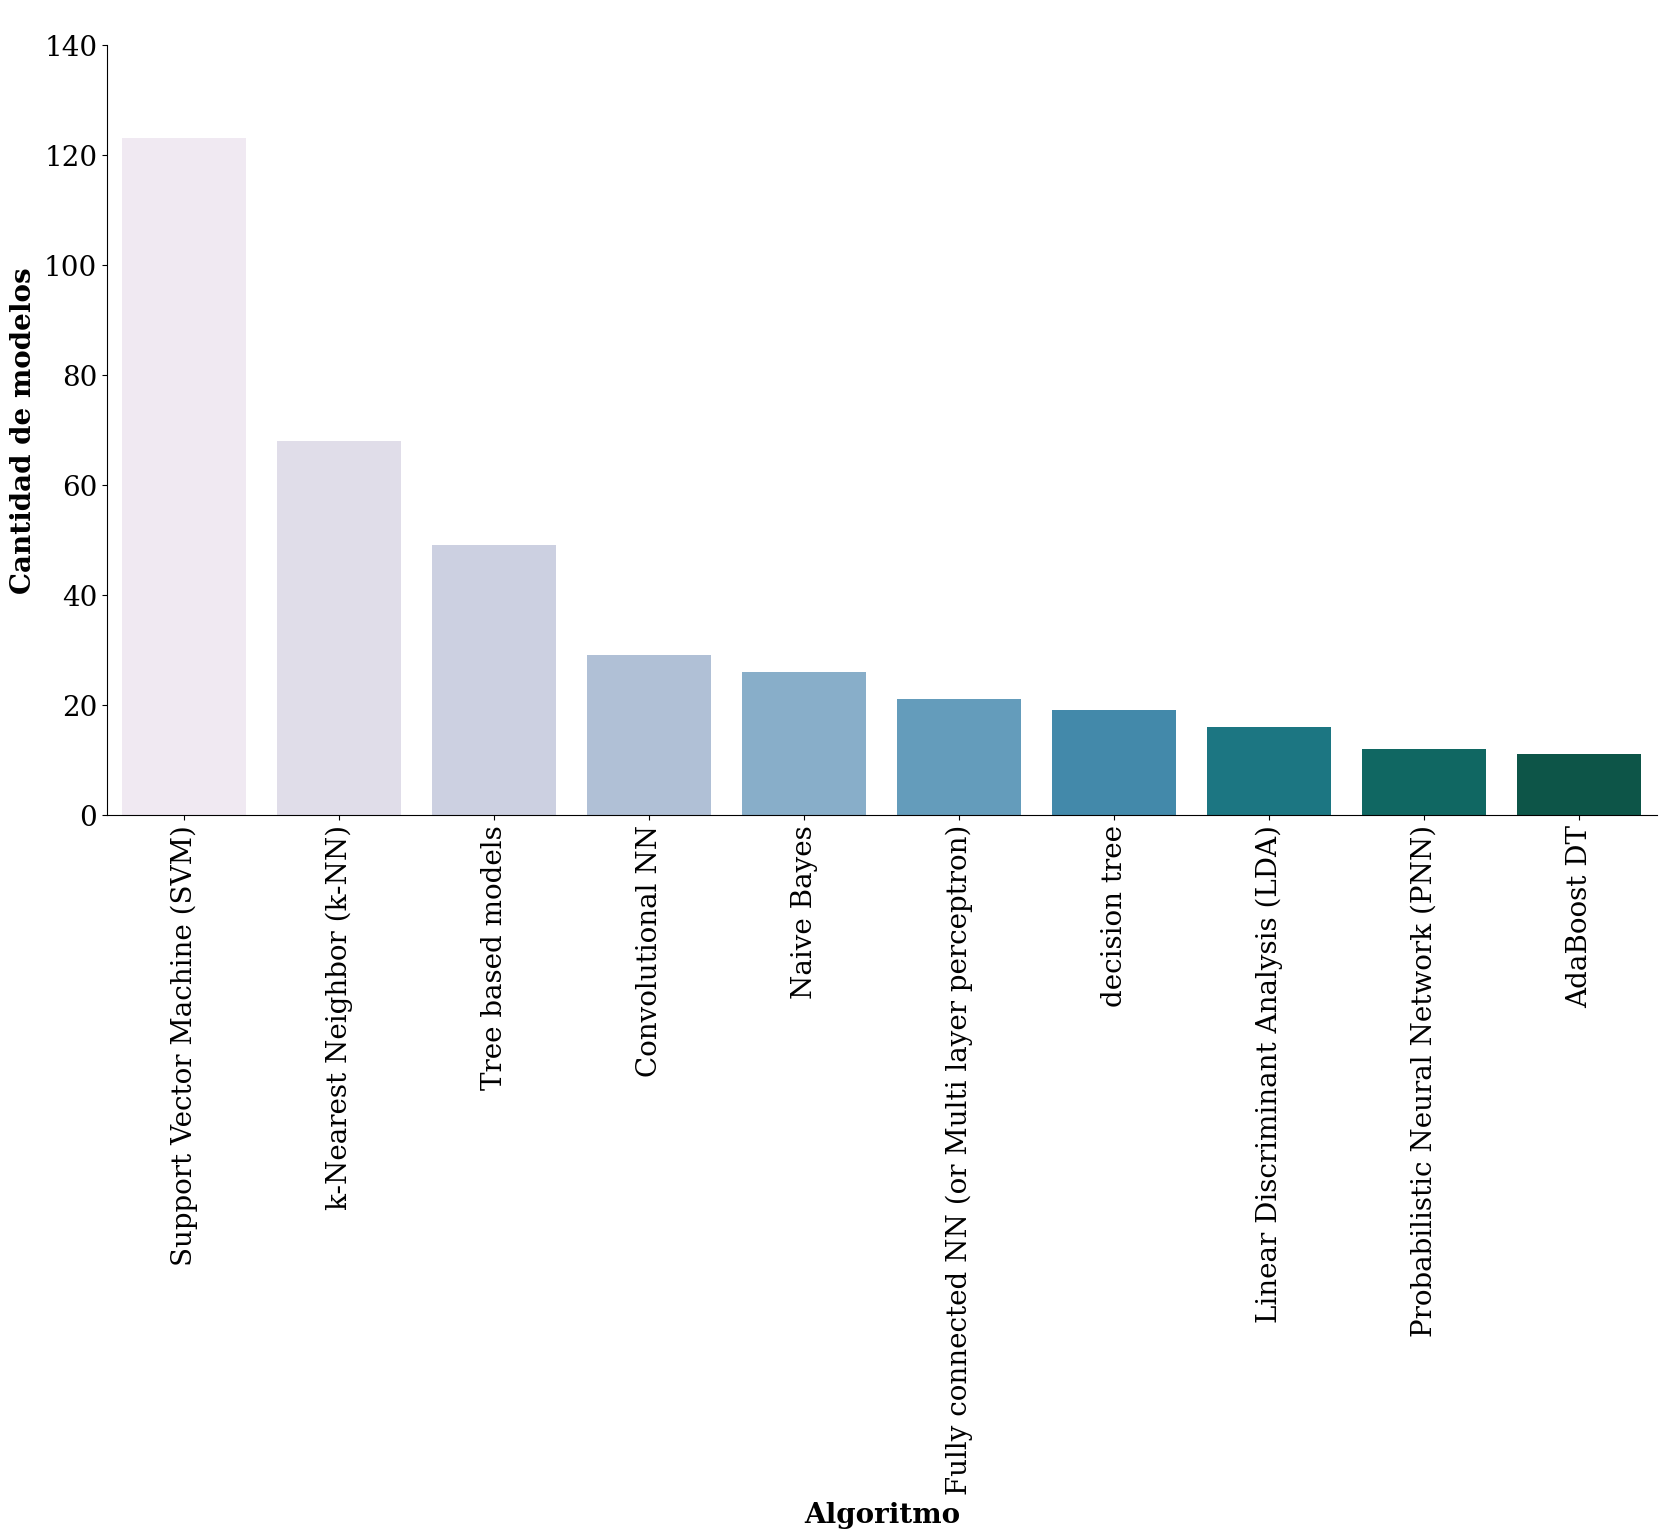

In [74]:
vc = df_all_models['variable'].value_counts()
vc = vc.iloc[:10]
df_dv = vc.to_frame()
df_dv = df_dv.reset_index()
df_dv.rename(columns = {'index':'algoritmo', 'variable':'cantidad'}, inplace = True)

titulos = [' ', 'Algoritmo', 'Cantidad de modelos']
g = sns.barplot(data=df_dv, x='algoritmo', y='cantidad', palette="PuBuGn")
g.set(title = titulos[0], xlabel = titulos[1], ylabel = titulos[2])
plt.xticks(rotation=90)
plt.savefig('.\\Emmanuel\\figures\\NUEVOS. Los 10 algoritmos mas usados.png')

In [75]:
"""df_class_or_regre['variable'] = df_class_or_regre['variable'].str.replace('is_','')
df_class_or_regre["variable"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'"""

'df_class_or_regre[\'variable\'] = df_class_or_regre[\'variable\'].str.replace(\'is_\',\'\')\ndf_class_or_regre["variable"].value_counts(normalize=True).mul(100).round(1).astype(str) + \'%\''

In [76]:
"""#pie plot
quantity = df_class_or_regre['variable'].value_counts()
df_class_or_regre_quantity = pd.DataFrame(quantity)

names = 'Classifier', 'Regressor'
plt.pie(df_class_or_regre_quantity['variable'], labels = names, labeldistance = 1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.savefig('.\\Emmanuel\\figures\\NUEVOS. Proporcion uso de modelos de regresion y clasificacion.png')"""

"#pie plot\nquantity = df_class_or_regre['variable'].value_counts()\ndf_class_or_regre_quantity = pd.DataFrame(quantity)\n\nnames = 'Classifier', 'Regressor'\nplt.pie(df_class_or_regre_quantity['variable'], labels = names, labeldistance = 1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })\nplt.savefig('.\\Emmanuel\\figures\\NUEVOS. Proporcion uso de modelos de regresion y clasificacion.png')"

### ¿Cual es la evolucion temporal (2010-2020) del uso de las bases de datos privadas y publicas?
5. Gráfico de barra por año (2010-2020) según tipos de base de datos (privada, pública)

In [77]:
df_data_type = df_data_type.fillna('-')
df_data_type = df_data_type.groupby(['paper_id', 'db_access']).nth(0)
df_data_type.reset_index(inplace=True)

In [78]:
df_data_type

paper_id   db_access  model_id  \
0          1  restricted         1   
1          2  restricted         2   
2          3        open         3   
3          4        open         5   
4          5  restricted        10   
..       ...         ...       ...   
95        95        open       481   
96        96  restricted       491   
97        97        open       492   
98        98        open       494   
99        99  restricted       498   

                                         apa_citation  year public_database  \
0   Zangróniz, R., Martínez-Rodrigo, A., Pastor, J...  2017               -   
1   Liu, M., Fan, D., Zhang, X., & Gong, X. (2017)...  2016               -   
2   Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...  2018               -   
3   Ali, M., Machot, F. A., Mosa, A. H., Jdeed, M....  2018               -   
4   Wei, J., Chen, T., Liu, G., & Yang, J. (2016)....  2016               -   
..                                                ...   ...             ...   
95  Yang, H. C., & Lee, C. C. (2019, September). A...  2020               -   
96  Kołodziej, M., Tarnowski, P., Majkowski, A., &...  2020               -   
97  Ganapathy, N., & Swaminathan, R. (2019). Emoti...  2020               -   
98  Subramanian, R., Wache, J., Abadi, M. K., Vier...  2018               -   
99  Yun, H., Fortenbacher, A., Helbig, R., & Pinkw...  2019               -   

   use_multiple_db db_private db_public db_private_and_public  ...  \
0                -          x         -                     -  ...   
1                -          x         -                     -  ...   
2                -          -         -                     -  ...   
3                -          -         -                     -  ...   
4                -          x         -                     -  ...   
..             ...        ...       ...                   ...  ...   
95               -          -         -                     -  ...   
96               -          x         -                     -  ...   
97               -          -         -                     -  ...   
98               -          -         -                     -  ...   
99               -          x         -                     -  ...   

   Driving Workload Liris SenseEmotion PMEmo Hazumi1911 Bio Vid Emo DB  \
0                 -     -            -     -          -              -   
1                 -     -            -     -          -              -   
2                 -     -            -     -          -              -   
3                 -     -            -     -          -              -   
4                 -     -            -     -          -              -   
..              ...   ...          ...   ...        ...            ...   
95                -     -            -     -          -              -   
96                -     -            -     -          -              -   
97                -     -            -     -          -              -   
98                -     -            -     -          -              -   
99                -     -            -     -          -              -   

   DREAMER  \
0        -   
1        -   
2        -   
3        -   
4        -   
..     ...   
95       -   
96       -   
97       -   
98       -   
99       -   

   Non-EEG Biosignals Data Set for Assessment and Visualization of Neurological Status  \
0                                                   -                                    
1                                                   -                                    
2                                                   -                                    
3                                                   -                                    
4                                                   -                                    
..                                                ...                                    
95                                                  -                

In [79]:
df_data_type["db_access"] = df_data_type["db_access"].str.capitalize()
df_data_type = df_data_type.rename(columns={"db_access":"Access"})

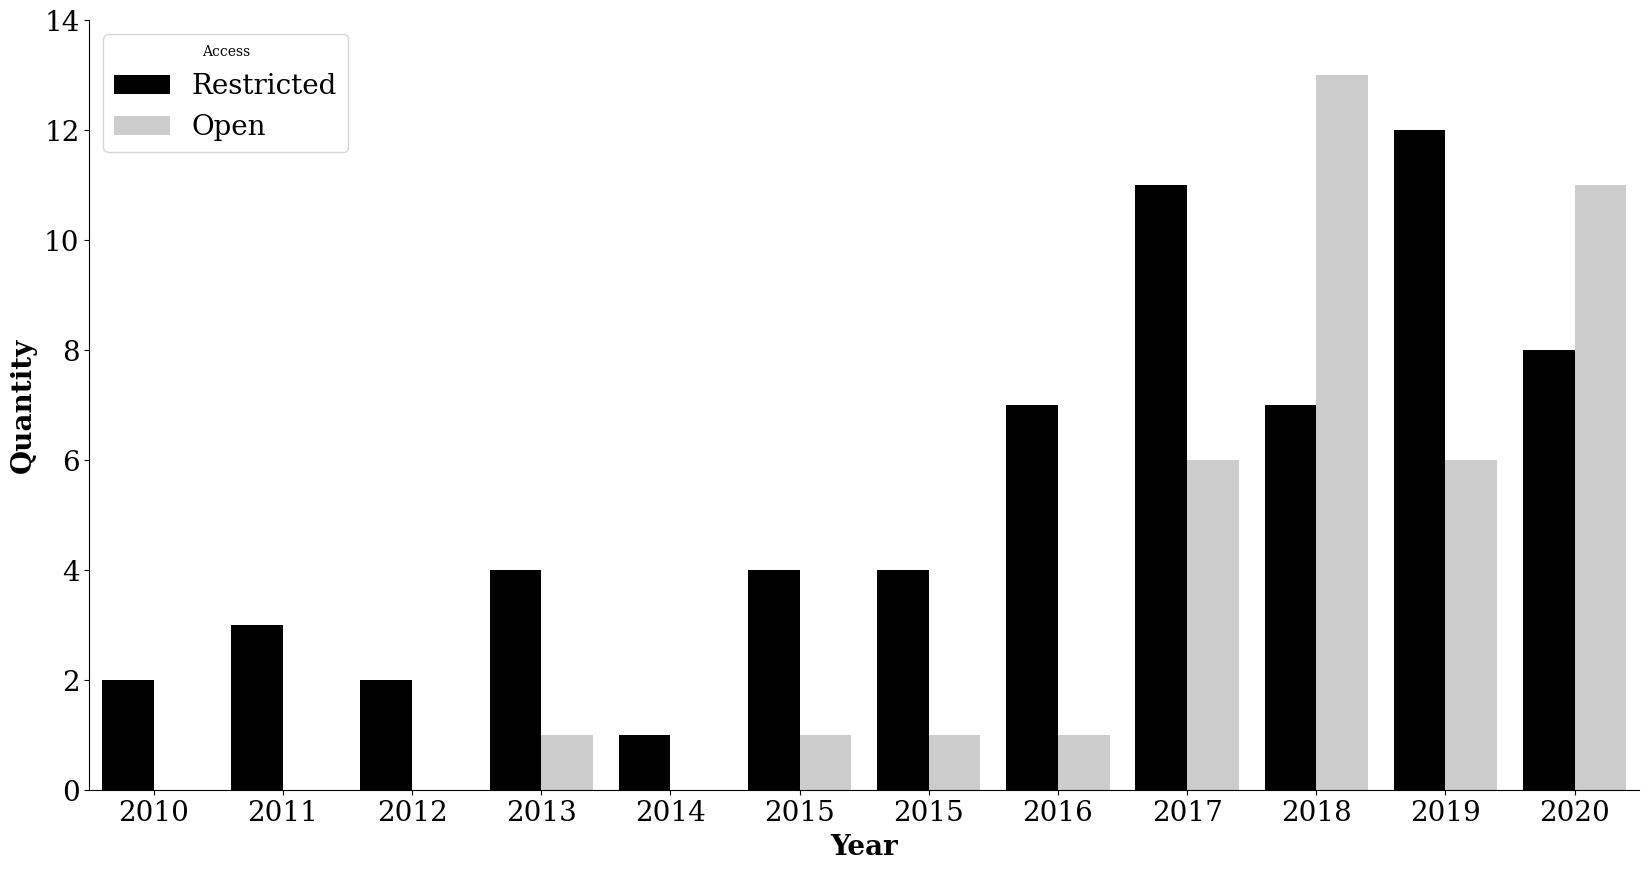

In [80]:
category_order = [2010, 2011, 2012, 2013, 2014, 2015, 2015, 2016, 2017, 2018, 2019, 2020]
g = sns.countplot(x='year', 
    data= df_data_type, 
    hue='Access', 
    order=category_order)
g.set(xlabel = 'Year', ylabel = 'Quantity')
plt.savefig('.\\Emmanuel\\figures\\NUEVOS. Frecuencia de uso de bases de datos públicas y privadas por año (2010 - 2020).png')

In [81]:
df_data_type["Access"].value_counts()

Restricted    61
Open          39
Name: Access, dtype: int64

In [82]:
df_data_type["Access"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Restricted    61.0%
Open          39.0%
Name: Access, dtype: object

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Quantity')]

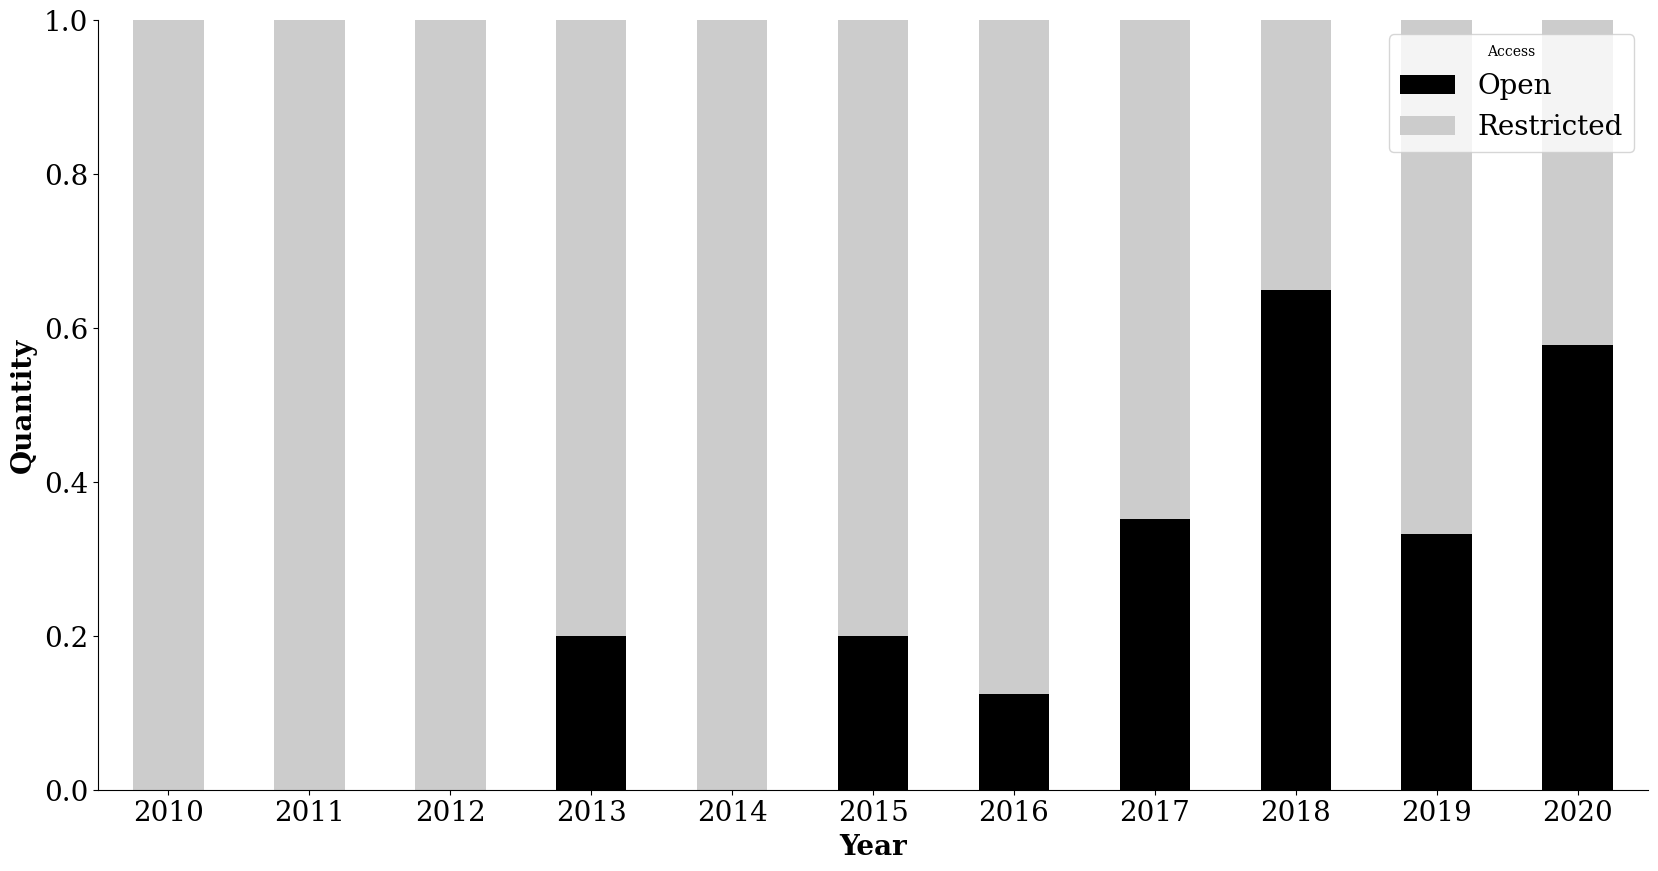

In [83]:
df_access = df_data_type[["paper_id","apa_citation",'Access', "year", "model_id"]]

df_access = df_access.groupby(
        ["paper_id",'Access']
        ).nth(0)
df_access.reset_index(inplace=True)

df_access_crosstab = pd.crosstab(index=df_access['year'], columns=df_access['Access'],normalize='index')

g = df_access_crosstab.plot(kind='bar',
                        stacked=True,
                        rot=0)
g.set_ylim([0, 1])
g.set(xlabel = 'Year', ylabel = 'Quantity')

### ¿Cual es la frecuencia de uso de cada bse de datos encontrada?

6. Gráfico frencuencia de uso de cada base de datos pública encontrada
- Interpretacion: Un predominio de pocas bases de datos. Estamos todo el tiempo sacando conclusiones sobre los mismos sujetos? Ver predominio de bases de datos publicas por sobre las privadas
- No se ha tenido en cuenta el dato aportado por Lorenzo (mas de una db por paper)

In [84]:
df_data_type=df_data_type.fillna('-')
df_data_type_sin_duplicates = df_data_type.drop_duplicates(subset='paper_id')

In [85]:
df_db = df_data_type.groupby(['paper_id',"public_database",'use_multiple_db', 'db_private', 'db_public','db_private_and_public', 'db_uppon_request', 'is_database']).nth(0)
df_db.reset_index(inplace=True)

In [86]:
df_db = multi_reversing(df_db, 'model_id', df_db[["public_database",'use_multiple_db', 'db_private', 'db_public','db_private_and_public', 'db_uppon_request', 'is_database']])
df_db = df_db.replace('Multimodal Dyadic Behavior (MMDB)', 'MMDB')

In [87]:
df_db["variable"].value_counts()

db_private          58
is_database         34
db_public            4
use_multiple_db      2
db_uppon_request     1
Name: variable, dtype: int64

In [88]:
df_db["variable"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

db_private          58.6%
is_database         34.3%
db_public            4.0%
use_multiple_db      2.0%
db_uppon_request     1.0%
Name: variable, dtype: object

In [89]:
df_data_type[["Access", "model_id", "public_database",'use_multiple_db', 'db_private', 'db_public','db_private_and_public', 'db_uppon_request', 'is_database']]
df_data_type[["public_database",'use_multiple_db', 'db_private', 'db_public','db_private_and_public', 'db_uppon_request', 'is_database']].value_counts()


public_database  use_multiple_db  db_private  db_public  db_private_and_public  db_uppon_request  is_database
-                -                x           -          -                      -                 -              58
                                  -           -          -                      -                 x              32
                                              x          -                      -                 -               4
                                              -          -                      -                 -               3
                 x                -           -          -                      -                 x               2
                 -                -           -          -                      x                 -               1
dtype: int64

In [90]:
df_data_type["Access"].value_counts()

Restricted    61
Open          39
Name: Access, dtype: int64

In [91]:
freq_data_base = df_data_type.groupby(['paper_id', 'DEAP',
       'AMIGOS', 'MAHNOB', 'CASE', 'Ascertain', 'Cog.load',
       'Multimodal Dyadic Behavior (MMDB)', 'RECOLA', 'DECAF',
       'Driving Workload', 'Liris', 'SenseEmotion', 'PMEmo',
       'Hazumi1911', 'Bio Vid Emo DB', 'DREAMER',
       'Non-EEG Biosignals Data Set for Assessment and Visualization of Neurological Status',
       'Stress Recognition in Automobile Drivers Data Set', 'PsPM-HRA1']).nth(0)
freq_data_base.reset_index(inplace=True)

db_freq = multi_reversing(freq_data_base, 'model_id', freq_data_base[['DEAP',
       'AMIGOS', 'MAHNOB', 'CASE', 'Ascertain', 'Cog.load',
       'Multimodal Dyadic Behavior (MMDB)', 'RECOLA', 'DECAF',
       'Driving Workload', 'Liris', 'SenseEmotion', 'PMEmo', 'Hazumi1911', 'Bio Vid Emo DB', 'DREAMER',
       'Non-EEG Biosignals Data Set for Assessment and Visualization of Neurological Status',
       'Stress Recognition in Automobile Drivers Data Set', 'PsPM-HRA1']])
db_freq['variable'].value_counts()

DEAP                                 9
AMIGOS                               7
MAHNOB                               7
PMEmo                                3
Ascertain                            2
RECOLA                               2
Multimodal Dyadic Behavior (MMDB)    1
Liris                                1
Hazumi1911                           1
Bio Vid Emo DB                       1
Name: variable, dtype: int64

In [92]:
db_freq['variable'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

DEAP                                 26.5%
AMIGOS                               20.6%
MAHNOB                               20.6%
PMEmo                                 8.8%
Ascertain                             5.9%
RECOLA                                5.9%
Multimodal Dyadic Behavior (MMDB)     2.9%
Liris                                 2.9%
Hazumi1911                            2.9%
Bio Vid Emo DB                        2.9%
Name: variable, dtype: object

In [93]:
db_freq['variable'] = db_freq['variable'].replace(
    to_replace=['Multimodal Dyadic Behavior (MMDB)'], 
    value='MMDB')

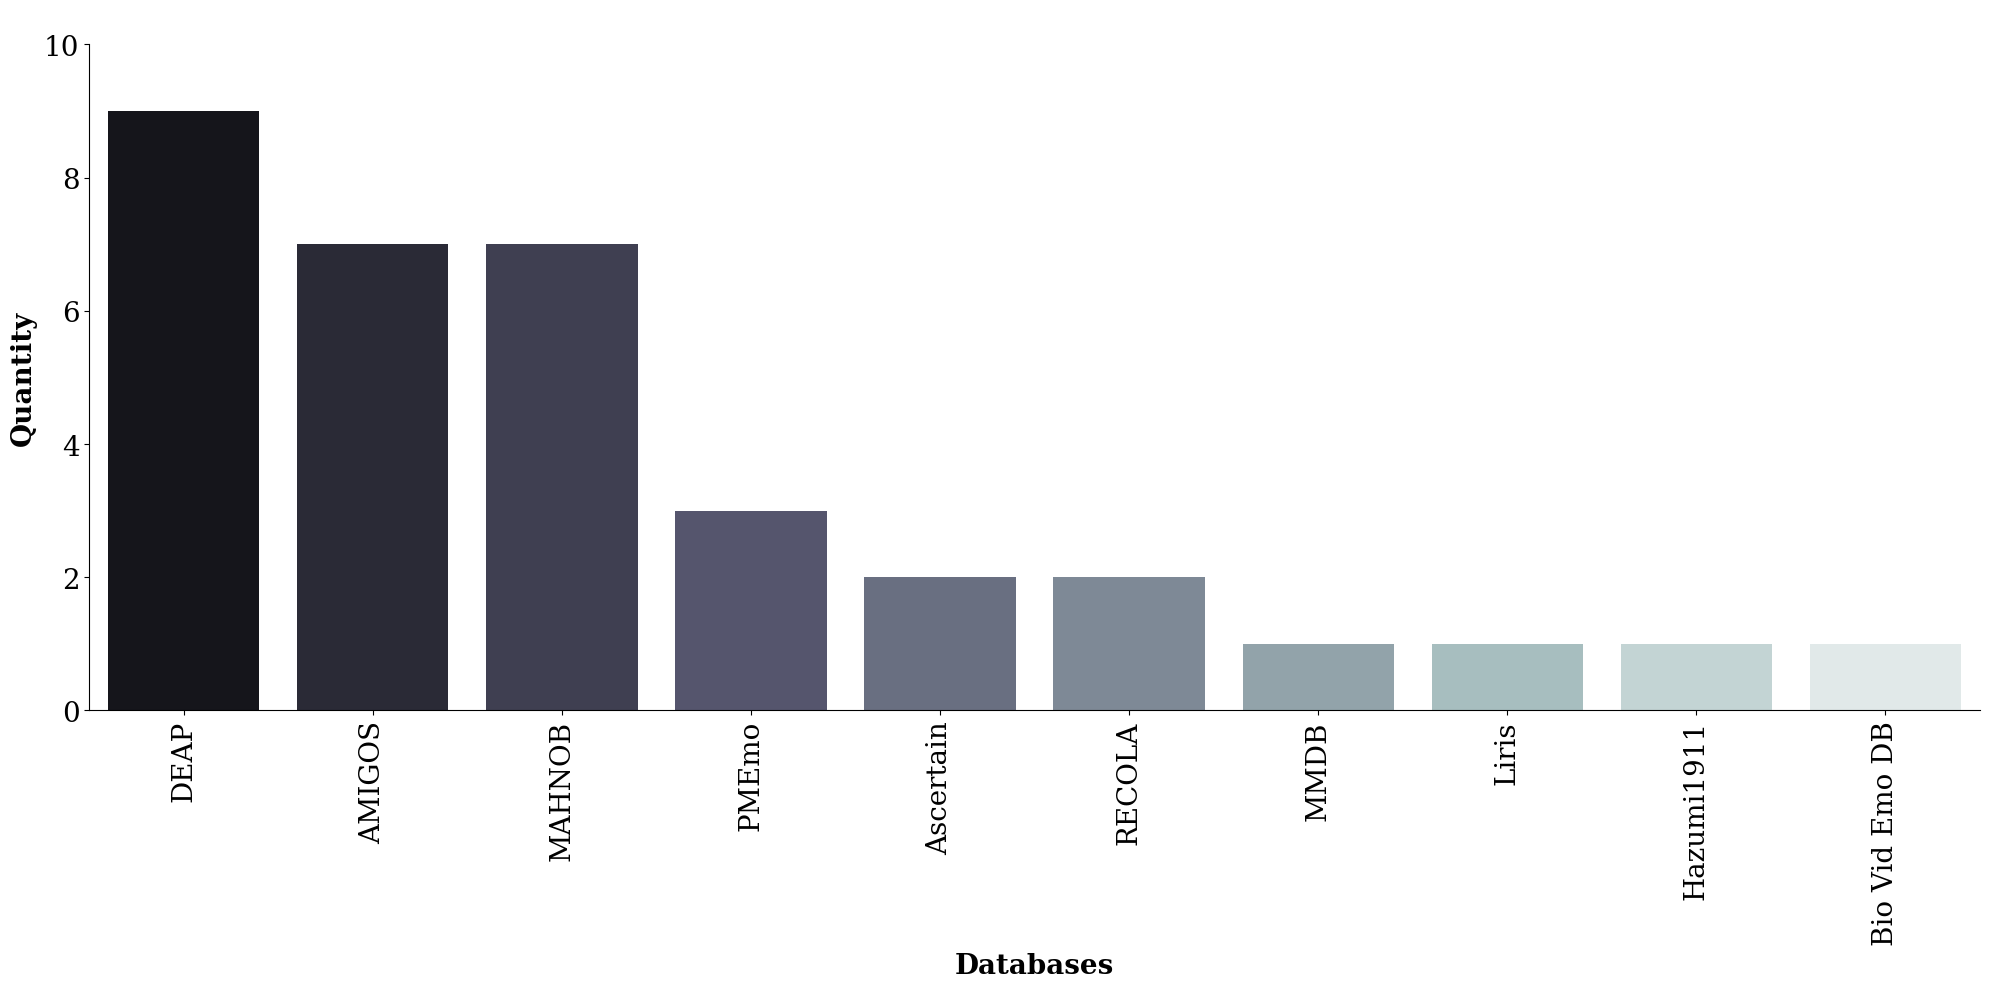

In [94]:
titulos = [' ', 'Databases', 'Quantity']
bar_plot('variable',db_freq,titulos)

C:\Users\someo\AppData\Local\Temp\ipykernel_8148\61221162.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticklabels())
C:\Users\someo\AppData\Local\Temp\ipykernel_8148\61221162.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax2.get_yticklabels())


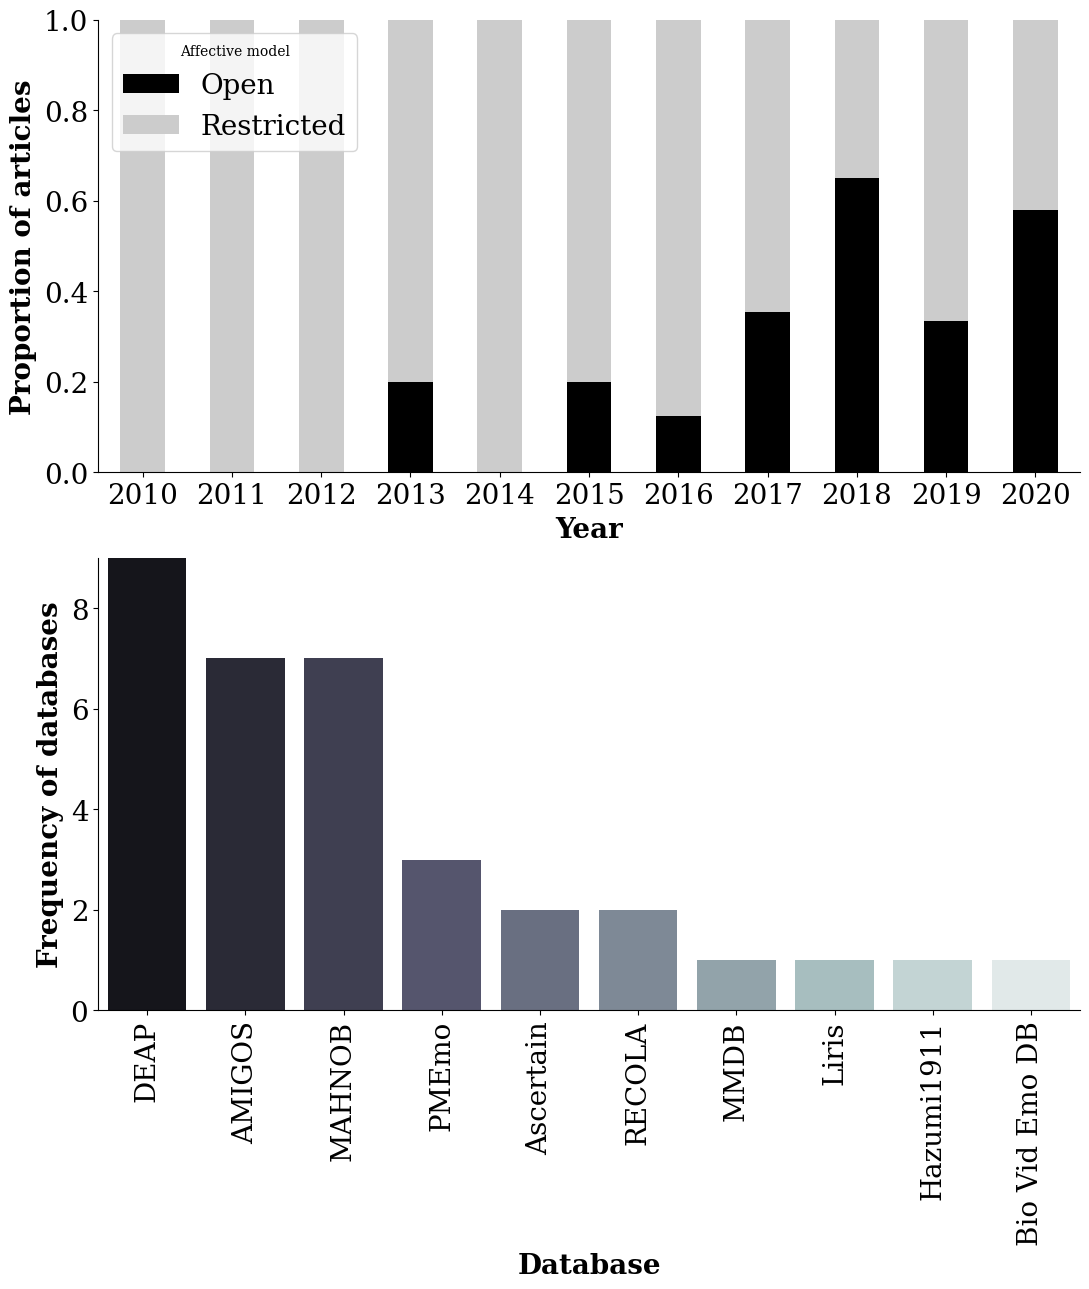

In [95]:
fig, axes = plt.subplots(2, 1, constrained_layout = True)

fig.set_figheight(13)
fig.set_figwidth(11)

ax1 = df_access_crosstab.plot(kind='bar',
                        stacked=True,
                        rot=0,
                        ax=axes[0])


ax2 = sns.countplot(x="variable", 
                    data=db_freq, 
                    order = getattr(db_freq, "variable").value_counts().index,
                    palette = "bone",
                    ax=axes[1])

ax1.set_ylim([0, 1])
ax2.set_ylim([0, 9])

ax1.set_yticklabels(ax1.get_yticklabels())
ax2.set_yticklabels(ax2.get_yticklabels())
ax1.set_xticklabels(ax1.get_xticklabels())
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)

ax1.set_xlabel("Year")
ax1.set_ylabel("Proportion of articles")
ax2.set_xlabel("Database")
ax2.set_ylabel("Frequency of databases")

"""ax1.set_title("Proporción de trabajos por año (2010 - 2020) segun tipo de modelo emocional")
ax2.set_title("Proporción de trabajos por año (2010 - 2020) segun tipo de algoritmo")"""

ax1.legend(title='Affective model', loc='upper left')

fig.tight_layout()

### ¿De que revistas cientificas provinieron la mayoria de los papers? ¿Cual era su orientacion (psicologica o ingenieria de datos)?
7. Gráfico frecuencia de papers según revista científica de origen, distinguiendo entre las que poseen orientación en ingeniería de datos y las que no

Nota: falta filtrar bien cuales son journal, y cuales de estas son de ingenieria o no (diferenciarlas con color o hue)

C:\Users\someo\AppData\Local\Temp\ipykernel_8148\2549346213.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


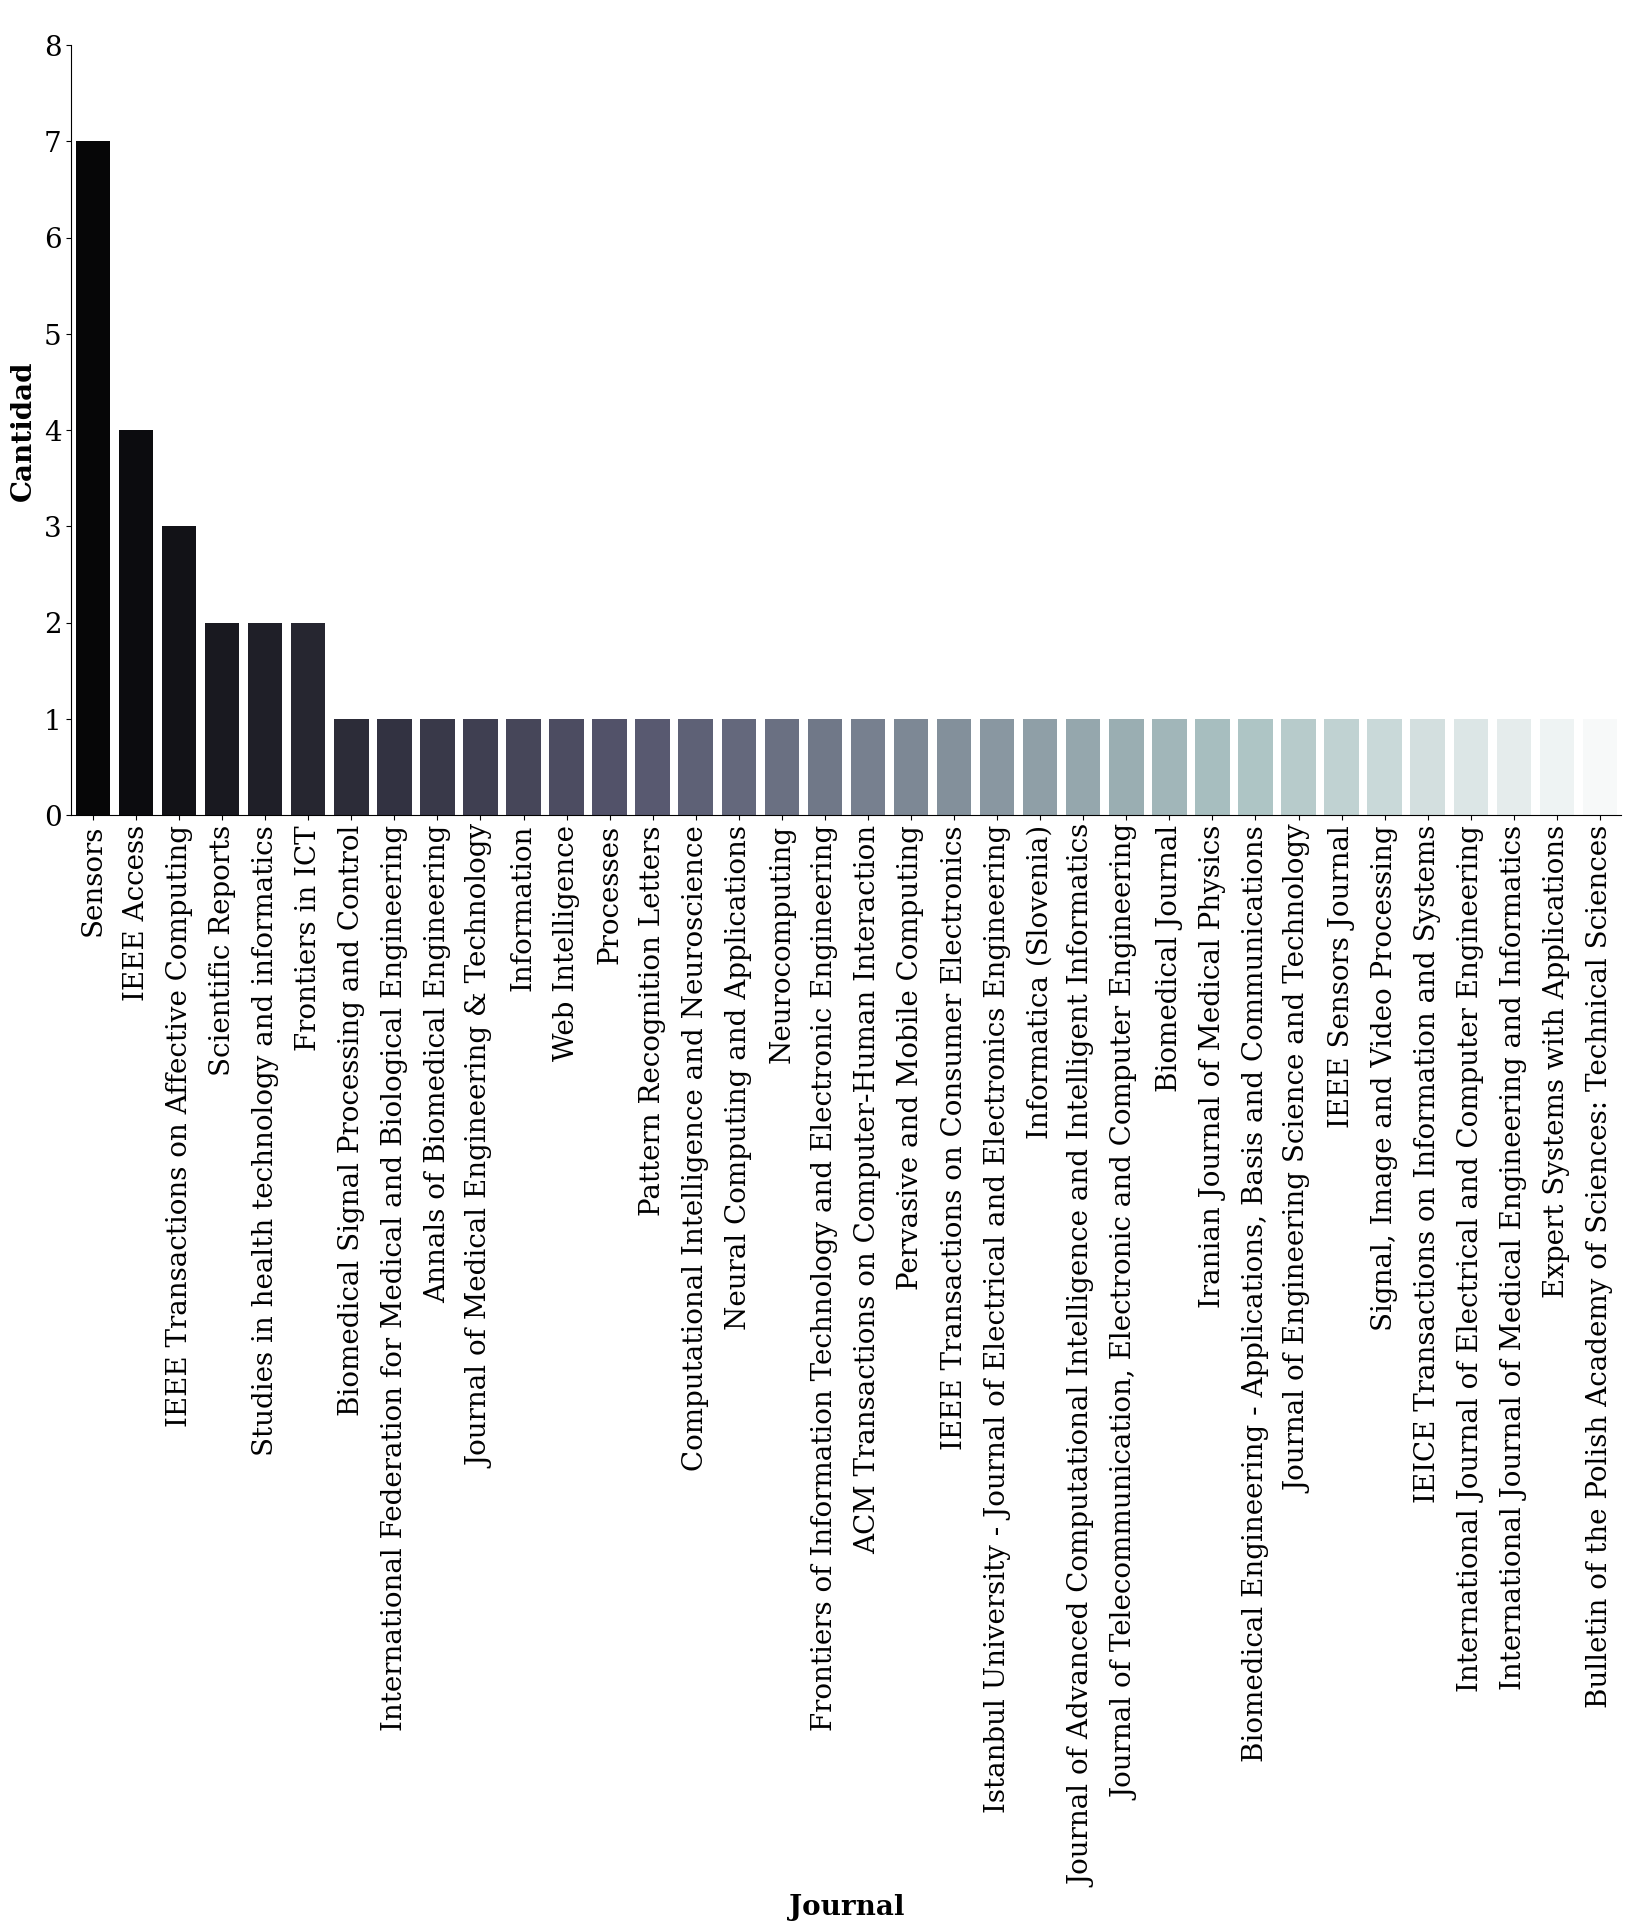

In [96]:
#por revista
df_metadata=df_metadata.fillna('-')
df_metadata_sin_duplicates = df_metadata.drop_duplicates(subset='paper_id')

df_source_title = df_metadata_sin_duplicates[['paper_id','source_title','source_type_journal']]
df_source_title = df_source_title[df_source_title['source_type_journal'].isin(['x', 'X'])] 

titulos = [' ', 'Journal', 'Cantidad']
bar_plot('source_title',df_source_title,titulos)

In [97]:
df_source_title["source_title"].value_counts()

Sensors                                                                       7
IEEE Access                                                                   4
IEEE Transactions on Affective Computing                                      3
Scientific Reports                                                            2
Studies in health technology and informatics                                  2
Frontiers in ICT                                                              2
Biomedical Signal Processing and Control                                      1
International Federation for Medical and Biological Engineering               1
Annals of Biomedical Engineering                                              1
Journal of Medical Engineering & Technology                                   1
Information                                                                   1
Web Intelligence                                                              1
Processes                               

In [98]:
df_source_title["source_title"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Sensors                                                                       14.0%
IEEE Access                                                                    8.0%
IEEE Transactions on Affective Computing                                       6.0%
Scientific Reports                                                             4.0%
Studies in health technology and informatics                                   4.0%
Frontiers in ICT                                                               4.0%
Biomedical Signal Processing and Control                                       2.0%
International Federation for Medical and Biological Engineering                2.0%
Annals of Biomedical Engineering                                               2.0%
Journal of Medical Engineering & Technology                                    2.0%
Information                                                                    2.0%
Web Intelligence                                                            

In [99]:
serie_sources = df_source_title["source_title"].value_counts()
df_serie_sources = serie_sources.to_frame()
df_serie_sources = df_serie_sources.reset_index()
df_serie_sources.rename(columns = {'index':'algoritmo', 'variable':'cantidad'}, inplace = True)

In [100]:
col1 = df_serie_sources.columns[0]
col2 = df_serie_sources.columns[1]

mapping_others = {}

for i, row in df_serie_sources.iterrows():
    if row[col2] == 1:
        mapping_others.update({row[col1]: "Others (=1)"})

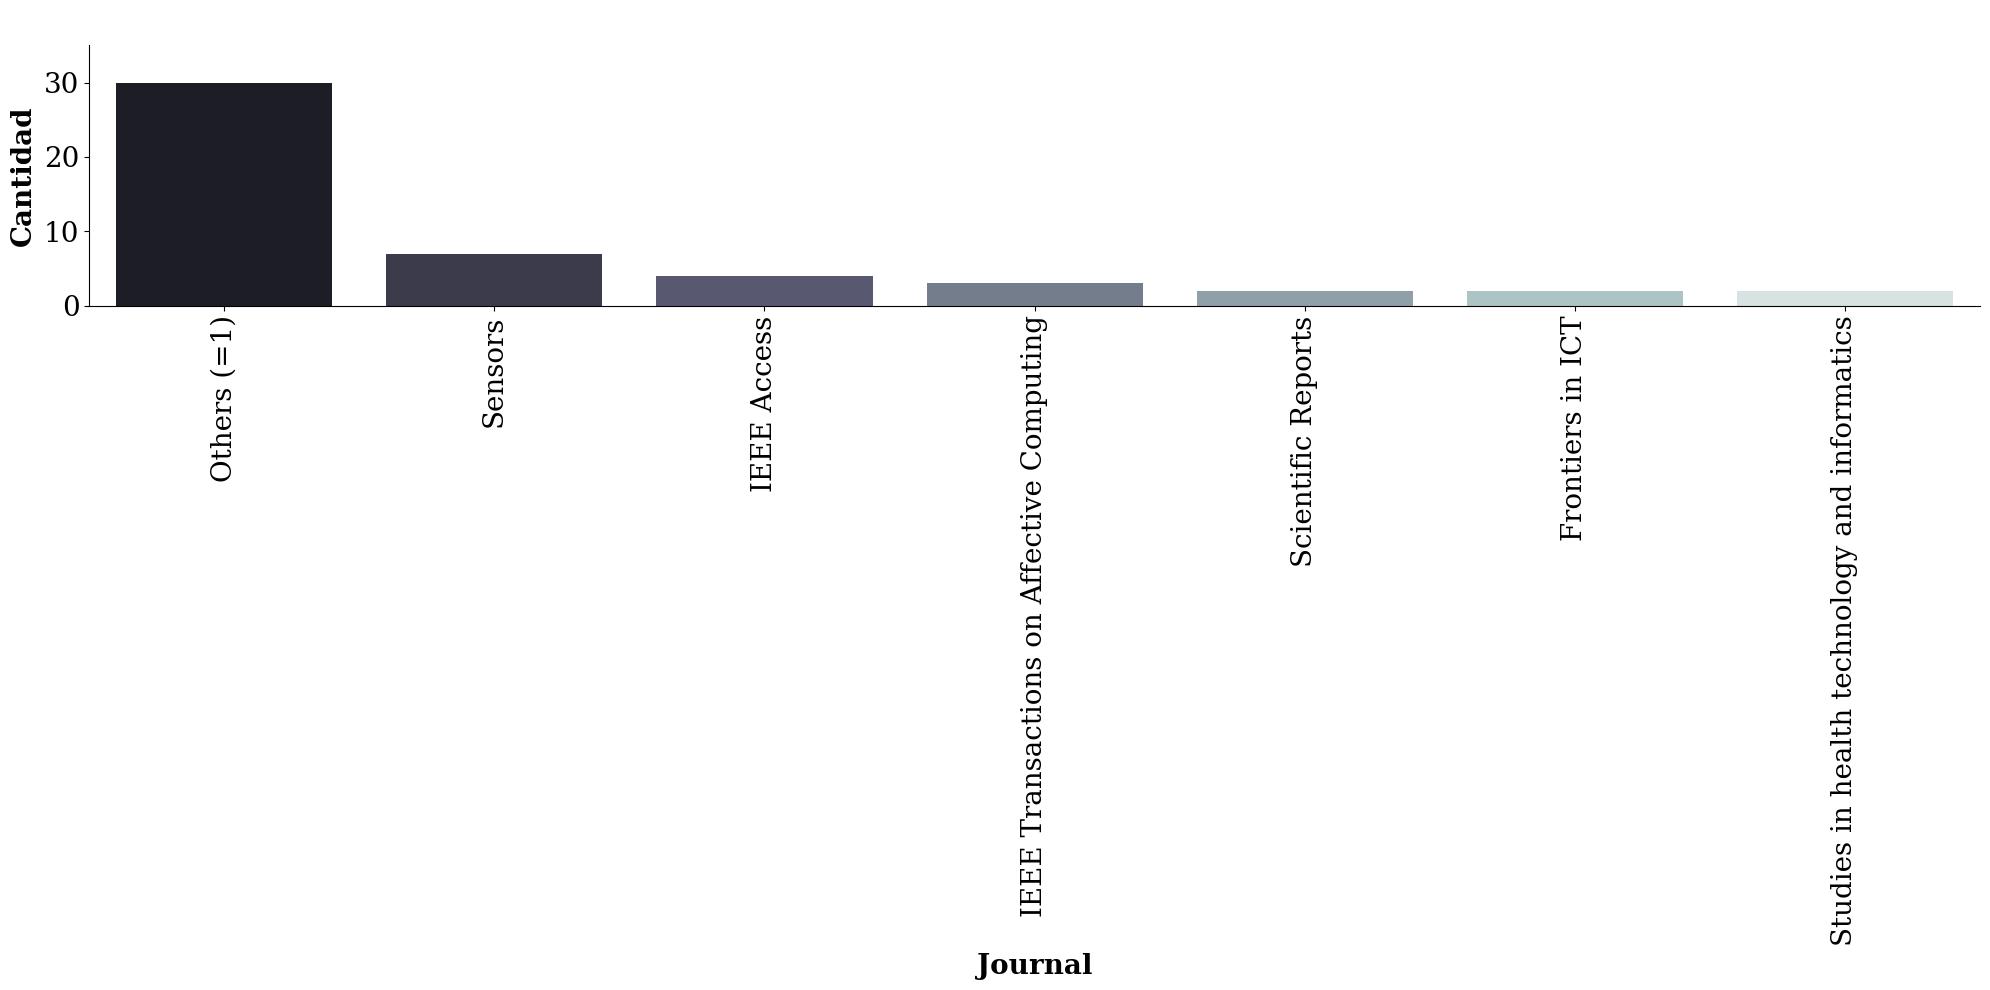

In [101]:
sources_with_others = df_source_title.copy()
sources_with_others.loc[:,'source_title'] = sources_with_others.loc[:,'source_title'].replace(mapping_others)
sources_with_others['source_title'].value_counts()

titulos = [' ', 'Journal', 'Cantidad']
bar_plot('source_title',sources_with_others,titulos)

In [102]:
sources_with_others["source_title"].value_counts()

Others (=1)                                     30
Sensors                                          7
IEEE Access                                      4
IEEE Transactions on Affective Computing         3
Scientific Reports                               2
Frontiers in ICT                                 2
Studies in health technology and informatics     2
Name: source_title, dtype: int64

In [103]:
sources_with_others["source_title"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Others (=1)                                     60.0%
Sensors                                         14.0%
IEEE Access                                      8.0%
IEEE Transactions on Affective Computing         6.0%
Scientific Reports                               4.0%
Frontiers in ICT                                 4.0%
Studies in health technology and informatics     4.0%
Name: source_title, dtype: object

### Interpretation

In [104]:
data_interpretation_model = pd.read_csv('.\data\Tabla Normalizada - Statistical Learning model.csv')
data_interpretation_model= data_interpretation_model.fillna('-')
model_interpretion = data_interpretation_model[data_interpretation_model['model_interpretation'] !='-']
model_interpretation = model_interpretion.groupby(['paper_id', 'model_interpretation']).nth(0)

In [105]:
model_interpretation.reset_index(inplace= True)
model_interpretation.drop_duplicates(subset = ['paper_id'],inplace=True)
model_interpretation

paper_id                               model_interpretation  model_id  \
0          5  By using the gradient fields (see Fig. 6(c,d))...        10   
1         12  Figure 6 shows similar EDA signal behaviour du...        47   
2         17  After preprocessing and windowing the signals,...        95   
3         19  The relationship between visual descriptors an...       129   
4         21  Physiological measures in the real world are m...       132   
5         29  Furthermore, it is worth noting that quality a...       167   
6         30  Poor classification accuracy may arise because...       175   
8         35  Compare to some references [1], [3], [4], the ...       195   
9         43   Electrodermal Activity. Interestingly, EDA se...       261   
10        57  Additionally, we showed that psychological tra...       295   
11        60  Additionally, analyzing the results of the sta...       309   
12        61  Another major finding is that EEG and GSR appe...       329   
13        64  Another\r\nreason for the better performance o...       343   
14        65  Particularly, although EDA is one of\r\nthe mo...       344   
15        75  Finally, significant correlates were found bet...       387   
16        77  This research analyzed the physiological compo...       419   
17        78  While our study shows that with TEM, the emoti...       421   
18        82  Physiological datasets with a large number of ...       438   
19        85  The proposed framework has enhanced the perfor...       454   
20        88   relevant information on the ANS activity can ...       463   
21        92  the initial analysis also shows some noticeabl...       476   
22        95  Second, our error analysis suggests that\nthe ...       488   
24        96  The best features that were repeated\r\nin the...       491   

                                         apa_citation  year affective_model  \
0   Wei, J., Chen, T., Liu, G., & Yang, J. (2016)....  2016     dimensional   
1   Ooi, J. S. K., Ahmad, S. A., Ishak, A. J., Min...  2018     categorical   
2   Goshvarpour, A., Abbasi, A., Goshvarpour, A., ...  2017     categorical   
3   Hernández-García, A., Fernández-Martínez, F., ...  2017     dimensional   
4   Xu, Y., Hubener, I., Seipp, A.-K., Ohly, S., &...  2017     dimensional   
5   Gupta, R., Abadi, M. K., Cabré, J. A. C., Morr...  2016     dimensional   
6   Ooi, J. S. K., Ahmad, S. A., Chong, Y. Z., Ali...  2016     categorical   
8   Ferdinando, H., & Alasaarela, E. (2018). Emoti...  2018     dimensional   
9   Barral, O., Kosunen, I., & Jacucci, G. (2017)....  2017     categorical   
10  Henriques, R., Paiva, A., & Antunes, C. (2013)...  2013     categorical   
11  Al Machot, F., Elmachot, A., Ali, M., Al Macho...  2019     dimensional   
12  Seo, J., Laine, T. H., & Sohn, K. A. (2019). A...  2019     dimensional   
13  Dar, M. N., Akram, M. U., Khawaja, S. G., & Pu...  2020     dimensional   
14  Greco, A., Marzi, C., Lanata, A., Scilingo, E....  2019     dimensional   
15  Song, T., Zheng, W., Lu, C., Zong, Y., Zhang, ...  2019     categorical   
16  Pinto, G., Carvalho, J. M., Barros, F., Soares...  2020     categorical   
17  Raheel, A., Majid, M., Alnowami, M., & Anwar, ...  2020     categorical   
18  Santamaria-Granados, L., Munoz-Organero, M., R...  2019     dimensional   
19  Xie, J., Xu, X., & Shu, L. (2018, May). WT fea...  2018     categorical   
20  Ghiasi, S., Greco, A., Barbieri, R., Scilingo,...  2020     dimensional   
21  Rahman, J. S., Hossain, M. Z., & Gedeon, T. (2...  2019     categorical   
22  Yang, H. C., & Lee, C. C. (2019, September). A...  2020     dimensional   
24  Kołodziej, M., Tarnowski, P., Majkowski, A., &...  2020     dimensional   

   is_classifier class_model_output_number  \
0              -                         -   
1              x                         2   
2              x                         2   
3              -                         -   
4              x            

In [106]:
print(f' En {len(model_interpretation)} papers se realizan interpretaciones emocionales de los modelos')

 En 23 papers se realizan interpretaciones emocionales de los modelos


In [107]:
# lista papers id
model_interpretation_list = model_interpretation["paper_id"].to_list()
model_interpretation_list = [int(a) for a in model_interpretation_list]
model_interpretation_list

[5,
 12,
 17,
 19,
 21,
 29,
 30,
 35,
 43,
 57,
 60,
 61,
 64,
 65,
 75,
 77,
 78,
 82,
 85,
 88,
 92,
 95,
 96]

In [108]:
df_metadata_filtered = df_metadata[df_metadata['paper_id'].isin(model_interpretation_list)]
df_metadata_filtered.drop_duplicates("paper_id", inplace= True)
df_metadata_filtered[["paper_id", "apa_citation", "year", "source_title"]]

C:\Users\someo\AppData\Local\Temp\ipykernel_8148\3128163824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metadata_filtered.drop_duplicates("paper_id", inplace= True)


paper_id                                       apa_citation  year  \
9           5  Wei, J., Chen, T., Liu, G., & Yang, J. (2016)....  2016   
46         12  Ooi, J. S. K., Ahmad, S. A., Ishak, A. J., Min...  2018   
94         17  Goshvarpour, A., Abbasi, A., Goshvarpour, A., ...  2017   
128        19  Hernández-García, A., Fernández-Martínez, F., ...  2017   
131        21  Xu, Y., Hubener, I., Seipp, A.-K., Ohly, S., &...  2017   
166        29  Gupta, R., Abadi, M. K., Cabré, J. A. C., Morr...  2016   
172        30  Ooi, J. S. K., Ahmad, S. A., Chong, Y. Z., Ali...  2016   
194        35  Ferdinando, H., & Alasaarela, E. (2018). Emoti...  2018   
260        43  Barral, O., Kosunen, I., & Jacucci, G. (2017)....  2017   
293        57  Henriques, R., Paiva, A., & Antunes, C. (2013)...  2013   
308        60  Al Machot, F., Elmachot, A., Ali, M., Al Macho...  2019   
328        61  Seo, J., Laine, T. H., & Sohn, K. A. (2019). A...  2019   
342        64  Dar, M. N., Akram, M. U., Khawaja, S. G., & Pu...  2020   
343        65  Greco, A., Marzi, C., Lanata, A., Scilingo, E....  2019   
383        75  Song, T., Zheng, W., Lu, C., Zong, Y., Zhang, ...  2019   
418        77  Pinto, G., Carvalho, J. M., Barros, F., Soares...  2020   
420        78  Raheel, A., Majid, M., Alnowami, M., & Anwar, ...  2020   
437        82  Santamaria-Granados, L., Munoz-Organero, M., R...  2019   
453        85  Xie, J., Xu, X., & Shu, L. (2018, May). WT fea...  2018   
462        88  Ghiasi, S., Greco, A., Barbieri, R., Scilingo,...  2020   
475        92  Rahman, J. S., Hossain, M. Z., & Gedeon, T. (2...  2019   
480        95  Yang, H. C., & Lee, C. C. (2019, September). A...  2020   
490        96  Kołodziej, M., Tarnowski, P., Majkowski, A., &...  2020   

                                          source_title  
9                                   Scientific Reports  
46   International Journal of Medical Engineering a...  
94                  Signal, Image and Video Processing  
128  Proceedings - 2017 IEEE/WIC/ACM International ...  
131  2017 IEEE International Conference on Pervasiv...  
166  ICMR 2016 - Proceedings of the 2016 ACM Intern...  
172  IECBES 2016 - IEEE-EMBS Conference on Biomedic...  
194  Journal of Telecommunication, Electronic and C...  
260     ACM Transactions on Computer-Human Interaction  
293  Humaine Association Conference on Affective Co...  
308                                            Sensors  
328                                            Sensors  
342                                            Sensors  
343  Annual International Conference of the IEEE En...  
383                                        IEEE Access  
418                                            Sensors  
420                                            Sensors  
437                                        IEEE Access  
453  Asian Conf. Affective Comput. Intell. Interact...  
462                                 Scientific Reports  
475  Australian Conference on Human-Computer-Intera...  
480  International Conference on Affective Computin...  
490  Bulletin of the Polish Academy of Sciences: Te...

In [109]:
list_journal_int = df_metadata_filtered["source_title"].unique()
list_journal_int = list_journal_int.tolist()
list_journal_int

['Scientific Reports',
 'International Journal of Medical Engineering and Informatics',
 'Signal, Image and Video Processing',
 'Proceedings - 2017 IEEE/WIC/ACM International Conference on Web Intelligence, WI 2017',
 '2017 IEEE International Conference on Pervasive Computing and Communications Workshops, PerCom Workshops 2017',
 'ICMR 2016 - Proceedings of the 2016 ACM International Conference on Multimedia Retrieval',
 'IECBES 2016 - IEEE-EMBS Conference on Biomedical Engineering and Sciences',
 'Journal of Telecommunication, Electronic and Computer Engineering',
 'ACM Transactions on Computer-Human Interaction',
 'Humaine Association Conference on Affective Computing and Intelligent Interaction',
 'Sensors',
 'Annual International Conference of the IEEE Engineering in Medicine and Biology Society. IEEE Engineering in Medicine and Biology Society. Annual International Conference',
 'IEEE Access',
 'Asian Conf. Affective Comput. Intell. Interaction, ACII Asia',
 'Australian Conference

C:\Users\someo\AppData\Local\Temp\ipykernel_8148\587488617.py:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


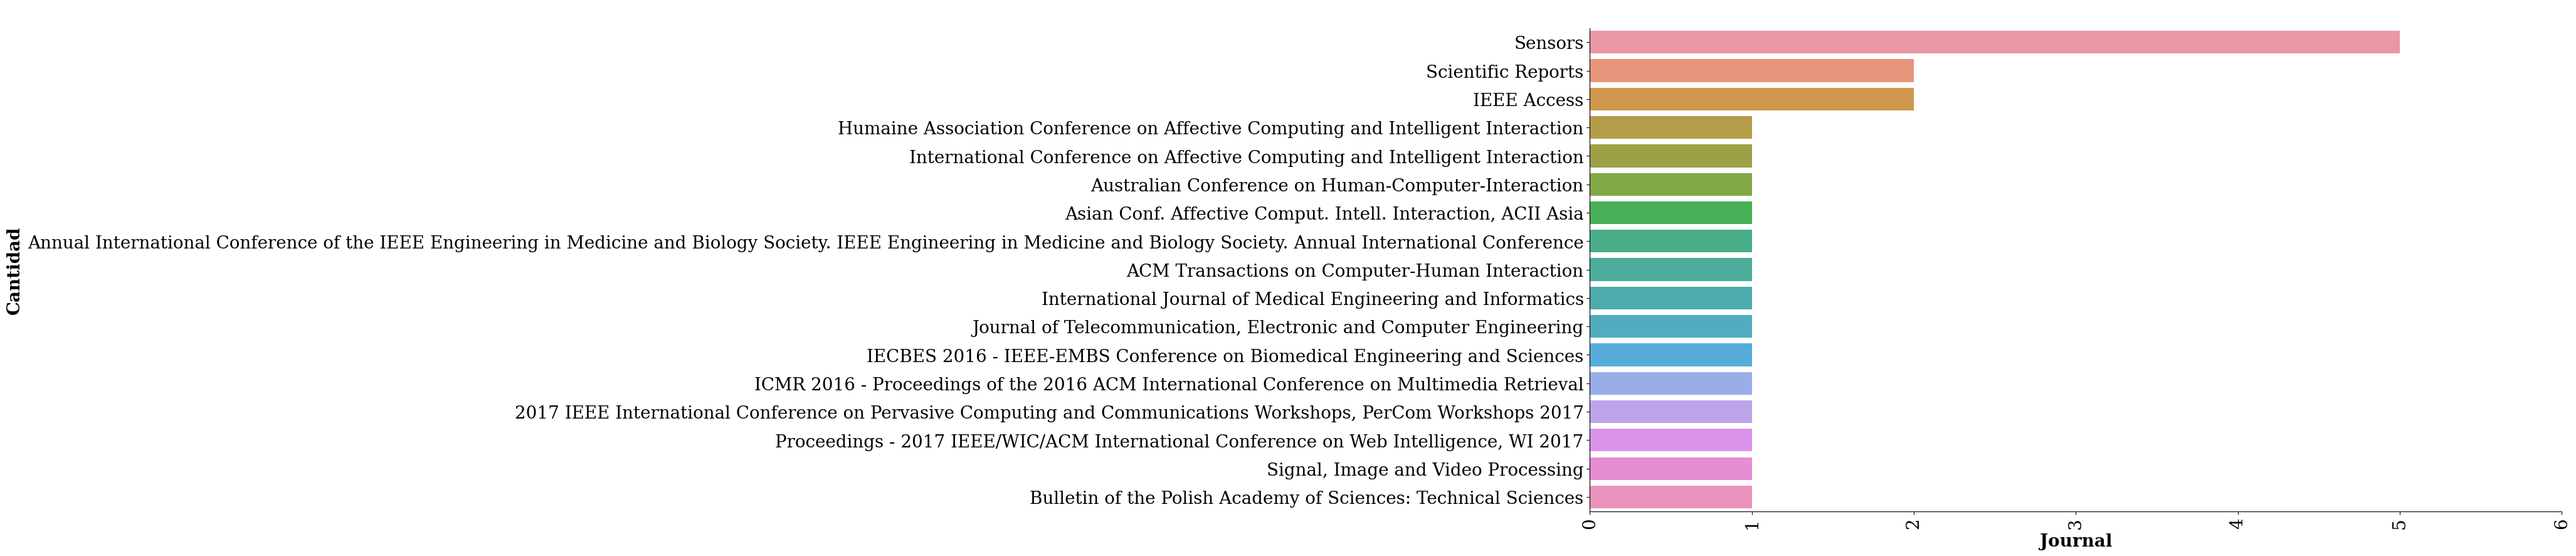

In [110]:
titulos = [' ', 'Journal', 'Cantidad']

var_x = "source_title"
df = df_metadata_filtered

g = sns.countplot(y=var_x, data=df, order = getattr(df, var_x).value_counts().index)
g.set(title = titulos[0], xlabel = titulos[1], ylabel = titulos[2])
plt.xticks(rotation=90)
    
plt.tight_layout()
plt.savefig(f'.\\Emmanuel\\figures\\NUEVOS. {titulos[0]}.jpg', dpi=1000)
plt.show()

### Participants

In [111]:
df_participants= df_participants.fillna('-')

In [112]:
df_participants

paper_id  model_id                                       apa_citation  \
0           1         1  Zangróniz, R., Martínez-Rodrigo, A., Pastor, J...   
1           2         2  Liu, M., Fan, D., Zhang, X., & Gong, X. (2017)...   
2           3         3  Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...   
3           3         4  Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...   
4           4         5  Ali, M., Machot, F. A., Mosa, A. H., Jdeed, M....   
..        ...       ...                                                ...   
494        98       495  Subramanian, R., Wache, J., Abadi, M. K., Vier...   
495        98       496  Subramanian, R., Wache, J., Abadi, M. K., Vier...   
496        98       497  Subramanian, R., Wache, J., Abadi, M. K., Vier...   
497        99       498  Yun, H., Fortenbacher, A., Helbig, R., & Pinkw...   
498        99       499  Yun, H., Fortenbacher, A., Helbig, R., & Pinkw...   

      N n_female mean_age meadian_age range_age country  
0    45       20        -           -         -   Spain  
1     -        -        -           -         -   China  
2    32       16     26.9           -     19-37       -  
3    32       16     26.9           -     19-37       -  
4    27       16    26.06           -     19-40       -  
..   ..      ...      ...         ...       ...     ...  
494  58       21       30           -         -       -  
495  58       21       30           -         -       -  
496  58       21       30           -         -       -  
497  27        -        -           -         -       -  
498  27        -        -           -         -       -  

[499 rows x 9 columns]

country

In [113]:
df_participants_country = df_participants.groupby(['paper_id', 'country']).nth(0)
df_participants_country.reset_index(inplace =  True)
df_participants_country["country"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

-            77.8%
Malasya       5.1%
China         3.0%
Iran          3.0%
Spain         1.0%
USA           1.0%
Germany       1.0%
India         1.0%
Indonesia     1.0%
Canada        1.0%
French        1.0%
Finland       1.0%
Korea         1.0%
Italy         1.0%
Poland        1.0%
Name: country, dtype: object

In [114]:
participants_total = df_participants.groupby(['paper_id', 'N']).nth(0)
participants_total.reset_index(inplace =  True)

In [115]:
participants_total["N"].unique()

array(['45', '-', '32', '27', '121', '15', '6', '30', '19', '20', '39',
       '52', '25', '35', '46', '22', '8', '23', '11', '33', '40', '10',
       '255', '58', '21', '13', '42', '4', '31', '254', '26', '28', '18',
       '100', '162', '9', '55', '457', '24', '94'], dtype=object)

In [116]:
participants_total["N"].value_counts()

-      11
27     11
32     11
40      8
30      4
10      4
4       3
457     3
11      3
20      3
13      3
21      3
25      3
35      3
19      3
26      2
58      2
46      2
22      2
15      2
31      2
100     1
18      1
162     1
28      1
254     1
9       1
55      1
24      1
45      1
42      1
255     1
33      1
23      1
8       1
52      1
39      1
6       1
121     1
94      1
Name: N, dtype: int64

In [117]:
participants_without_n= participants_total[participants_total['N']== '27']
participants_without_n

paper_id   N  model_id  \
3           4  27         5   
4           5  27        10   
9          10  27        44   
15         16  27        93   
19         20  27       130   
34         35  27       195   
38         37  27       228   
64         59  27       303   
65         60  27       319   
75         69  27       359   
106        99  27       498   

                                          apa_citation n_female mean_age  \
3    Ali, M., Machot, F. A., Mosa, A. H., Jdeed, M....       16    26.06   
4    Wei, J., Chen, T., Liu, G., & Yang, J. (2016)....       27    19.44   
9    Machot, F. A., Ali, M., Ranasinghe, S., Mosa, ...       16    26.06   
15   Wiem, M. B. H., & Lachiri, Z. (2017). Emotion ...       16    26.06   
19   Wiem, M. B. H., & Lachiri, Z. (2017). Emotion ...       16    26.06   
34   Ferdinando, H., & Alasaarela, E. (2018). Emoti...       16    26.06   
38   Gjoreski, M., Luštrek, M., Gams, M., & Mitrevs...       16    26.06   
64   Yu, D., & Sun, S. (2020). A systematic explora...       16    26.06   
65   Al Machot, F., Elmachot, A., Ali, M., Al Macho...       16    26.06   
75   Wei, W., Jia, Q., Feng, Y., & Chen, G. (2018)....       16    26.06   
106  Yun, H., Fortenbacher, A., Helbig, R., & Pinkw...        -        -   

    meadian_age range_age country  
3             -     19-40       -  
4             -     18-22       -  
9             -     19-40       -  
15            -     19-40       -  
19            -     19-40       -  
34            -     19-40       -  
38            -     19-40       -  
64            -     19-40       -  
65            -     19-40       -  
75            -     19-40       -  
106           -         -       -

In [118]:
participants_n= participants_total[participants_total['N']!= '-']
participants_n

paper_id    N  model_id  \
0           1   45         1   
2           3   32         3   
3           4   27         5   
4           5   27        10   
5           6  121        12   
..        ...  ...       ...   
102        95   40       481   
103        96   22       491   
104        97   32       492   
105        98   58       494   
106        99   27       498   

                                          apa_citation n_female mean_age  \
0    Zangróniz, R., Martínez-Rodrigo, A., Pastor, J...       20        -   
2    Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...       16     26.9   
3    Ali, M., Machot, F. A., Mosa, A. H., Jdeed, M....       16    26.06   
4    Wei, J., Chen, T., Liu, G., & Yang, J. (2016)....       27    19.44   
5    Feng, H., Golshan, H. M., & Mahoor, M. H. (201...        -        -   
..                                                 ...      ...      ...   
102  Yang, H. C., & Lee, C. C. (2019, September). A...       13     28.3   
103  Kołodziej, M., Tarnowski, P., Majkowski, A., &...        -       20   
104  Ganapathy, N., & Swaminathan, R. (2019). Emoti...       16     26.9   
105  Subramanian, R., Wache, J., Abadi, M. K., Vier...       21       30   
106  Yun, H., Fortenbacher, A., Helbig, R., & Pinkw...        -        -   

    meadian_age range_age country  
0             -         -   Spain  
2             -     19-37       -  
3             -     19-40       -  
4             -     18-22       -  
5             -       1-3     USA  
..          ...       ...     ...  
102           -         -       -  
103           -         -  Poland  
104           -     19-37       -  
105           -         -       -  
106           -         -       -  

[96 rows x 9 columns]

49.041666666666664


C:\Users\someo\AppData\Local\Temp\ipykernel_8148\2318806274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  participants_n["N"] = participants_n["N"].astype(int)


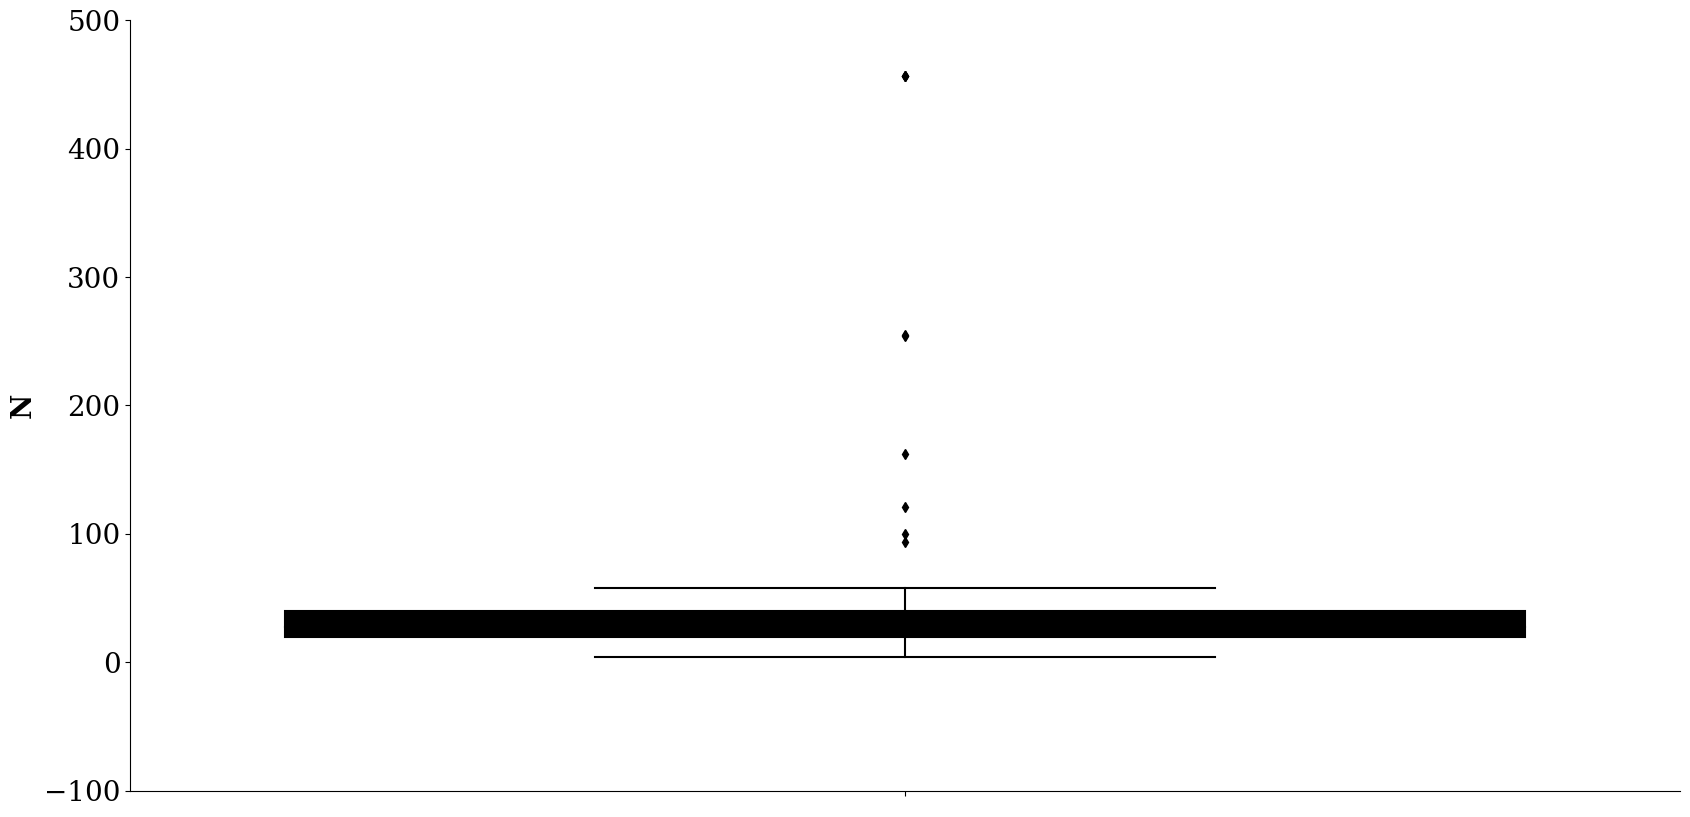

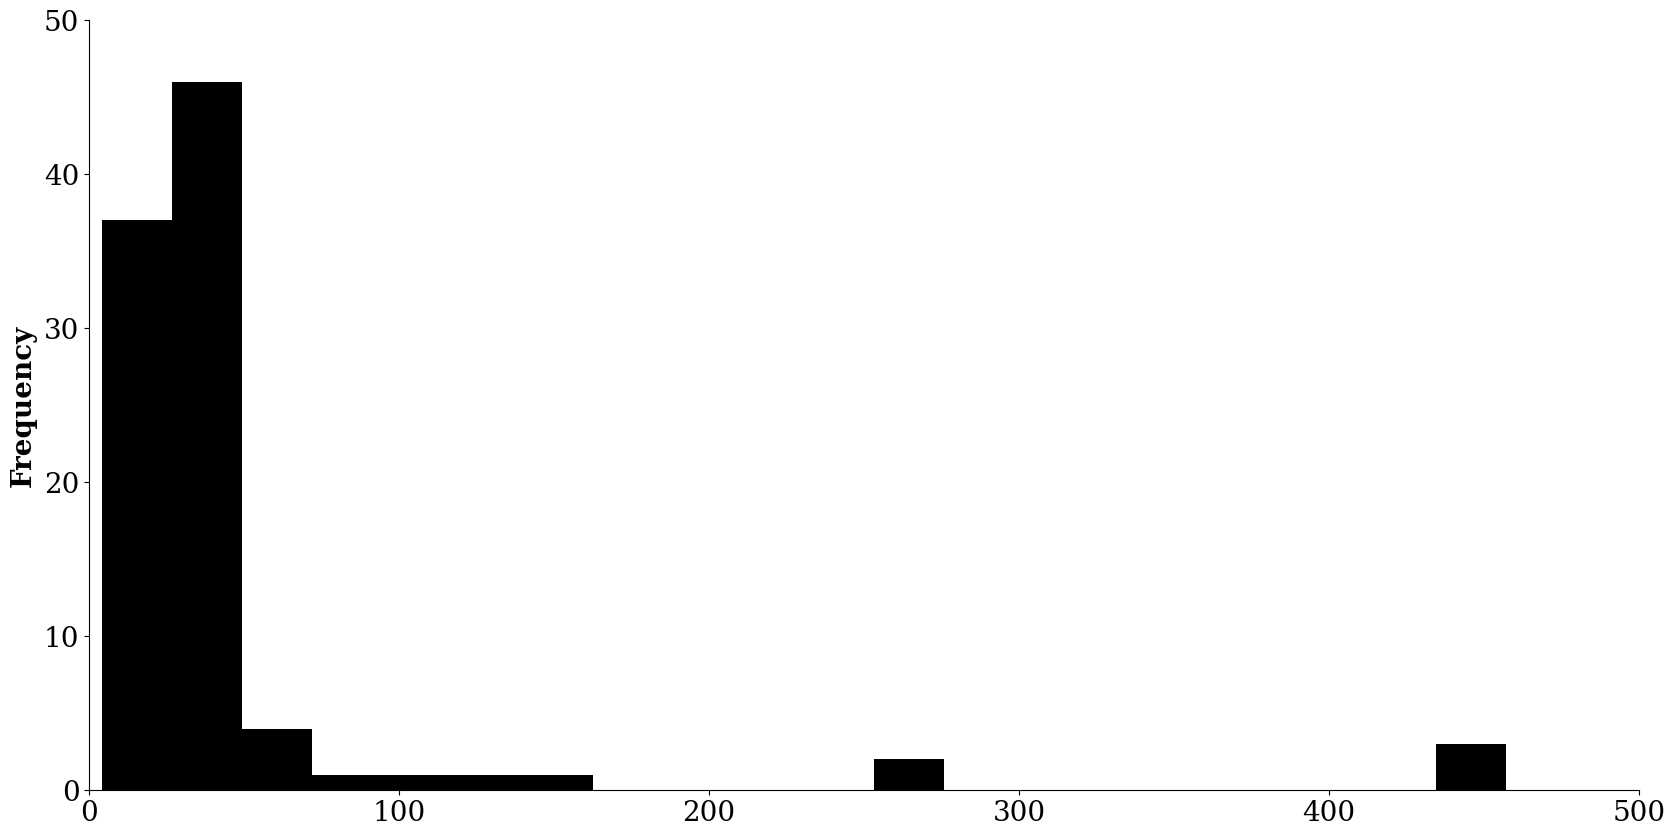

In [119]:
participants_n["N"] = participants_n["N"].astype(int)
print(participants_n['N'].mean())
g = sns.boxplot(y="N", data=participants_n)
plt.show()
g2 = participants_n['N'].plot(bins = 20,kind ='hist', xlim = [0,500])
plt.show()

In [120]:
participants_no_n= participants_total[participants_total['N']== '-']
participants_no_n

paper_id  N  model_id                                       apa_citation  \
1          2  -         2  Liu, M., Fan, D., Zhang, X., & Gong, X. (2017)...   
27        28  -       158  Das, P., Khasnobish, A., & Tibarewala, D. N. (...   
36        37  -       221  Gjoreski, M., Luštrek, M., Gams, M., & Mitrevs...   
44        40  -       251  Milchevski, A., Rozza, A., & Taskovski, D. (20...   
51        47  -       269  Bornoiu, I.-V., Strungaru, R., & Grigore, O. (...   
53        49  -       275  Drungilas, D., Bielskis, A. A., & Denisov, V. ...   
58        54  -       284  Cheng, J., & Liu, G. (2013). Computing nonline...   
74        68  -       358  García-Faura, Á., Hernández-García, A., Fernán...   
78        72  -       368  Golgouneh, A., & Tarvirdizadeh, B. (2020). Fab...   
96        90  -       468  Katada, S., Okada, S., Hirano, Y., & Komatani,...   
99        93  -       477  Rahim, A., Sagheer, A., Nadeem, K., Dar, M. N....   

   n_female mean_age meadian_age range_age country  
1         -        -           -         -   China  
27        -        -           -         -       -  
36        -        -           -         -       -  
44        -        -           -         -       -  
51        -        -           -     25-65       -  
53        -        -           -         -       -  
58        -       20           -         -       -  
74        -    23.11           -     17-60       -  
78        -        -           -         -       -  
96        -        -           -         -       -  
99        -        -           -         -       -

In [121]:
participants_female = df_participants.groupby(['paper_id', 'n_female']).nth(0)
participants_female.reset_index(inplace =  True)

In [122]:
participants_without_female= participants_female[participants_female['n_female'] == '-']
participants_without_female

paper_id n_female  model_id  \
1           2        -         2   
5           6        -        12   
7           8        -        40   
11         12        -        47   
12         13        -        51   
14         15        -        67   
20         21        -       132   
21         22        -       144   
23         24        -       149   
25         26        -       154   
27         28        -       158   
36         37        -       221   
43         40        -       251   
47         44        -       262   
50         47        -       269   
52         49        -       275   
53         50        -       276   
55         52        -       278   
56         53        -       279   
57         54        -       284   
59         56        -       292   
60         57        -       296   
62         58        -       302   
66         62        -       332   
72         68        -       358   
76         72        -       368   
87         83        -       440   
89         85        -       454   
94         90        -       468   
97         93        -       477   
101        96        -       491   
104        99        -       498   

                                          apa_citation    N mean_age  \
1    Liu, M., Fan, D., Zhang, X., & Gong, X. (2017)...    -        -   
5    Feng, H., Golshan, H. M., & Mahoor, M. H. (201...  121        -   
7    Dobbins, C., Fairclough, S., Lisboa, P., & Nav...    6        -   
11   Ooi, J. S. K., Ahmad, S. A., Ishak, A. J., Min...   20    22.83   
12   Setyohadi, D. B., Kusrohmaniah, S., Gunawan, S...   39        -   
14   Md Ali, S. H., Ibne Reaz, M., Ahmad, S. A., Mi...   25    23.92   
20   Xu, Y., Hubener, I., Seipp, A.-K., Ohly, S., &...    8        -   
21   Nisa’Minhad, K., Ali, S. H. M., Khai, J. O. S....   19        -   
23   Greco, A., Valenza, G., Citi, L., & Scilingo, ...   25        -   
25   Zhang, Q., Lai, X., & Liu, G. (2016). Emotion ...   35        -   
27   Das, P., Khasnobish, A., & Tibarewala, D. N. (...    -        -   
36   Gjoreski, M., Luštrek, M., Gams, M., & Mitrevs...    -        -   
43   Milchevski, A., Rozza, A., & Taskovski, D. (20...    -        -   
47   Lanatà, A., Valenza, G., & Scilingo, E. P. (20...   35        -   
50   Bornoiu, I.-V., Strungaru, R., & Grigore, O. (...    -        -   
52   Drungilas, D., Bielskis, A. A., & Denisov, V. ...    -        -   
53   Wu, G., Liu, G., & Hao, M. (2010). The Analysi...  254        -   
55   Safta, I., Grigore, O., & Căruntu, C.(2011). E...   13        -   
56   Ren, P., Barreto, A., Gao, Y., & Adjouadi, M. ...   30        -   
57   Cheng, J., & Liu, G. (2013). Computing nonline...    -       20   
59   Guo, R., Li, S., He, L., Gao, W., Qi, H., & Ow...    4        -   
60   Henriques, R., Paiva, A., & Antunes, C. (2013)...   26       21   
62   Li, S., Guo, R., He, L., Gao, W., Qi, H., & Ow...    4        -   
66   Martinez, R., Salazar-Ramirez, A., Arruti, A.,...   32        -   
72   García-Faura, Á., Hernández-García, A., Fernán...    -    23.11   
76   Golgouneh, A., & Tarvirdizadeh, B. (2020). Fab...    -        -   
87   Zhang, L. K., Sun, S. Q., Xing, B. X., Luo, R....   21        -   
89   Xie, J., Xu, X., & Shu, L. (2018, May). WT fea...   94        -   
94   Katada, S., Okada, S., Hirano, Y., & Komatani,...    -        -   
97   Rahim, A., Sagheer, A., Nadeem, K., Dar, M. N....    -        -   
101  Kołodziej, M., Tarnowski, P., Majkowski, A., &...   22       20   
104  Yun, H., Fortenbacher, A., Helbig, R., & Pinkw...   27        -   

    meadian_age range_age    country  
1             -         -      China  
5             -       1-3        USA  
7             -         -          -  
11            -     19-30    Malasya  
12            -         -  Indonesia  
14            -     21-39    Malasya  
20            -         -          -  
21            -     23-36    Malasya  
23            -     25-35          -  
25            -     18-22      China  
27        

In [123]:
participants_female= participants_female[participants_female['n_female'] != '-']
participants_female

paper_id n_female  model_id  \
0           1       20         1   
2           3       16         3   
3           4       16         5   
4           5       27        10   
6           7        3        20   
..        ...      ...       ...   
98         93       13       478   
99         94      236       479   
100        95       13       481   
102        97       16       492   
103        98       21       494   

                                          apa_citation    N mean_age  \
0    Zangróniz, R., Martínez-Rodrigo, A., Pastor, J...   45        -   
2    Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...   32     26.9   
3    Ali, M., Machot, F. A., Mosa, A. H., Jdeed, M....   27    26.06   
4    Wei, J., Chen, T., Liu, G., & Yang, J. (2016)....   27    19.44   
6    Schmidt, P., Reiss, A., Duerichen, R., & Van L...   15     27.5   
..                                                 ...  ...      ...   
98   Rahim, A., Sagheer, A., Nadeem, K., Dar, M. N....   40     28.3   
99   Yin, G., Sun, S., Zhang, H., Yu, D., Li, C., Z...  457        -   
100  Yang, H. C., & Lee, C. C. (2019, September). A...   40     28.3   
102  Ganapathy, N., & Swaminathan, R. (2019). Emoti...   32     26.9   
103  Subramanian, R., Wache, J., Abadi, M. K., Vier...   58       30   

    meadian_age range_age  country  
0             -         -    Spain  
2             -     19-37        -  
3             -     19-40        -  
4             -     18-22        -  
6             -         -  Germany  
..          ...       ...      ...  
98            -         -        -  
99            -         -        -  
100           -         -        -  
102           -     19-37        -  
103           -         -        -  

[73 rows x 9 columns]

In [124]:
participants_female["n_female"].unique()

array(['20', '16', '27', '3', '9', '33', '14', '12', '15', '11', '4',
       '13', '6', '117', '21', '7', '19', '2', '18', '5', '45', '76', '1',
       '37', '10', '236', '8'], dtype=object)

25.589041095890412


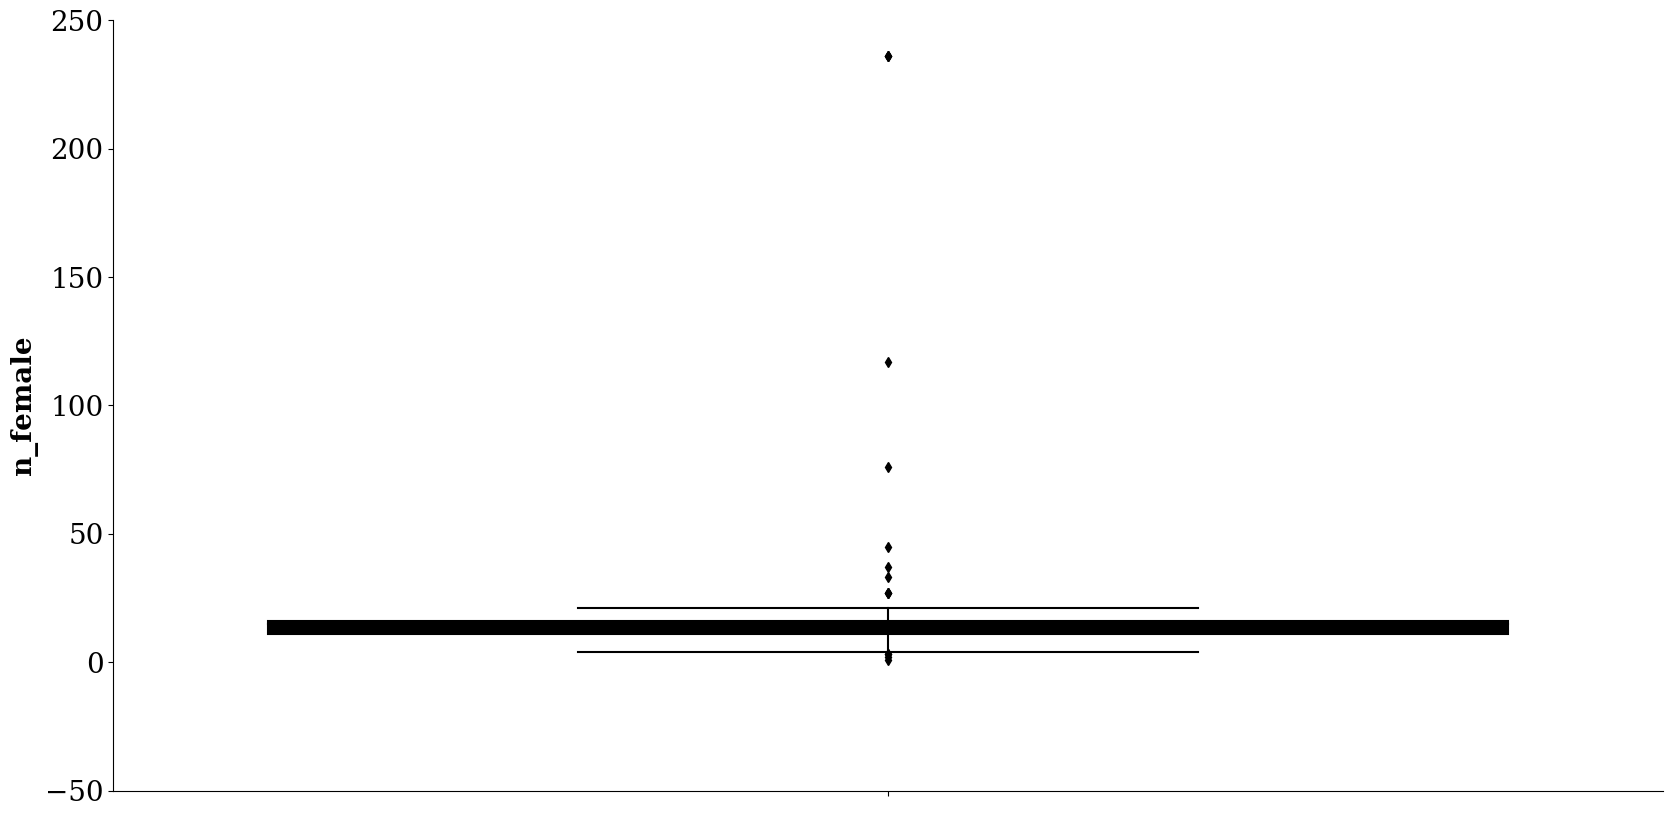

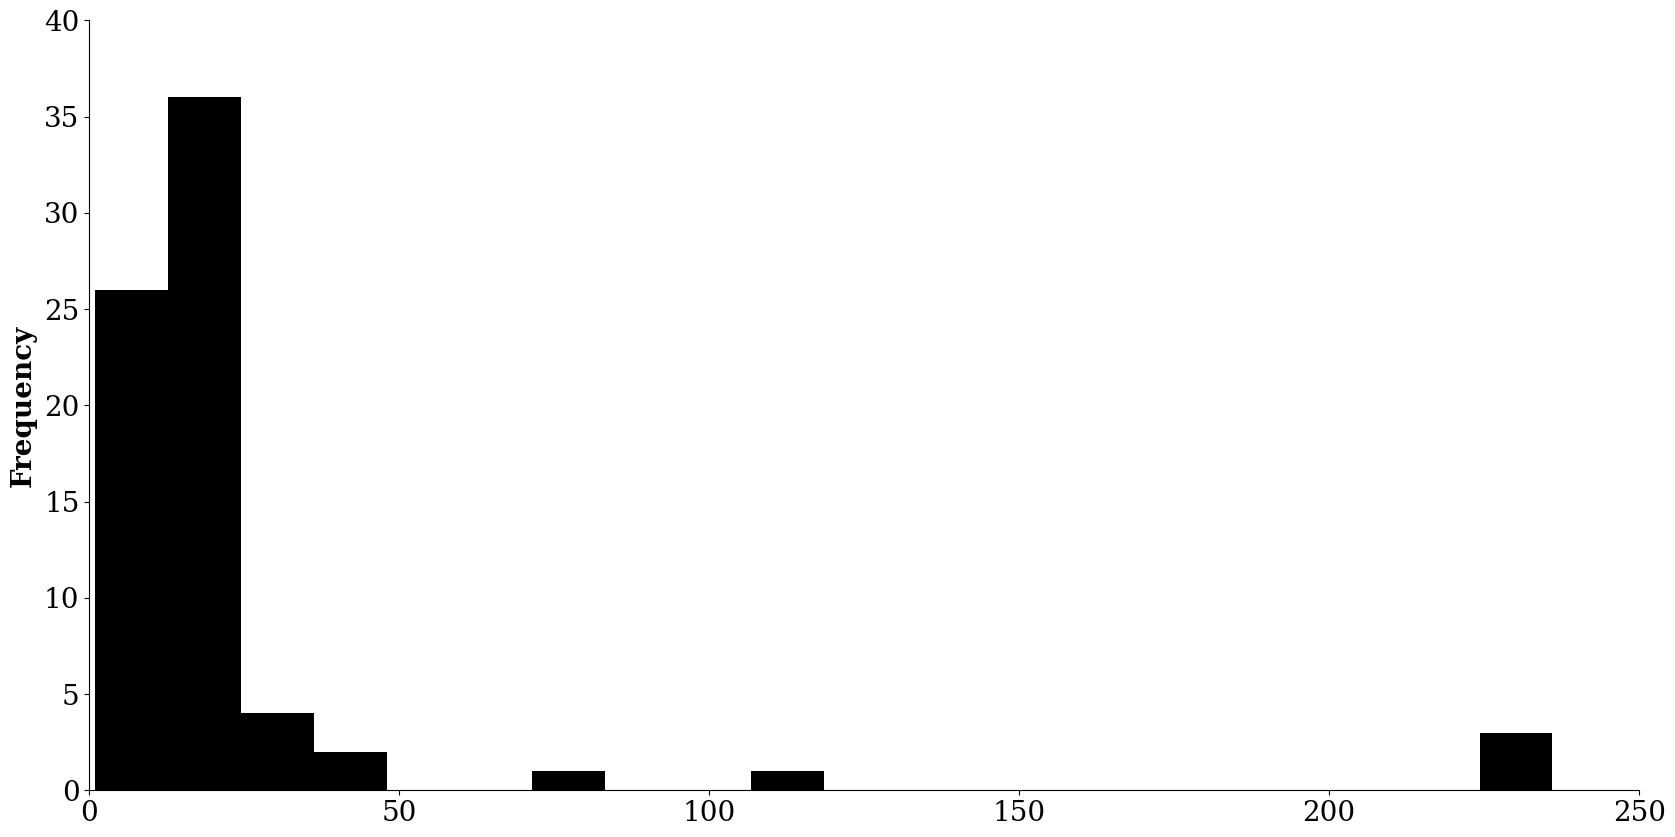

In [125]:
participants_female["n_female"] = participants_female["n_female"].astype(int)
print(participants_female['n_female'].mean())
g = sns.boxplot(y="n_female", data=participants_female)
plt.show()
participants_female['n_female'].plot(bins = 20,kind ='hist', xlim = [0,250])
plt.show()

In [126]:
df_p_range_age = df_participants.groupby(['paper_id', 'range_age']).nth(0)
df_p_range_age.reset_index(inplace =  True)



In [127]:
df_p_range_age['range_age'].unique()


array(['-', '19-37', '19-40', '18-22', '1-3', '21-30', '20-40', '19-30',
       '21-39', '21-25', '21-59', '23-36', '25-35', '19-25', '23-57',
       '22-45', '20-35', '21-24', '20-50', '25-28', '25-65', '21-38',
       '23-44', '20-25', '24-34', '19-24', '20-34', '17-60', '18-29',
       '22-32', '18-28', '20-26', '20-36', '18-45', '21-28', '20-23'],
      dtype=object)

In [128]:
df_p_range_age_no_cero= df_p_range_age[df_p_range_age['range_age'] != '-']

In [129]:
df_p_range_age_no_cero

paper_id range_age  model_id  \
2           3     19-37         3   
3           4     19-40         5   
4           5     18-22        10   
5           6       1-3        12   
8           9     21-30        43   
9          10     19-40        44   
10         11     20-40        45   
11         12     19-30        47   
14         15     21-39        67   
15         16     19-40        93   
16         17     21-25        95   
18         19     21-59       129   
19         20     19-40       130   
21         22     23-36       144   
22         23     19-37       147   
23         24     25-35       149   
24         25     23-36       151   
25         26     18-22       154   
34         35     19-40       195   
35         36     19-25       199   
37         37     19-37       207   
38         37     19-40       228   
39         37     23-57       214   
40         38     19-37       242   
44         42     22-45       259   
45         43     20-35       261   
46         44     21-24       262   
47         45     20-50       263   
48         46     25-28       268   
49         47     25-65       269   
50         48     21-38       270   
53         51     23-44       277   
54         52     20-25       278   
57         55     24-34       287   
60         57     19-24       296   
62         59     19-40       303   
63         60     19-37       309   
64         60     19-40       319   
65         61     20-34       329   
67         63     19-37       340   
70         66     19-37       345   
72         68     17-60       358   
73         69     19-40       359   
74         70     19-37       360   
79         75     18-29       384   
80         76     22-32       417   
81         77     18-28       419   
83         79     19-25       422   
85         81     20-26       430   
87         83     20-36       440   
88         84     18-45       452   
90         86     19-37       460   
91         87     21-28       462   
92         88     21-38       463   
93         89     20-23       464   
101        97     19-37       492   

                                          apa_citation    N n_female mean_age  \
2    Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...   32       16     26.9   
3    Ali, M., Machot, F. A., Mosa, A. H., Jdeed, M....   27       16    26.06   
4    Wei, J., Chen, T., Liu, G., & Yang, J. (2016)....   27       27    19.44   
5    Feng, H., Golshan, H. M., & Mahoor, M. H. (201...  121        -        -   
8    Amalan, S., Shyam, A., Anusha, A. S., Preejith...   30        9        -   
9    Machot, F. A., Ali, M., Ranasinghe, S., Mosa, ...   27       16    26.06   
10   Girardi, D., Lanubile, F., & Novielli, N. (201...   19        3        -   
11   Ooi, J. S. K., Ahmad, S. A., Ishak, A. J., Min...   20        -    22.83   
14   Md Ali, S. H., Ibne Reaz, M., Ahmad, S. A., Mi...   25        -    23.92   
15   Wiem, M. B. H., & Lachiri, Z. (2017). Emotion ...   27       16    26.06   
16   Goshvarpour, A., Abbasi, A., Goshvarpour, A., ...   35       14        -   
18   Hernández-García, A., Fernández-Martínez, F., ...   22       12        -   
19   Wiem, M. B. H., & Lachiri, Z. (2017). Emotion ...   27       16    26.06   
21   Nisa’Minhad, K., Ali, S. H. M., Khai, J. O. S....   19        -        -   
22   Ayata, D., Yaslan, Y., & Kamasak, M. (2017). E...   32       16     26.9   
23   Greco, A., Valenza, G., Citi, L., & Scilingo, ...   25        -        -   
24   Minhad, K. N., Ali, S. H. M. D., & Reaz, M. B....   23       15        -   
25   Zhang, Q., Lai, X., & Liu, G. (2016). Emotion ...   35        -        -   
34   Ferdinando, H., & Alasaarela, E. (2018). Emoti...   27       16    26.06   
35   Zhang, S., Liu, G., & Lai, X. (2015). Classifi...  255      117     22.1   
37   Gjoreski, M., Luštrek, M., Gams, M., & Mitrevs...   32       16     26.9   
38   Gjoreski, M., Luštrek, M., Gams, M., & Mitrevs...   27       16    26.06   
39   Gjoreski, M., Luštrek, M., 

In [130]:
df_p_range_age_no_cero["range_age"].value_counts()

19-37    10
19-40     9
18-22     2
19-25     2
21-38     2
23-36     2
17-60     1
20-25     1
24-34     1
19-24     1
20-34     1
18-29     1
22-32     1
18-28     1
20-26     1
20-36     1
18-45     1
21-28     1
23-44     1
20-50     1
25-65     1
25-28     1
21-24     1
20-35     1
22-45     1
23-57     1
25-35     1
21-59     1
21-25     1
21-39     1
19-30     1
20-40     1
21-30     1
1-3       1
20-23     1
Name: range_age, dtype: int64

In [131]:
df_p_range_age_cero_na= df_p_range_age[df_p_range_age['range_age'] == '-']
df_p_range_age_cero_na
#48

paper_id range_age  model_id  \
0           1         -         1   
1           2         -         2   
6           7         -        20   
7           8         -        40   
12         13         -        51   
13         14         -        52   
17         18         -       127   
20         21         -       132   
26         27         -       155   
27         28         -       158   
28         29         -       167   
29         30         -       173   
30         31         -       176   
31         32         -       179   
32         33         -       185   
33         34         -       191   
36         37         -       221   
41         39         -       250   
42         40         -       251   
43         41         -       255   
51         49         -       275   
52         50         -       276   
55         53         -       279   
56         54         -       284   
58         56         -       292   
59         57         -       294   
61         58         -       302   
66         62         -       332   
68         64         -       343   
69         65         -       344   
71         67         -       357   
75         71         -       366   
76         72         -       368   
77         73         -       373   
78         74         -       376   
82         78         -       421   
84         80         -       426   
86         82         -       438   
89         85         -       454   
94         90         -       468   
95         91         -       470   
96         92         -       476   
97         93         -       477   
98         94         -       479   
99         95         -       481   
100        96         -       491   
102        98         -       494   
103        99         -       498   

                                          apa_citation    N n_female mean_age  \
0    Zangróniz, R., Martínez-Rodrigo, A., Pastor, J...   45       20        -   
1    Liu, M., Fan, D., Zhang, X., & Gong, X. (2017)...    -        -        -   
6    Schmidt, P., Reiss, A., Duerichen, R., & Van L...   15        3     27.5   
7    Dobbins, C., Fairclough, S., Lisboa, P., & Nav...    6        -        -   
12   Setyohadi, D. B., Kusrohmaniah, S., Gunawan, S...   39        -        -   
13   Soleymani, M., & Mortillaro, M. (2018). Behavi...   52       33     25.7   
17   Keren, G., Kirschstein, T., Marchi, E., Ringev...   46       27       22   
20   Xu, Y., Hubener, I., Seipp, A.-K., Ohly, S., &...    8        -        -   
26   Goshvarpour, A., Abbasi, A., Goshvarpour, A., ...   11       11    22.73   
27   Das, P., Khasnobish, A., & Tibarewala, D. N. (...    -        -        -   
28   Gupta, R., Abadi, M. K., Cabré, J. A. C., Morr...   33       12     29.7   
29   Ooi, J. S. K., Ahmad, S. A., Chong, Y. Z., Ali...   20        4    22.83   
30   Goshvarpour, A., Abbasi, A., Goshvarpour, A., ...   11       11    22.73   
31   Siddharth,  null, Jung, T.-P., & Sejnowski, T....   40       13     28.3   
32   Goshvarpour, A., Abbasi, A., & Goshvarpour, A....   11       11    22.73   
33   Dumitriu, T., Cimpanu, C., Ungureanu, F., & Ma...   10        6        -   
36   Gjoreski, M., Luštrek, M., Gams, M., & Mitrevs...    -        -        -   
41   Martínez-Rodrigo, A., Zangróniz, R., Pastor, J...   21       12        -   
42   Milchevski, A., Rozza, A., & Taskovski, D. (20...    -        -        -   
43   Ringeval, F., Eyben, F., Kroupi, E., Yuce, A.,...   46       27       22   
51   Drungilas, D., Bielskis, A. A., & Denisov, V. ...    -        -        -   
52   Wu, G., Liu, G., & Hao, M. (2010). The Analysi...  254        -        -   
55   Ren, P., Barreto, A., Gao, Y., & Adjouadi, M. ...   30        -        -   
56   Cheng, J., & Liu, G. (2013). Computing nonline...    -        -       20   
58   Guo, R., Li, S., He, L., Gao, W., Qi, H., & Ow...    4        -        -   
59   Henriques, R., Paiva, A., & Antunes, C. (2013)...   13        5        -   
61  

In [132]:
df_p_mean_age = df_participants.groupby(['paper_id', 'mean_age']).nth(0)
df_p_mean_age.reset_index(inplace =  True)

In [133]:
df_p_mean_with_age= df_p_mean_age[df_p_mean_age['mean_age'] != '-']
df_p_mean_with_age

paper_id mean_age  model_id  \
2           3     26.9         3   
3           4    26.06         5   
4           5    19.44        10   
6           7     27.5        20   
9          10    26.06        44   
..        ...      ...       ...   
100        93     28.3       478   
102        95     28.3       481   
103        96       20       491   
104        97     26.9       492   
105        98       30       494   

                                          apa_citation   N n_female  \
2    Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...  32       16   
3    Ali, M., Machot, F. A., Mosa, A. H., Jdeed, M....  27       16   
4    Wei, J., Chen, T., Liu, G., & Yang, J. (2016)....  27       27   
6    Schmidt, P., Reiss, A., Duerichen, R., & Van L...  15        3   
9    Machot, F. A., Ali, M., Ranasinghe, S., Mosa, ...  27       16   
..                                                 ...  ..      ...   
100  Rahim, A., Sagheer, A., Nadeem, K., Dar, M. N....  40       13   
102  Yang, H. C., & Lee, C. C. (2019, September). A...  40       13   
103  Kołodziej, M., Tarnowski, P., Majkowski, A., &...  22        -   
104  Ganapathy, N., & Swaminathan, R. (2019). Emoti...  32       16   
105  Subramanian, R., Wache, J., Abadi, M. K., Vier...  58       21   

    meadian_age range_age  country  
2             -     19-37        -  
3             -     19-40        -  
4             -     18-22        -  
6             -         -  Germany  
9             -     19-40        -  
..          ...       ...      ...  
100           -         -        -  
102           -         -        -  
103           -         -   Poland  
104           -     19-37        -  
105           -         -        -  

[63 rows x 9 columns]

In [134]:
df_p_mean_with_no_age= df_p_mean_age[df_p_mean_age['mean_age'] == '-']
df_p_mean_with_no_age
#44

paper_id mean_age  model_id  \
0           1        -         1   
1           2        -         2   
5           6        -        12   
7           8        -        40   
8           9        -        43   
10         11        -        45   
12         13        -        51   
16         17        -        95   
18         19        -       129   
20         21        -       132   
21         22        -       144   
23         24        -       149   
24         25        -       151   
25         26        -       154   
27         28        -       158   
33         34        -       191   
36         37        -       221   
43         39        -       250   
44         40        -       251   
48         44        -       262   
50         46        -       268   
51         47        -       269   
53         49        -       275   
54         50        -       276   
55         51        -       277   
56         52        -       278   
57         53        -       279   
60         56        -       292   
61         57        -       294   
63         58        -       302   
68         62        -       332   
71         65        -       344   
78         72        -       368   
85         79        -       422   
86         80        -       426   
87         81        -       430   
89         83        -       440   
91         85        -       454   
93         87        -       462   
96         90        -       468   
97         91        -       470   
99         93        -       477   
101        94        -       479   
106        99        -       498   

                                          apa_citation    N n_female  \
0    Zangróniz, R., Martínez-Rodrigo, A., Pastor, J...   45       20   
1    Liu, M., Fan, D., Zhang, X., & Gong, X. (2017)...    -        -   
5    Feng, H., Golshan, H. M., & Mahoor, M. H. (201...  121        -   
7    Dobbins, C., Fairclough, S., Lisboa, P., & Nav...    6        -   
8    Amalan, S., Shyam, A., Anusha, A. S., Preejith...   30        9   
10   Girardi, D., Lanubile, F., & Novielli, N. (201...   19        3   
12   Setyohadi, D. B., Kusrohmaniah, S., Gunawan, S...   39        -   
16   Goshvarpour, A., Abbasi, A., Goshvarpour, A., ...   35       14   
18   Hernández-García, A., Fernández-Martínez, F., ...   22       12   
20   Xu, Y., Hubener, I., Seipp, A.-K., Ohly, S., &...    8        -   
21   Nisa’Minhad, K., Ali, S. H. M., Khai, J. O. S....   19        -   
23   Greco, A., Valenza, G., Citi, L., & Scilingo, ...   25        -   
24   Minhad, K. N., Ali, S. H. M. D., & Reaz, M. B....   23       15   
25   Zhang, Q., Lai, X., & Liu, G. (2016). Emotion ...   35        -   
27   Das, P., Khasnobish, A., & Tibarewala, D. N. (...    -        -   
33   Dumitriu, T., Cimpanu, C., Ungureanu, F., & Ma...   10        6   
36   Gjoreski, M., Luštrek, M., Gams, M., & Mitrevs...    -        -   
43   Martínez-Rodrigo, A., Zangróniz, R., Pastor, J...   21       12   
44   Milchevski, A., Rozza, A., & Taskovski, D. (20...    -        -   
48   Lanatà, A., Valenza, G., & Scilingo, E. P. (20...   35        -   
50   GOUIZI, K., BEREKSI REGUIG, F., & MAAOUI, C. (...    4        2   
51   Bornoiu, I.-V., Strungaru, R., & Grigore, O. (...    -        -   
53   Drungilas, D., Bielskis, A. A., & Denisov, V. ...    -        -   
54   Wu, G., Liu, G., & Hao, M. (2010). The Analysi...  254        -   
55   Giakoumis, D., Tzovaras, D., Moustakas, K., & ...   19        4   
56   Safta, I., Grigore, O., & Căruntu, C.(2011). E...   13        -   
57   Ren, P., Barreto, A., Gao, Y., & Adjouadi, M. ...   30        -   
60   Guo, R., Li, S., He, L., Gao, W., Qi, H., & Ow...    4        -   
61   Henriques, R., Paiva, A., & Antunes, C. (2013)...   13        5   
63   Li, S., Guo, R., He, L., Gao, W., Qi, H., & Ow...    4        -   
68   Martinez, R., Salazar-Ramirez, A., Arruti, A.,...   32        -   
71   Greco, A., Marzi, C., Lanata, A., Scilingo, E....   18       12   
78   Gol

25.812857142857144
19.44
36.1


C:\Users\someo\AppData\Local\Temp\ipykernel_8148\177897996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p_mean_with_age["mean_age"] = df_p_mean_with_age["mean_age"].astype(float)


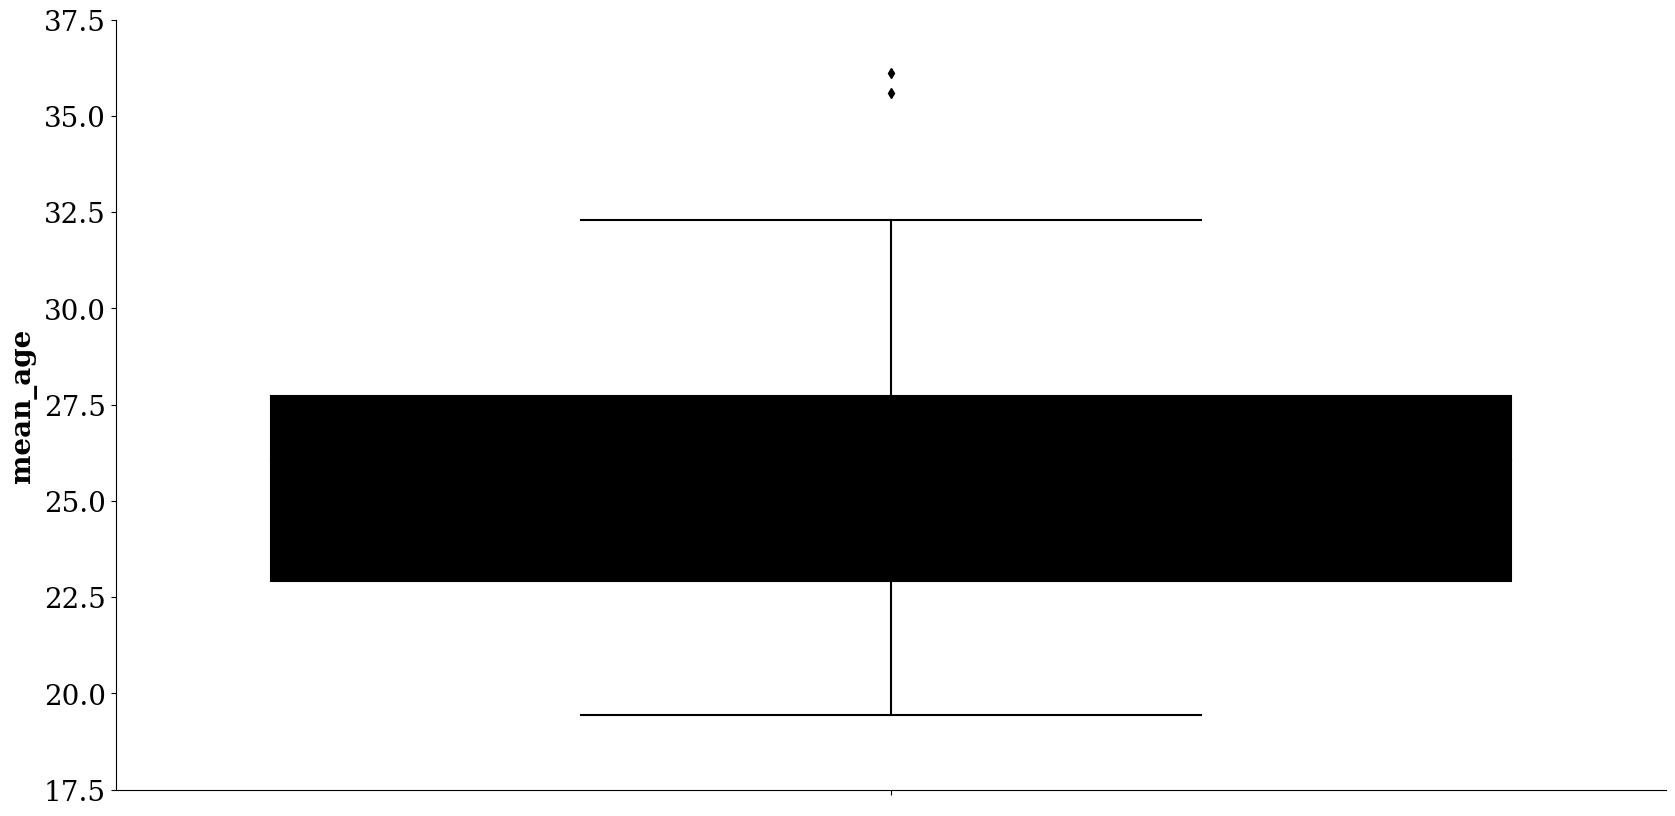

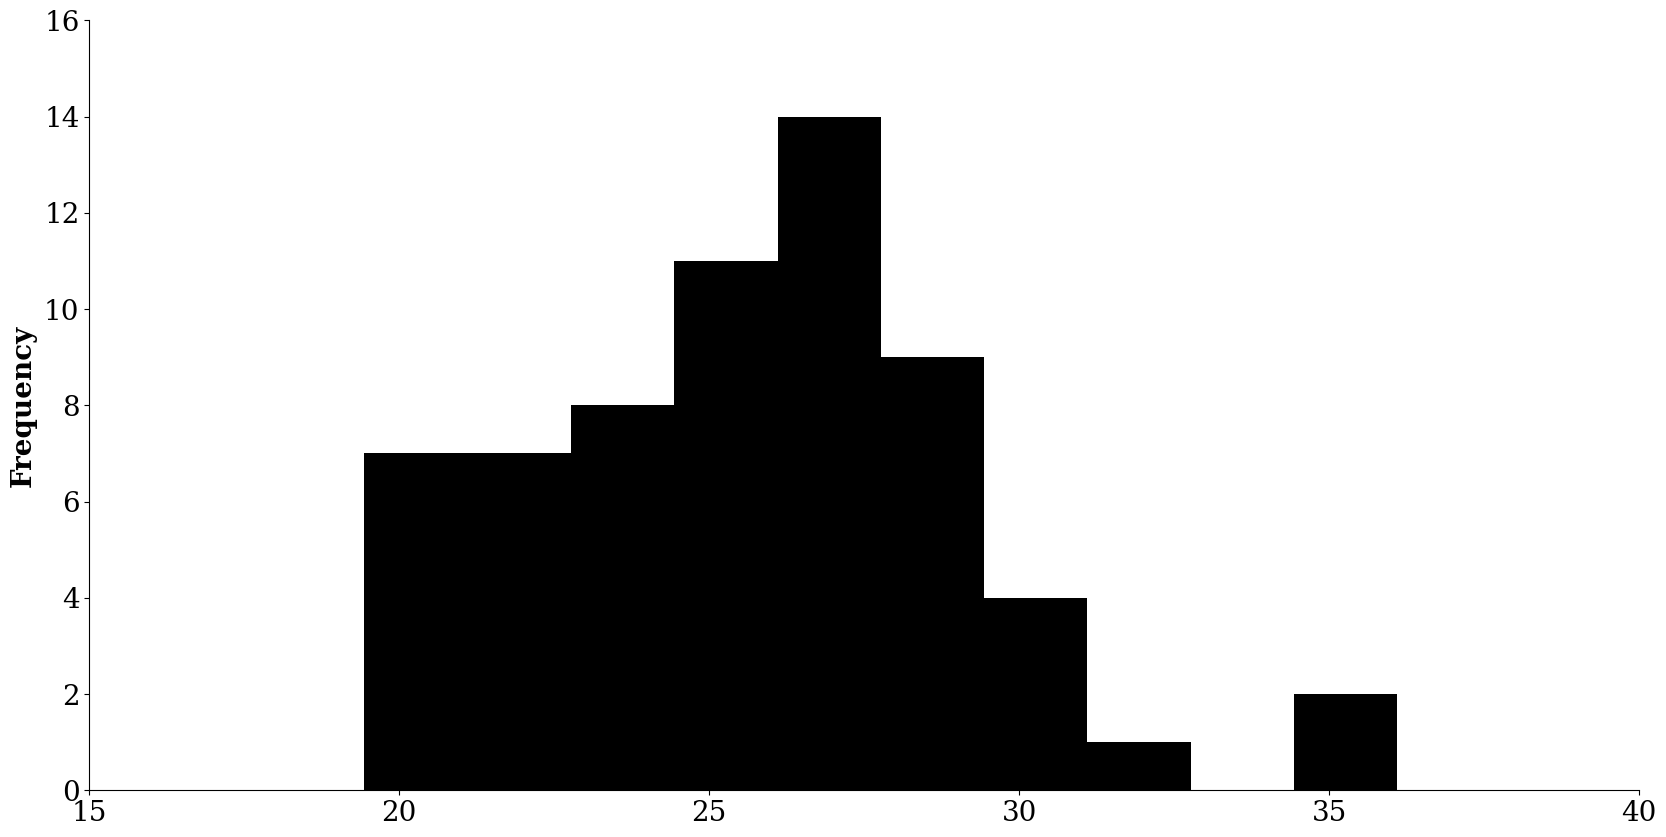

In [135]:
df_p_mean_with_age["mean_age"] = df_p_mean_with_age["mean_age"].astype(float)
print(df_p_mean_with_age['mean_age'].mean())
print(df_p_mean_with_age['mean_age'].min())
print(df_p_mean_with_age['mean_age'].max())
g = sns.boxplot(y="mean_age", data=df_p_mean_with_age)
plt.show()
df_p_mean_with_age['mean_age'].plot(bins = 10,kind ='hist', xlim = [15,40])
plt.show()

In [136]:
df_participants.loc[df_participants['range_age'] == "-", 'range_age'] = "0"


In [137]:
range_age = df_p_range_age[df_p_range_age['range_age'] != '-']
range_age

paper_id range_age  model_id  \
2           3     19-37         3   
3           4     19-40         5   
4           5     18-22        10   
5           6       1-3        12   
8           9     21-30        43   
9          10     19-40        44   
10         11     20-40        45   
11         12     19-30        47   
14         15     21-39        67   
15         16     19-40        93   
16         17     21-25        95   
18         19     21-59       129   
19         20     19-40       130   
21         22     23-36       144   
22         23     19-37       147   
23         24     25-35       149   
24         25     23-36       151   
25         26     18-22       154   
34         35     19-40       195   
35         36     19-25       199   
37         37     19-37       207   
38         37     19-40       228   
39         37     23-57       214   
40         38     19-37       242   
44         42     22-45       259   
45         43     20-35       261   
46         44     21-24       262   
47         45     20-50       263   
48         46     25-28       268   
49         47     25-65       269   
50         48     21-38       270   
53         51     23-44       277   
54         52     20-25       278   
57         55     24-34       287   
60         57     19-24       296   
62         59     19-40       303   
63         60     19-37       309   
64         60     19-40       319   
65         61     20-34       329   
67         63     19-37       340   
70         66     19-37       345   
72         68     17-60       358   
73         69     19-40       359   
74         70     19-37       360   
79         75     18-29       384   
80         76     22-32       417   
81         77     18-28       419   
83         79     19-25       422   
85         81     20-26       430   
87         83     20-36       440   
88         84     18-45       452   
90         86     19-37       460   
91         87     21-28       462   
92         88     21-38       463   
93         89     20-23       464   
101        97     19-37       492   

                                          apa_citation    N n_female mean_age  \
2    Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...   32       16     26.9   
3    Ali, M., Machot, F. A., Mosa, A. H., Jdeed, M....   27       16    26.06   
4    Wei, J., Chen, T., Liu, G., & Yang, J. (2016)....   27       27    19.44   
5    Feng, H., Golshan, H. M., & Mahoor, M. H. (201...  121        -        -   
8    Amalan, S., Shyam, A., Anusha, A. S., Preejith...   30        9        -   
9    Machot, F. A., Ali, M., Ranasinghe, S., Mosa, ...   27       16    26.06   
10   Girardi, D., Lanubile, F., & Novielli, N. (201...   19        3        -   
11   Ooi, J. S. K., Ahmad, S. A., Ishak, A. J., Min...   20        -    22.83   
14   Md Ali, S. H., Ibne Reaz, M., Ahmad, S. A., Mi...   25        -    23.92   
15   Wiem, M. B. H., & Lachiri, Z. (2017). Emotion ...   27       16    26.06   
16   Goshvarpour, A., Abbasi, A., Goshvarpour, A., ...   35       14        -   
18   Hernández-García, A., Fernández-Martínez, F., ...   22       12        -   
19   Wiem, M. B. H., & Lachiri, Z. (2017). Emotion ...   27       16    26.06   
21   Nisa’Minhad, K., Ali, S. H. M., Khai, J. O. S....   19        -        -   
22   Ayata, D., Yaslan, Y., & Kamasak, M. (2017). E...   32       16     26.9   
23   Greco, A., Valenza, G., Citi, L., & Scilingo, ...   25        -        -   
24   Minhad, K. N., Ali, S. H. M. D., & Reaz, M. B....   23       15        -   
25   Zhang, Q., Lai, X., & Liu, G. (2016). Emotion ...   35        -        -   
34   Ferdinando, H., & Alasaarela, E. (2018). Emoti...   27       16    26.06   
35   Zhang, S., Liu, G., & Lai, X. (2015). Classifi...  255      117     22.1   
37   Gjoreski, M., Luštrek, M., Gams, M., & Mitrevs...   32       16     26.9   
38   Gjoreski, M., Luštrek, M., Gams, M., & Mitrevs...   27       16    26.06   
39   Gjoreski, M., Luštrek, M., 

In [138]:
range_age['range_age'] = range_age['range_age'].str.replace('-',' ')
range_age['range_age'].str.split()
df_ranges = range_age['range_age'].str.split(pat = ' ', expand = True)
df_ranges = df_ranges.dropna()
df_ranges


C:\Users\someo\AppData\Local\Temp\ipykernel_8148\2313925140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  range_age['range_age'] = range_age['range_age'].str.replace('-',' ')


0   1
2    19  37
3    19  40
4    18  22
5     1   3
8    21  30
9    19  40
10   20  40
11   19  30
14   21  39
15   19  40
16   21  25
18   21  59
19   19  40
21   23  36
22   19  37
23   25  35
24   23  36
25   18  22
34   19  40
35   19  25
37   19  37
38   19  40
39   23  57
40   19  37
44   22  45
45   20  35
46   21  24
47   20  50
48   25  28
49   25  65
50   21  38
53   23  44
54   20  25
57   24  34
60   19  24
62   19  40
63   19  37
64   19  40
65   20  34
67   19  37
70   19  37
72   17  60
73   19  40
74   19  37
79   18  29
80   22  32
81   18  28
83   19  25
85   20  26
87   20  36
88   18  45
90   19  37
91   21  28
92   21  38
93   20  23
101  19  37

In [139]:
df_ranges[0] = df_ranges[0].astype(int)
df_ranges[1] = df_ranges[1].astype(int)

In [140]:
df_ranges[0].min()

1

In [141]:
df_ranges[1].max()

65

In [142]:
first = df_ranges[0].to_list()
second = df_ranges[1].to_list()
final_list = first + second
df_range_merged = pd.DataFrame(final_list, columns = ['ages'])
df_range_merged

ages
0      19
1      19
2      18
3       1
4      21
..    ...
107    37
108    28
109    38
110    23
111    37

[112 rows x 1 columns]

In [143]:
print(df_range_merged['ages'].mean())

27.794642857142858


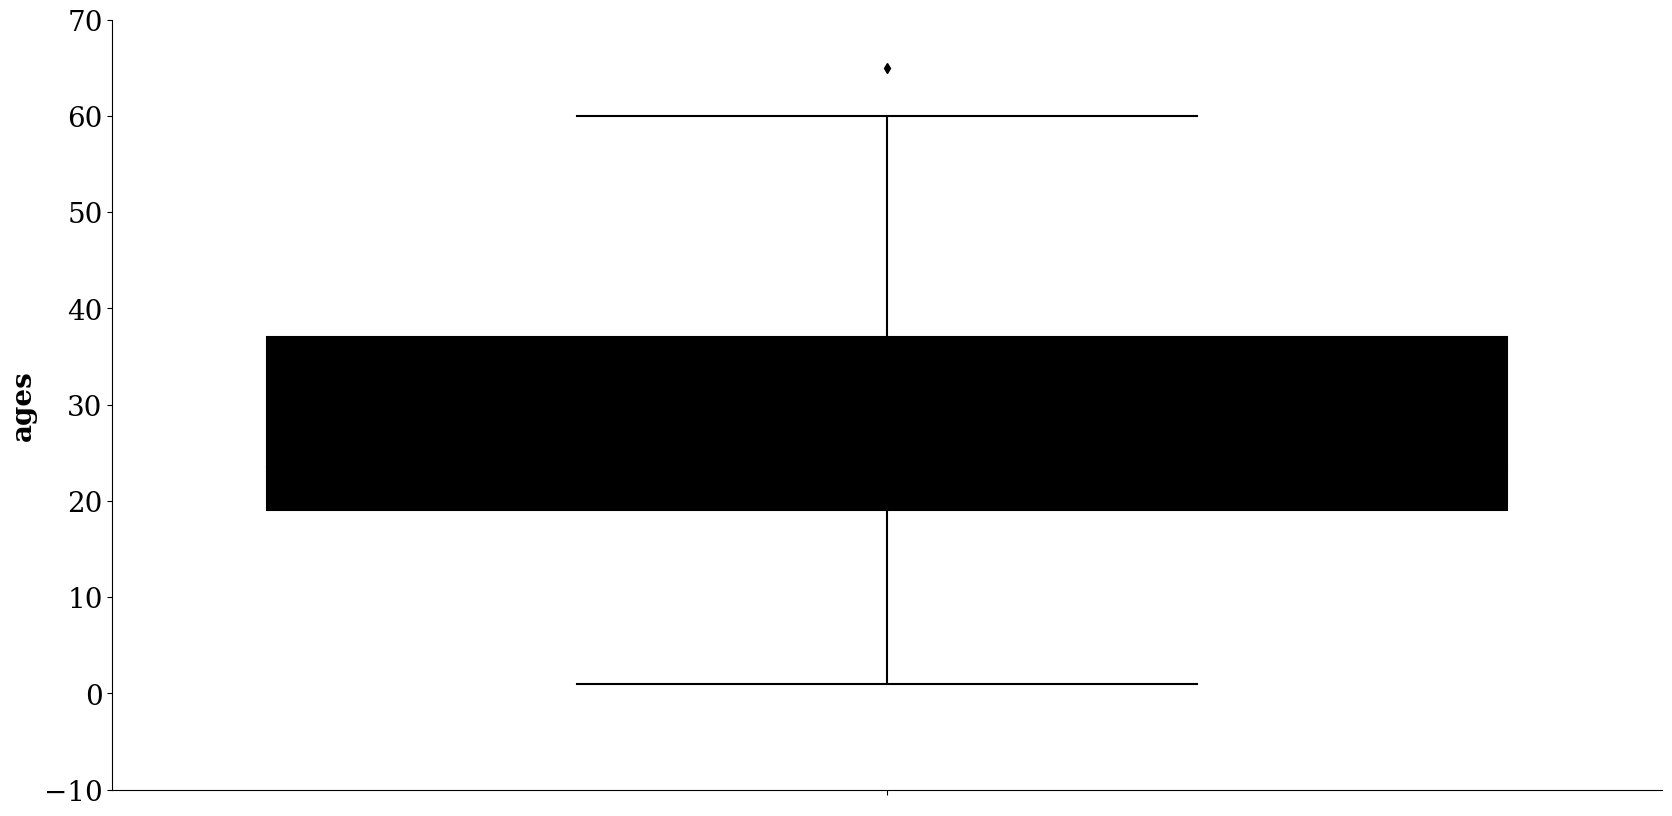

In [144]:
g = sns.boxplot(y="ages", data=df_range_merged)
plt.show()

### Plots para congreso

In [145]:
df_models = df_statistical_learning_models[["paper_id","apa_citation",'model', "year", "model_id"]]

df_models = df_models.groupby(
        ["paper_id",'model']
        ).nth(0)
df_models.reset_index(inplace=True)

In [146]:
"""df_statistical_learning_models['affective_model'] = df_statistical_learning_models['affective_model'].str.replace('categorical','categorial')"""

"df_statistical_learning_models['affective_model'] = df_statistical_learning_models['affective_model'].str.replace('categorical','categorial')"

In [147]:
models = df_statistical_learning_models[["paper_id", "year", "affective_model", "model_id"]]

models = models.groupby(
        ["paper_id",'affective_model']
        ).nth(0)
models.reset_index(inplace=True)

models["year"] = models["year"].astype(int)

In [148]:
models["affective_model"].value_counts()

dimensional    68
categorical    39
Name: affective_model, dtype: int64

In [149]:
models_crosstab = pd.crosstab(index=models['year'], columns=models['affective_model'],normalize='index')

In [150]:
"""df_models['model'] = df_models['model'].str.replace('classifier','clasificación')
df_models['model'] = df_models['model'].str.replace('regressor','regresión')"""

"df_models['model'] = df_models['model'].str.replace('classifier','clasificación')\ndf_models['model'] = df_models['model'].str.replace('regressor','regresión')"

In [151]:
n_models = df_models.groupby(
        ["paper_id",'model']
        ).nth(0)
n_models.reset_index(inplace=True)

n_models["year"] = n_models["year"].astype(int)

In [152]:
n_models_crosstab = pd.crosstab(index=n_models['year'], columns=n_models['model'],normalize='index')

C:\Users\someo\AppData\Local\Temp\ipykernel_8148\3573763391.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticklabels())
C:\Users\someo\AppData\Local\Temp\ipykernel_8148\3573763391.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax2.get_yticklabels())


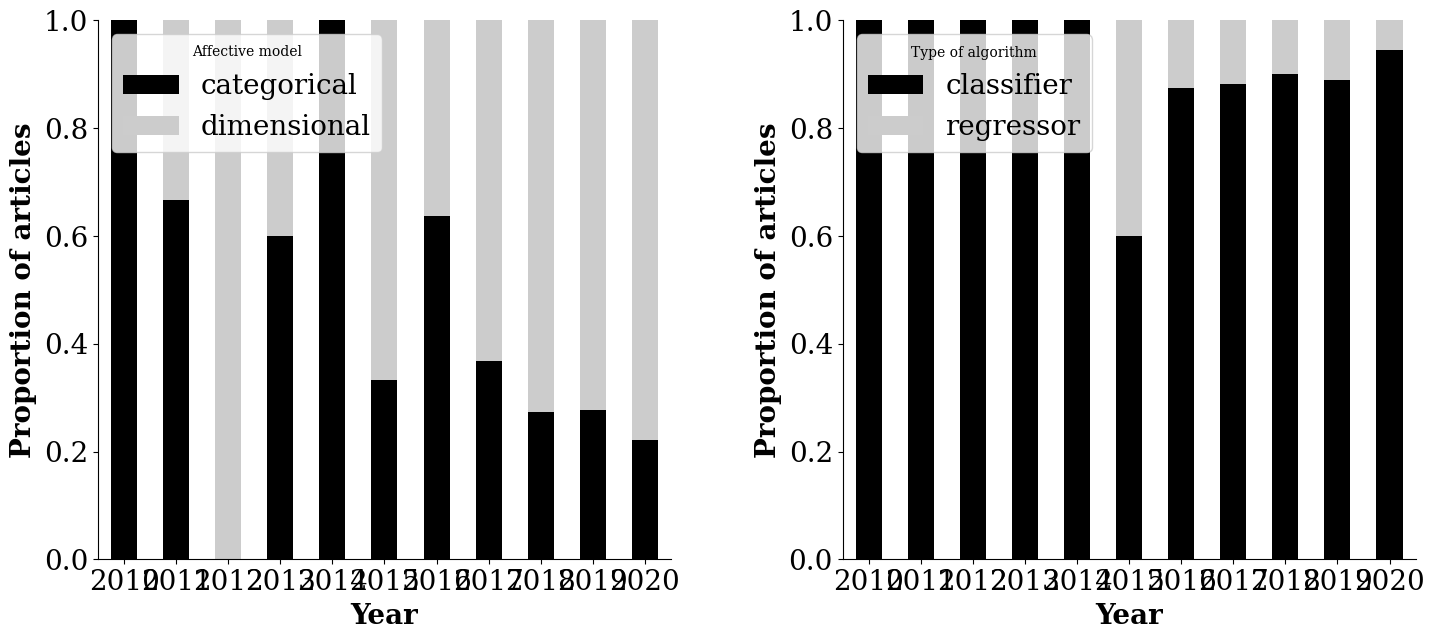

In [153]:
fig, axes = plt.subplots(1, 2)

fig.set_figheight(7)
fig.set_figwidth(17)

ax1 = models_crosstab.plot(kind='bar', 
    stacked=True,
    rot=0,
    ax=axes[0])

ax2 = n_models_crosstab.plot(kind='bar', 
    stacked=True,
    rot=0,
    ax=axes[1])

ax1.set_ylim([0, 1])
ax2.set_ylim([0, 1])

ax1.set_yticklabels(ax1.get_yticklabels())
ax2.set_yticklabels(ax2.get_yticklabels())
ax1.set_xticklabels(ax1.get_xticklabels())
ax2.set_xticklabels(ax2.get_xticklabels())

ax1.set_xlabel("Year")
ax1.set_ylabel("Proportion of articles")
ax2.set_xlabel("Year")
ax2.set_ylabel("Proportion of articles")

"""ax1.set_title("Proporción de trabajos por año (2010 - 2020) segun tipo de modelo emocional")
ax2.set_title("Proporción de trabajos por año (2010 - 2020) segun tipo de algoritmo")"""

ax1.legend(title='Affective model', loc='upper left')
ax2.legend(title='Type of algorithm', loc='upper left')

### EDA

In [154]:
df_eda = df_eda.fillna('-')
eda_devices = df_eda[df_eda['eda_device_specification']!= '-']  #me quedo solo con las rows que usaron dispositivos

¿En cuantas ocasiones no aclara el dispositivo de EDA utilizado?

In [155]:
aver = df_eda.groupby(['paper_id', 'eda_device_specification']).nth(0)
aver.reset_index(inplace= True)
len(aver[aver['eda_device_specification'] == '-'])

13

In [156]:
len(aver["eda_device_specification"])

111

In [157]:
aver["eda_device_specification"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

-                                           11.7%
Biosemi ActiveTwo                            9.0%
Biosemi activeTwo                            8.1%
Shimmer 2R                                   7.2%
MP150 BIOPAC                                 2.7%
                                            ...  
Nexus 4 Biofeedback system3                  0.9%
Bodymedia                                    0.9%
ProComp Infinity                             0.9%
MP35 Biopac                                  0.9%
(BITalino (r)evolution Plugged\r\nKit BT     0.9%
Name: eda_device_specification, Length: 62, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),
 [Text(0, 0, '-'),
  Text(1, 0, 'Biosemi ActiveTwo '),
  Text(2, 0, 'Biosemi activeTwo'),
  Text(3, 0, 'Shimmer 2R'),
  Text(4, 0, 'MP150 BIOPAC'),
  Text(5, 0, 'Empatica E4'),
  Text(6, 0, 'Shimmer'),
  Text(7, 0, 'PowerLab'),
  Text(8, 0, 'BIOPAC'),
  Text(9, 0, 'GSR-2'),
  Text(10, 0, 'BioRadio 150'),
  Text(11, 0, 'Biopac\r\nMP36'),
  Text(12, 0, 'Commercial bluetooth sensor'),
  Text(13, 0, 'Gen II integrated wearable device from Analog Devices, Inc'),
  Text(14, 0, 'Varioport'),
  Text(15, 0, 'MP150 Biopac'),
  Text(16, 0, 'Procomp5 Infiniti'),
  Text(17, 0, 'Varioport-B'),
  Text(18, 0, 'Four Affectiva Q-sensors'),
  Text(19, 0, 'BIOPAC-MP150'),
  Text(20, 0, 'Affectiva-QSensors5'),
  Text(21, 0, 'Grov

) missing from current font.ng\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 13 (
  func(*args, **kwargs)
) missing from current font.ng\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


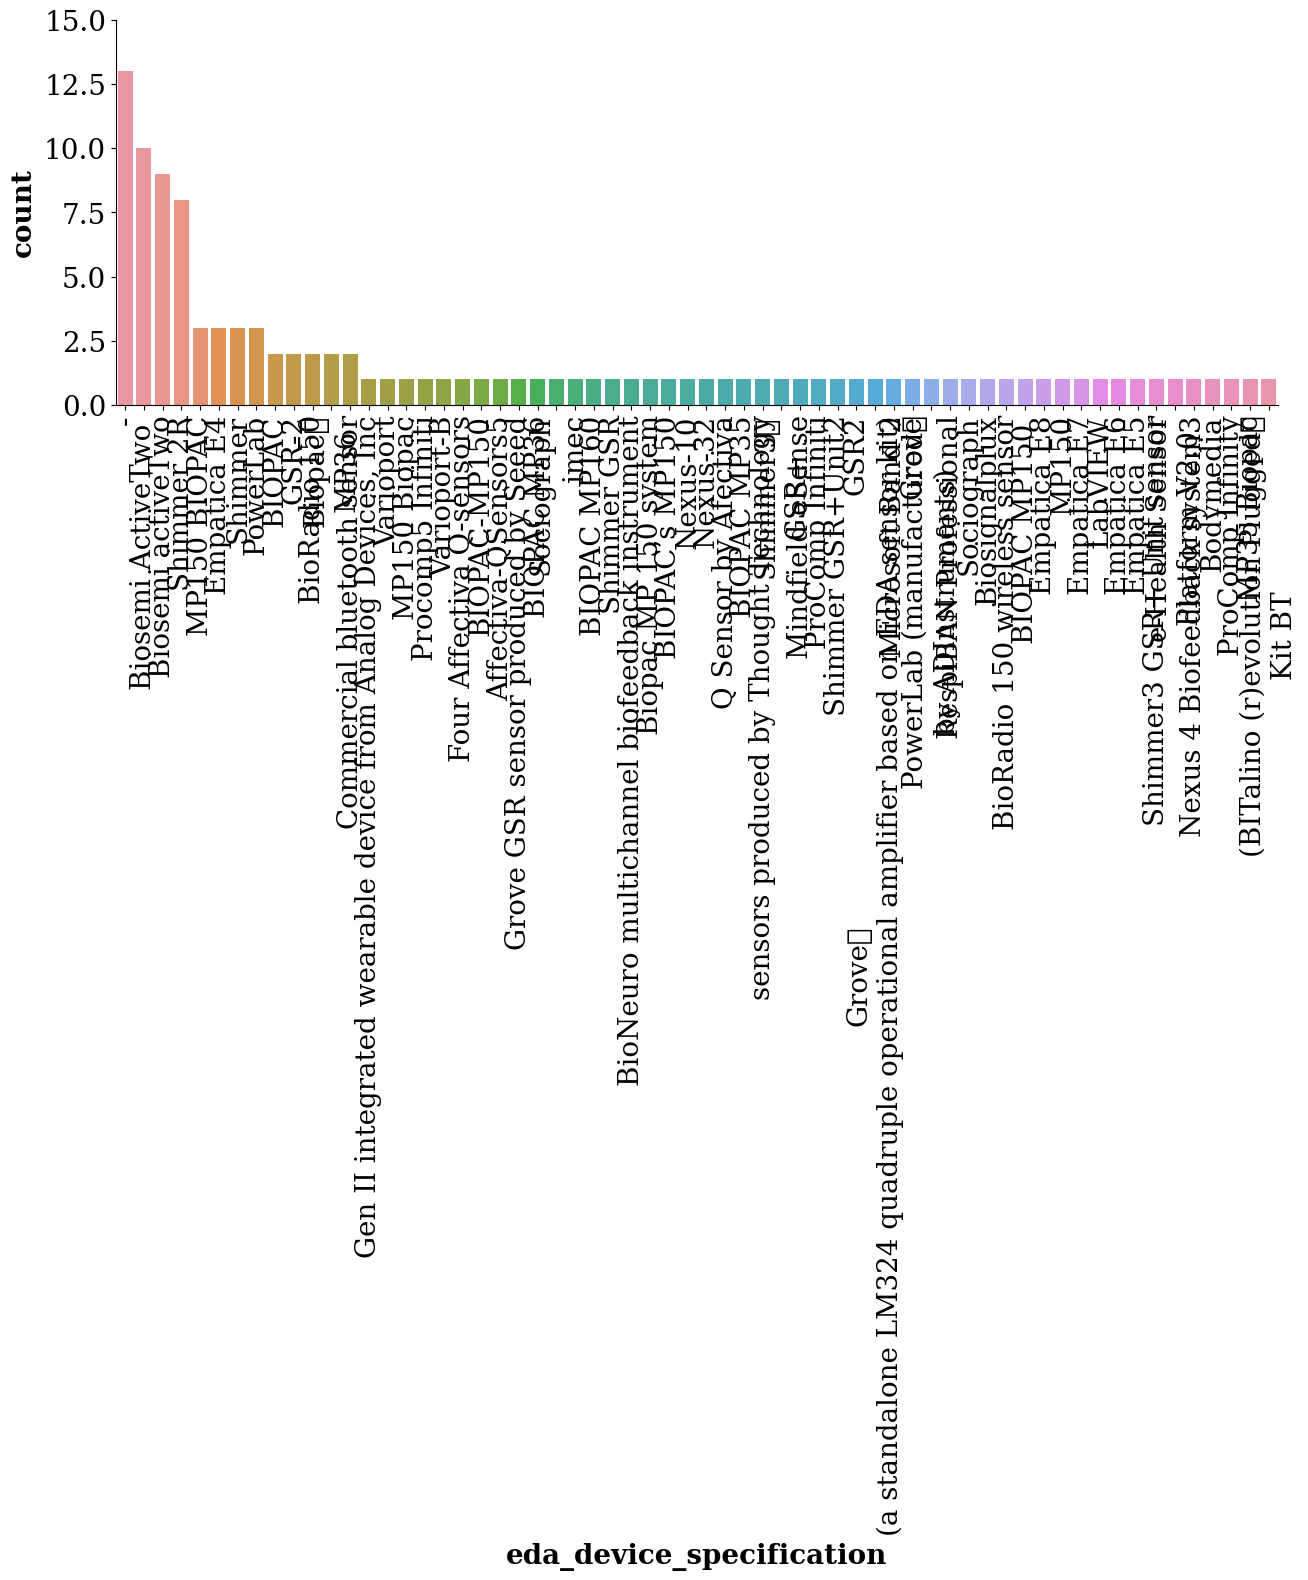

In [158]:
aver["eda_device_specification"].value_counts()
plt.figure(figsize = (15,5))
g = sns.countplot(x="eda_device_specification", data=aver, order = getattr(aver, "eda_device_specification").value_counts().index)
plt.xticks(rotation=90)

¿Cuantos eda devices HOMEMADE hay?

In [159]:
df_eda['eda_device_is_homemade'].value_counts()

-           467
No           20
x             5
homemade      5
Yes           2
Name: eda_device_is_homemade, dtype: int64

In [160]:
df_eda['eda_device_is_homemade'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

-           93.6%
No           4.0%
x            1.0%
homemade     1.0%
Yes          0.4%
Name: eda_device_is_homemade, dtype: object

In [161]:
eda_devices = eda_devices.groupby(['paper_id', 'eda_device_specification']).nth(0)
eda_devices.reset_index(inplace=True)

In [162]:
eda_devices['eda_device_specification'].value_counts()

Biosemi ActiveTwo                           10
Biosemi activeTwo                            9
Shimmer 2R                                   8
Shimmer                                      3
MP150 BIOPAC                                 3
                                            ..
LabVIEW                                      1
Shimmer3 GSR+ Unit sensor                    1
Nexus 4 Biofeedback system3                  1
Bodymedia                                    1
(BITalino (r)evolution Plugged\r\nKit BT     1
Name: eda_device_specification, Length: 61, dtype: int64

In [163]:
# REDUCIMOS LAS CATEGORÍAS AGRUPANDOLAS
main_categories = ['BIOPAC', 'Empatica','GSR2','Sociograph', 'Variport', 'Shimmer', 'BioRadio 150', 'Affectiva-QSensors5','ProComp Infinity','PowerLab', 'Grove']

def reduce_categories(list_categories):
    '''
    esta función toma una lista de categorias y reemplaza por ellas a las rows con categorías similares
    
    ej: reemplaza por BIOPAC a 'BIOPAC 150'

    '''
    for category in list_categories:
        for i in eda_devices.loc[:,'eda_device_specification']:
            if fuzz.ratio(category, i) > 45:
                eda_devices.loc[:,'eda_device_specification'] = eda_devices.loc[:,'eda_device_specification'].replace({i:category})

# Reducimos algunas categorías a partir de la funcion reduce_categories
reduce_categories(main_categories)

# Aún quedan algunas categorias sin unificar asi que unifico las restantes y resuelvo las inconsistencias por diferencias de tipeo o abreviaciones
mapping_eda = {
    'MP150 Biopac': 'BIOPAC', 'MP35 Biopac' : 'BIOPAC','MP150':'BIOPAC','Biopac\r\nMP36' : 'BIOPAC',
    'Biosemi activeTwo' : 'Biosemi ActiveTwo', 'Biosemi ActiveTwo ':'Biosemi ActiveTwo',
    'PowerLab (manufactured\r\nby ADInstruments)': 'PowerLab',
    'Affectiva-QSensors5': 'Q Sensor by Afectiva',
    'Shimmer3 GSR+ Unit sensor':'Shimmer',
    'sensors produced by Thought Technology' : 'Thought Technology',
    'Grove\r\n(a standalone LM324 quadruple operational amplifier based on EDA sensor kit)':'Grove',
    'Grove GSR sensor produced by Seeed':'Grove',
    'Gen II integrated wearable device from Analog Devices, Inc': 'Gen II Analog Devices',
    'e-Health Sensor\nPlatform V2.0' : 'e-Health Sensor Platform V2.0',
    '(BITalino (r)evolution Plugged\r\nKit BT':'(BITalino (r)evolution Plugged Kit BT ',
    'Nexus-10' : 'NEXUS', 'Nexus 4 Biofeedback system3':'NEXUS', #NO ESTOY SEGURO SI ESTO REALMENTE SON LO MISMO, O SIQUIERA SI NEXUS ES LA MARCA
    'Nexus-32' : 'NEXUS'         }


eda_devices.loc[:,'eda_device_specification'] = eda_devices.loc[:,'eda_device_specification'].replace(mapping_eda)



In [164]:
eda_devices['eda_device_specification'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Biosemi ActiveTwo                               19.4%
Shimmer                                         16.3%
BIOPAC                                          16.3%
Empatica                                         7.1%
BioRadio 150                                     4.1%
PowerLab                                         4.1%
Grove                                            3.1%
GSR2                                             3.1%
NEXUS                                            3.1%
ProComp Infinity                                 3.1%
Q Sensor by Afectiva                             3.1%
Variport                                         2.0%
Commercial bluetooth sensor                      2.0%
Sociograph                                       2.0%
Mindfield eSense                                 1.0%
BioNeuro multichannel biofeedback instrument     1.0%
Thought Technology                               1.0%
e-Health Sensor Platform V2.0                    1.0%
Bodymedia                   

In [165]:
#In percentage
#Plot
eda_devices['eda_device_specification'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Biosemi ActiveTwo                               19.4%
Shimmer                                         16.3%
BIOPAC                                          16.3%
Empatica                                         7.1%
BioRadio 150                                     4.1%
PowerLab                                         4.1%
Grove                                            3.1%
GSR2                                             3.1%
NEXUS                                            3.1%
ProComp Infinity                                 3.1%
Q Sensor by Afectiva                             3.1%
Variport                                         2.0%
Commercial bluetooth sensor                      2.0%
Sociograph                                       2.0%
Mindfield eSense                                 1.0%
BioNeuro multichannel biofeedback instrument     1.0%
Thought Technology                               1.0%
e-Health Sensor Platform V2.0                    1.0%
Bodymedia                   

¿Cuantos dipositivos de eda diferentes se utilizaron?

In [166]:
n_dispositivos_eda = eda_devices['eda_device_specification'].nunique()
print (f'Se utilizaron {n_dispositivos_eda} dispositivos de EDA diferentes')

Se utilizaron 25 dispositivos de EDA diferentes


¿En cuántas instancias de nuestro interés se especificó el dispositivo de EDA utilizado?

In [167]:
number_eda = sum(eda_devices['eda_device_specification'].value_counts())
print (f' Tenemos {number_eda} de instancias donde se aclaró el dispositivo de EDA utilizado.')

 Tenemos 98 de instancias donde se aclaró el dispositivo de EDA utilizado.


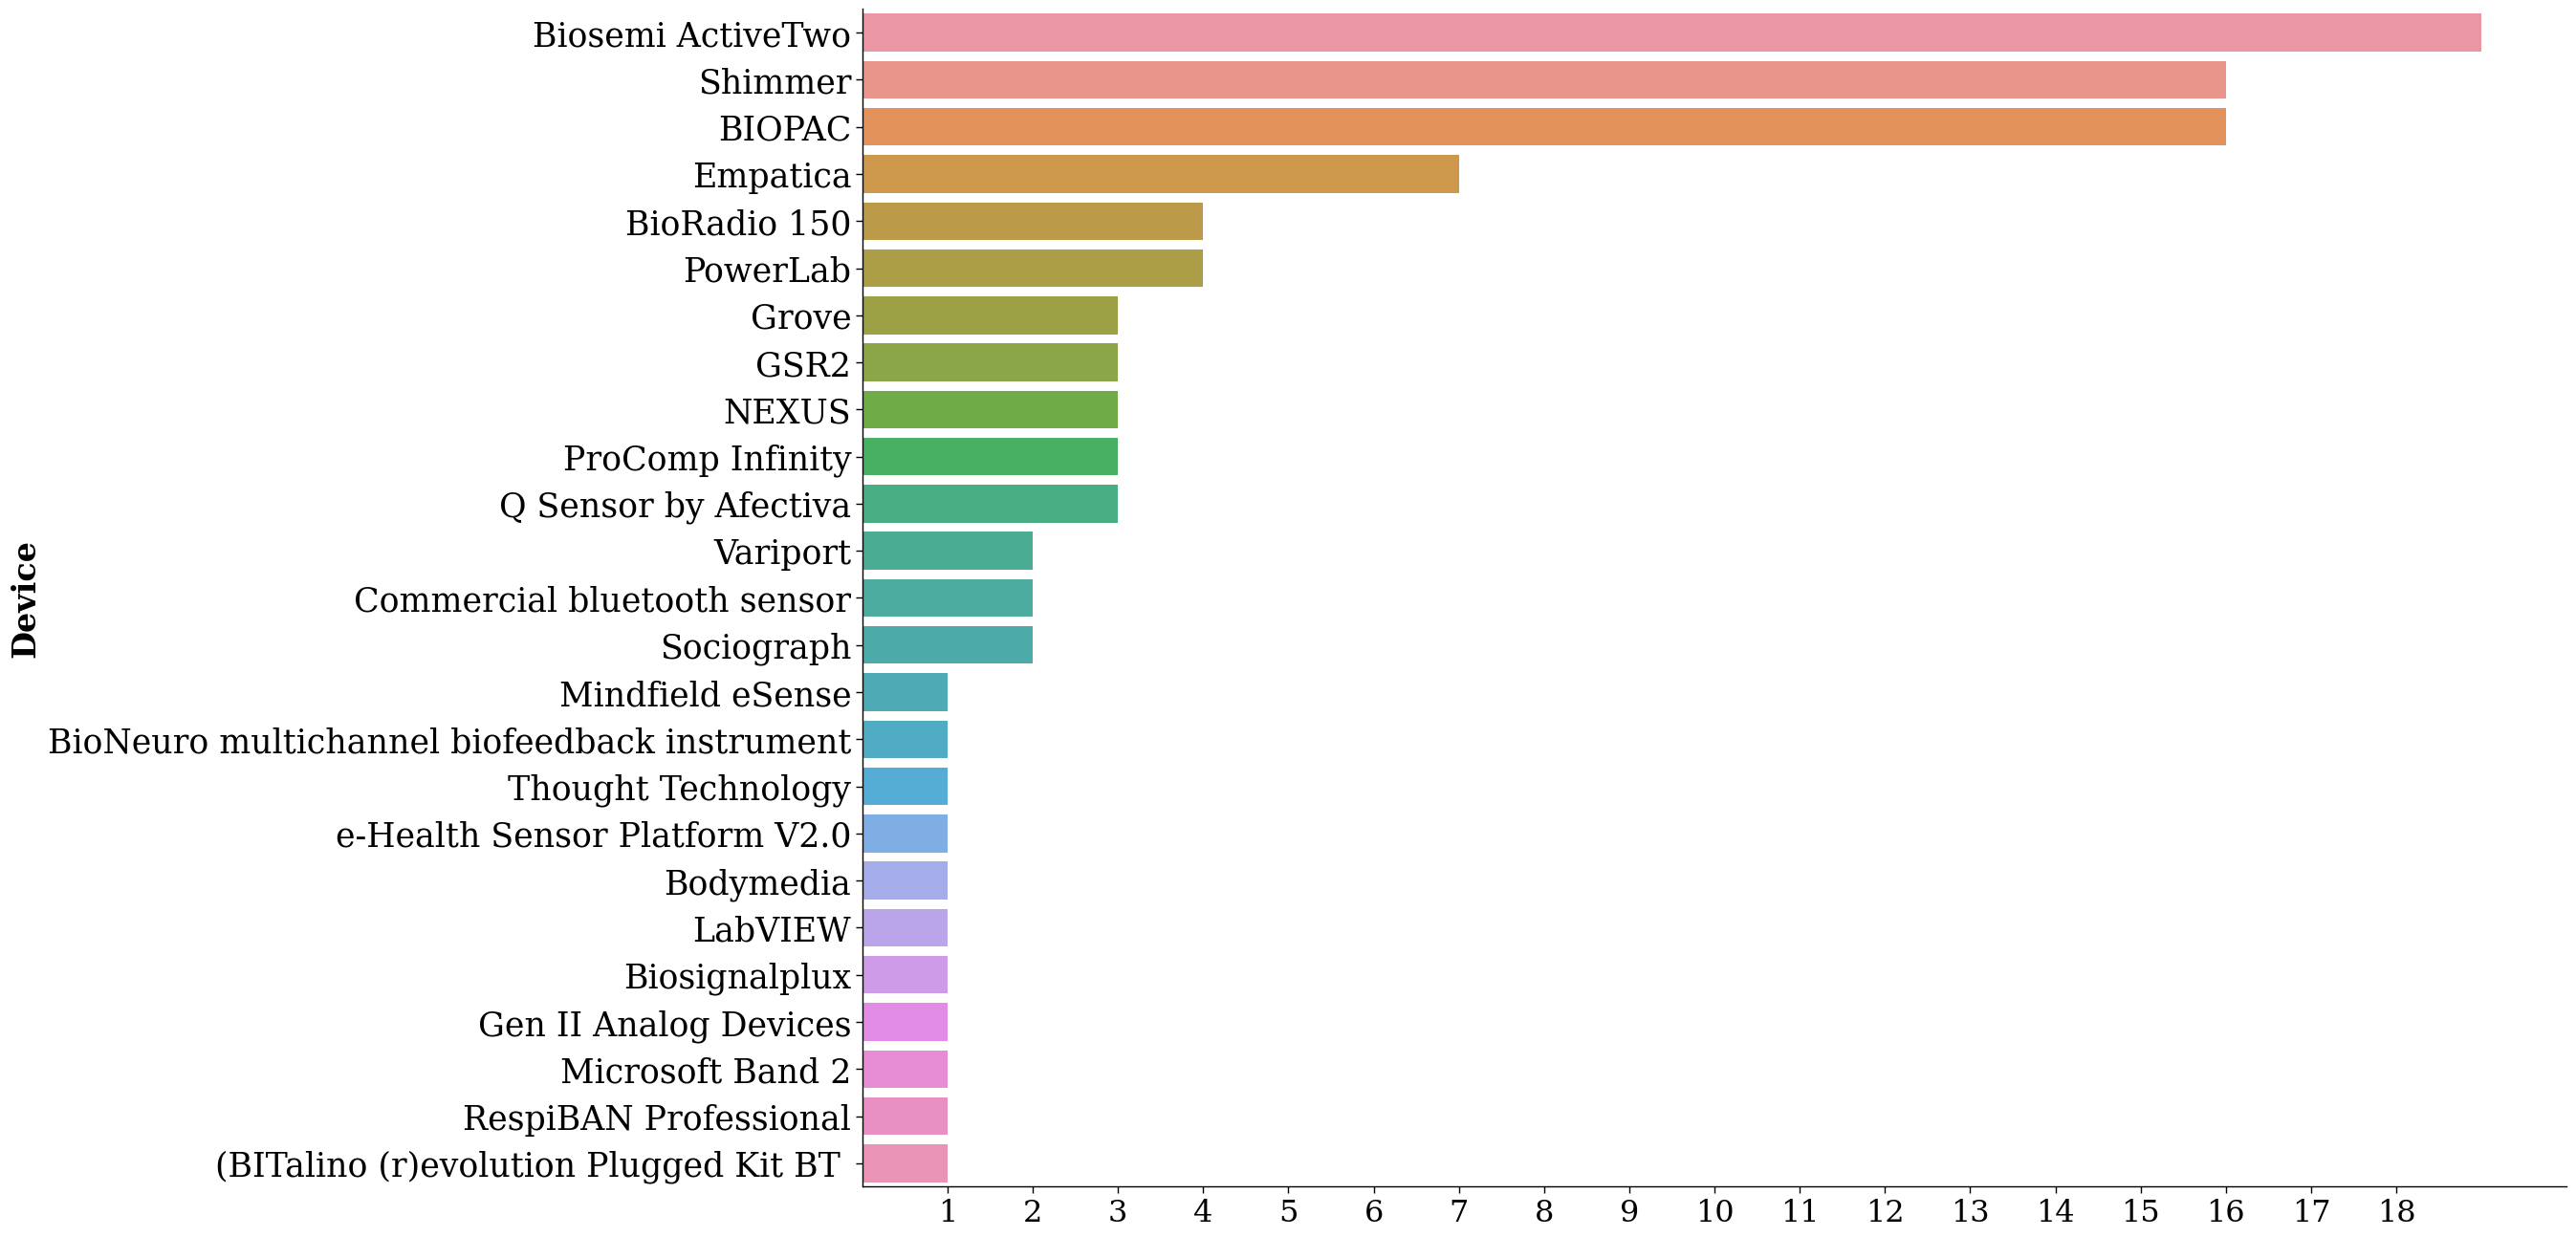

In [168]:
#Plot
from turtle import width


plt.figure(figsize = (23,16))
sns.set_context('paper')
sns.countplot(y = 'eda_device_specification',
            data = eda_devices,
            order = eda_devices['eda_device_specification'].value_counts().index)
plt.ylabel('Device',
            fontsize = 24,
            fontweight = 'bold')
plt.xlabel('')
plt.yticks(fontsize = 25)
plt.xticks(ticks = range(1,19), fontsize = 23)
plt.show()

In [169]:
#Aquellos que tenian una frecuencia de 4 o menos los agrupamos en 'Others'
mapping_others ={
        
        'Mindfield eSense': 'Others (<1)',
        'BioNeuro multichannel biofeedback instrument': 'Others (<1)',
        'Thought Technology': 'Others (<1)',
        'e-Health Sensor Platform V2.0': 'Others (<1)',
        'Bodymedia': 'Others (<1)',
        'LabVIEW': 'Others (<1)',
        'Biosignalplux': 'Others (<1)',
        'Gen II Analog Devices': 'Others (<1)',
        'Microsoft Band 2': 'Others (<1)',
        'RespiBAN Professional': 'Others (<1)',
        '(BITalino (r)evolution Plugged Kit BT ': 'Others (<1)'}

devices_with_others = eda_devices.copy()

devices_with_others.loc[:,'eda_device_specification'] = devices_with_others.loc[:,'eda_device_specification'].replace(mapping_others)
devices_with_others['eda_device_specification'].value_counts()


Biosemi ActiveTwo              19
Shimmer                        16
BIOPAC                         16
Others (<1)                    11
Empatica                        7
BioRadio 150                    4
PowerLab                        4
Q Sensor by Afectiva            3
Grove                           3
NEXUS                           3
ProComp Infinity                3
GSR2                            3
Sociograph                      2
Commercial bluetooth sensor     2
Variport                        2
Name: eda_device_specification, dtype: int64

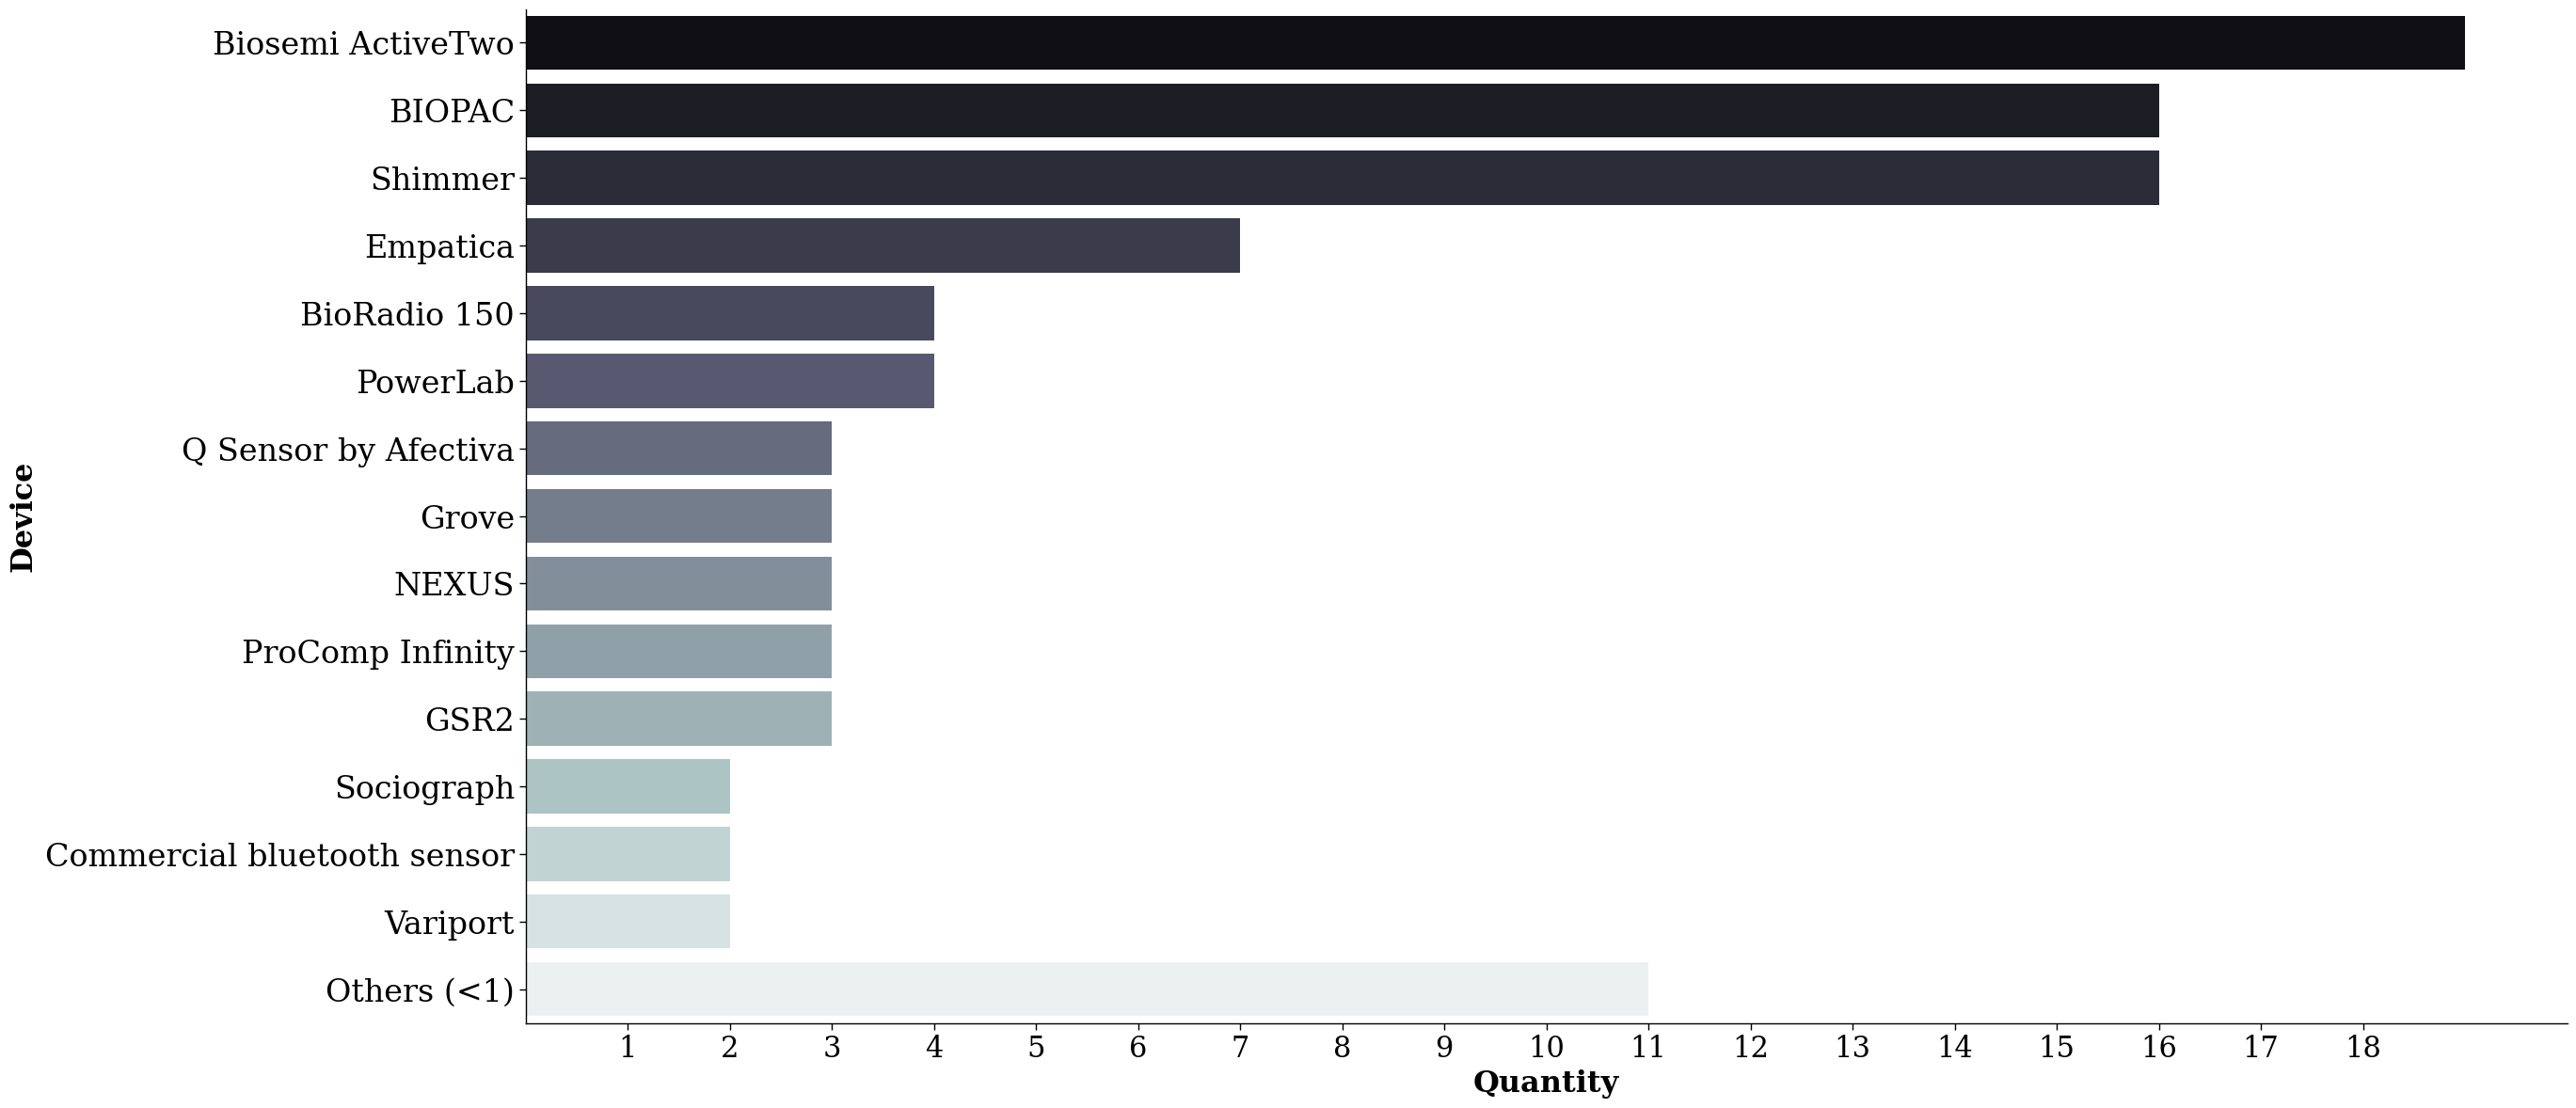

In [170]:
#Orden
plot_order = ['Biosemi ActiveTwo','BIOPAC', 'Shimmer', 'Empatica','BioRadio 150', 'PowerLab', 'Q Sensor by Afectiva' , 'Grove','NEXUS','ProComp Infinity', 'GSR2','Sociograph', 'Commercial bluetooth sensor', 'Variport', 'Others (<1)']

#Plot
plt.figure(figsize = (28,14))
sns.set_context('paper')
sns.countplot(y = 'eda_device_specification',
            data = devices_with_others,
            order = plot_order,
            palette = "bone")
plt.ylabel('Device', fontsize = 23,fontweight = 'bold')
plt.xlabel('Quantity', fontsize = 23)
plt.yticks(fontsize = 24)
plt.xticks(ticks = range(1,19), fontsize = 22)
plt.show()

In [171]:
devices_with_others["eda_device_specification"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Biosemi ActiveTwo              19.4%
Shimmer                        16.3%
BIOPAC                         16.3%
Others (<1)                    11.2%
Empatica                        7.1%
BioRadio 150                    4.1%
PowerLab                        4.1%
Q Sensor by Afectiva            3.1%
Grove                           3.1%
NEXUS                           3.1%
ProComp Infinity                3.1%
GSR2                            3.1%
Sociograph                      2.0%
Commercial bluetooth sensor     2.0%
Variport                        2.0%
Name: eda_device_specification, dtype: object

In [172]:
df_eda['location_hemibody'] = df_eda['location_hemibody'].replace({'non-dominant': 'not dominant'})

In [173]:
hemibody = df_eda.groupby(['paper_id', 'location_hemibody']).nth(0)
hemibody.reset_index(inplace=True)
hemibody['location_hemibody'].value_counts()

-               65
left            23
not dominant    10
right            3
dominant         1
Name: location_hemibody, dtype: int64

In [174]:
sum(hemibody['location_hemibody'].value_counts()
)

102

In [175]:
hemibody['location_hemibody'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

-               63.7%
left            22.5%
not dominant     9.8%
right            2.9%
dominant         1.0%
Name: location_hemibody, dtype: object

In [176]:
hemibody_only_reported = hemibody[hemibody['location_hemibody'] != "-"]
hemibody_only_reported['location_hemibody'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

left            62.2%
not dominant    27.0%
right            8.1%
dominant         2.7%
Name: location_hemibody, dtype: object

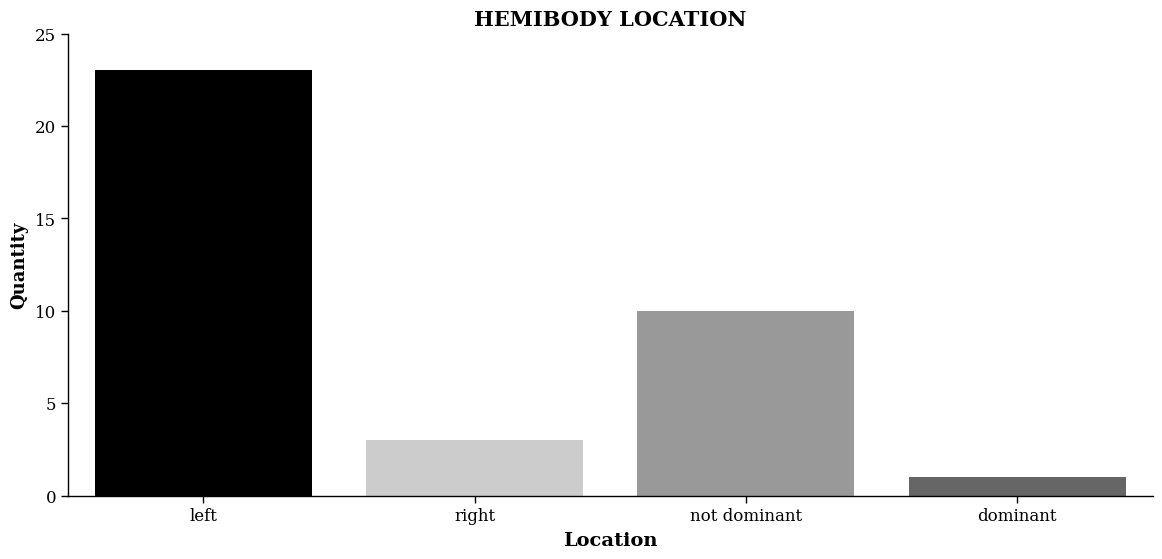

In [177]:
#Orden
plot_order = ['left', 'right', 'not dominant', 'dominant']
#Plot
plt.figure(figsize = (14,6))
sns.countplot(x = 'location_hemibody',
            data = hemibody,
            order = plot_order)
plt.title('HEMIBODY LOCATION',
            fontweight = 'bold',
            fontsize = 15)
plt.xlabel('Location',
            fontsize = 14)
plt.ylabel('Quantity', fontsize =13)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [178]:
sensors = df_eda.groupby(['paper_id','is_hands','wrist', 'chest', 'left_lobe_temporalis',
                    'finger_thumb', 'finger_index', 'finger_mIddle', 'finger_ring', 'finger_little',
                     'phalange_proximal', 'phalange_medial','phalange_distal',
                     ]).nth(0)
sensors.reset_index(inplace= True)

In [179]:
sensors_location = df_eda.groupby(['paper_id','is_hands','wrist', 'chest', 'left_lobe_temporalis']).nth(0)
sensors_location.reset_index(inplace = True)

PAPERS WITH NO DATA RELATED TO SENSORS LOCATION

In [180]:
len(sensors[(sensors['is_hands'] == '-') &
            (sensors['wrist'] == '-') &
            (sensors['chest'] == '-') &
            (sensors['left_lobe_temporalis'] == '-')])

27

In [181]:
general_place = multi_reversing(sensors, 'model_id',sensors[['is_hands','wrist', 'chest', 'left_lobe_temporalis']])
general_place['variable'].value_counts()

is_hands    68
wrist       13
chest        1
Name: variable, dtype: int64

In [182]:
general_place['variable'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

is_hands    82.9%
wrist       15.9%
chest        1.2%
Name: variable, dtype: object

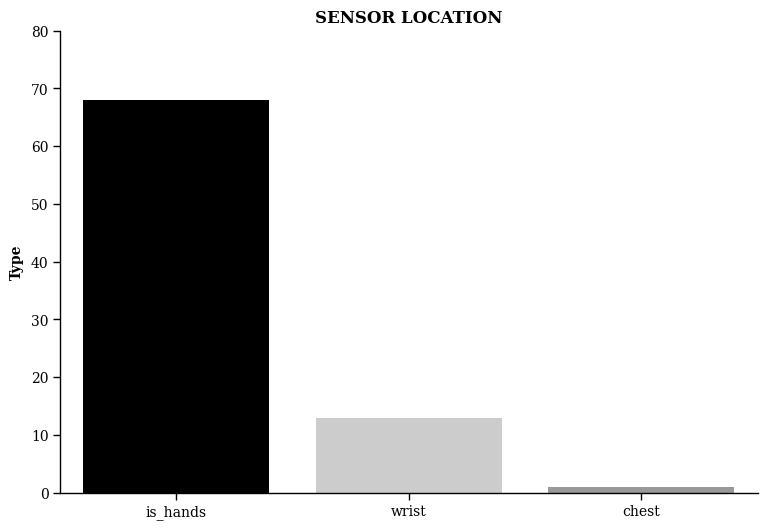

In [183]:
#Plot
plt.figure(figsize = (9,6))
sns.countplot(x = 'variable',
            data = general_place)
plt.title('SENSOR LOCATION',
            fontweight = 'bold',
            fontsize = 12)
plt.ylabel('Type', fontsize = 10)
plt.xlabel('')
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.show()

In [184]:
finger_sensor = multi_reversing(sensors, 'model_id',sensors[['finger_thumb', 'finger_index', 'finger_mIddle', 'finger_ring', 'finger_little']])
finger_sensor['variable'].value_counts()

finger_mIddle    52
finger_index     43
finger_ring      22
finger_little     2
finger_thumb      1
Name: variable, dtype: int64

In [185]:
finger_sensor['variable'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

finger_mIddle    43.3%
finger_index     35.8%
finger_ring      18.3%
finger_little     1.7%
finger_thumb      0.8%
Name: variable, dtype: object

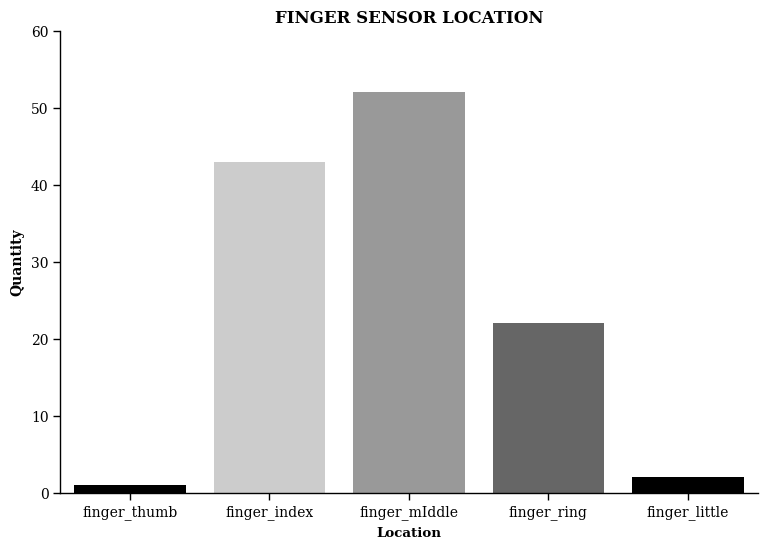

In [186]:
#Plot
plt.figure(figsize = (9,6))
sns.countplot(x = 'variable',
            data = finger_sensor)
plt.title('FINGER SENSOR LOCATION',
            fontweight = 'bold',
            fontsize = 12)
plt.ylabel('Quantity', fontsize = 10)
plt.xlabel('Location')
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.show()

In [187]:
location_phalanges = multi_reversing(sensors, 'model_id',sensors[['phalange_proximal', 'phalange_medial','phalange_distal']])
location_phalanges['variable'].value_counts()

phalange_distal      21
phalange_medial      11
phalange_proximal     2
Name: variable, dtype: int64

In [188]:
finger_sensor['variable'].value_counts()

finger_mIddle    52
finger_index     43
finger_ring      22
finger_little     2
finger_thumb      1
Name: variable, dtype: int64

In [189]:
finger_sensor['variable'] = finger_sensor['variable'].str.replace('finger_mIddle','Middle')
finger_sensor['variable'] = finger_sensor['variable'].str.replace('finger_index','Index')
finger_sensor['variable'] = finger_sensor['variable'].str.replace('finger_ring','Ring')
finger_sensor['variable'] = finger_sensor['variable'].str.replace('finger_thumb','Thumb')
finger_sensor['variable'] = finger_sensor['variable'].str.replace('finger_little','Little')

C:\Users\someo\AppData\Local\Temp\ipykernel_8148\698035014.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticklabels())
C:\Users\someo\AppData\Local\Temp\ipykernel_8148\698035014.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax2.get_yticklabels())
C:\Users\someo\AppData\Local\Temp\ipykernel_8148\698035014.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(ax3.get_yticklabels())


"ax1.legend(title='Modelo afectivo', loc='upper left')\nax2.legend(title='Tipo de algoritmo', loc='upper left')"

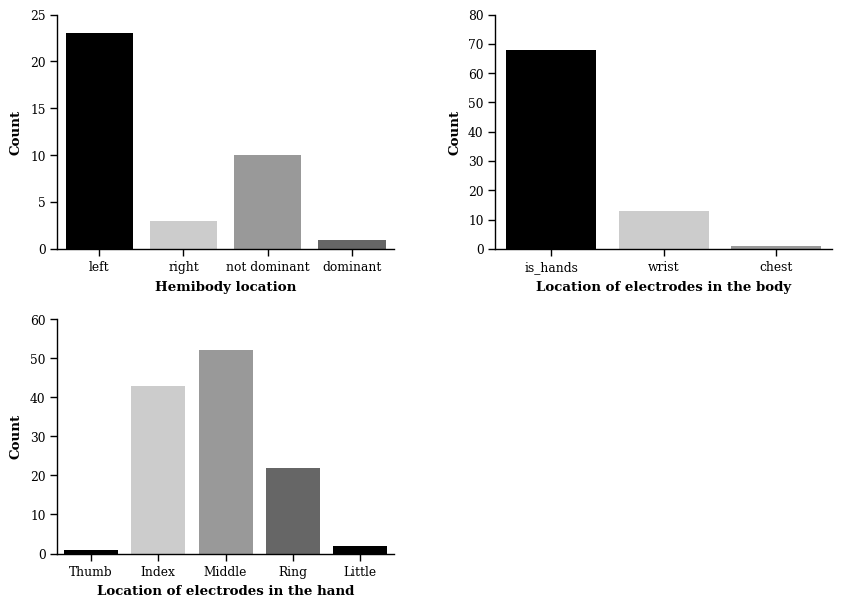

In [190]:
fig, axes = plt.subplots(2, 2)

fig.set_figheight(7)
fig.set_figwidth(10)

ax1 = sns.countplot(x = 'location_hemibody',
    data = hemibody,
    order = plot_order,
    ax=axes[0,0])

ax2 = sns.countplot(x = 'variable', data = general_place,
    ax=axes[0,1])

ax3 = sns.countplot(x = 'variable', data = finger_sensor,
    ax=axes[1,0])

fig.delaxes(axes[1,1])

"""ax1.set_ylim([0, 1])
ax2.set_ylim([0, 1])"""

ax1.set_yticklabels(ax1.get_yticklabels())
ax2.set_yticklabels(ax2.get_yticklabels())
ax3.set_yticklabels(ax3.get_yticklabels())
ax1.set_xticklabels(ax1.get_xticklabels())
ax2.set_xticklabels(ax2.get_xticklabels())
ax3.set_xticklabels(ax3.get_xticklabels())

ax1.set_xlabel("Hemibody location")
ax1.set_ylabel("Count")
ax2.set_xlabel("Location of electrodes in the body")
ax2.set_ylabel("Count")
ax3.set_xlabel("Location of electrodes in the hand")
ax3.set_ylabel("Count")

"""ax1.set_title("Proporción de trabajos por año (2010 - 2020) segun tipo de modelo emocional")
ax2.set_title("Proporción de trabajos por año (2010 - 2020) segun tipo de algoritmo")"""

"""ax1.legend(title='Modelo afectivo', loc='upper left')
ax2.legend(title='Tipo de algoritmo', loc='upper left')"""

### Elicitation techniques

In [191]:
df_emotion_elicitation_techniques.fillna('-', inplace= True)

In [192]:
df_technniques_no_dup = df_emotion_elicitation_techniques.drop_duplicates(subset="paper_id")

In [193]:
df_technniques_no_dup = df_technniques_no_dup.groupby(['paper_id',"technique_name"]).nth(0)
df_technniques_no_dup.reset_index(inplace=True)

In [194]:
df_technniques_no_dup["technique_name"].value_counts()

-                                               80
IAPS                                            10
TSST                                             3
Stroop color-word interference test’’ (SCWT)     3
Rapid-ABC play protocol                          1
IADS                                             1
Robin                                            1
Name: technique_name, dtype: int64

In [195]:
df_technniques_no_dup["technique_name"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

-                                               80.8%
IAPS                                            10.1%
TSST                                             3.0%
Stroop color-word interference test’’ (SCWT)     3.0%
Rapid-ABC play protocol                          1.0%
IADS                                             1.0%
Robin                                            1.0%
Name: technique_name, dtype: object

In [196]:
df_emotion_elicitation_techniques.columns

Index(['paper_id', 'model_id', 'apa_citation', 'is_multimodal',
       'modality_visual', 'modality_auditory', 'modality_somatosensory',
       'task_type_active', 'task_type_pasive', 'technique_name',
       'visual_pictures', 'visual_videos', 'visual_words', 'visual_other',
       'auditory_miusic', 'auditory_other',
       'technique_clasif_multiple_techniques', 'technique_clasif_driving',
       'technique_clasif_Imagination techniques /memory recall',
       'technique_clasif_Social interactions',
       'technique_clasif_Virtual Reality', 'technique_clasif_Meditation',
       'technique_clasif_Reading', 'technique_clasif_Ux',
       'technique_clasif_TEM clips (Tactile Enhanced Multimedia)',
       'technique_clasif_Videogame', 'technique_clasif_Puzzle',
       'technique_description', 'elicitation_duration',
       'elicitation_duration_range', 'elicitation_duration_mean',
       'elicitation_duration_median'],
      dtype='object')

In [197]:
df_emotion_elicitation_techniques["technique_name"].value_counts()

-                                               417
IAPS                                             29
TSST                                             22
Stroop color-word interference test’’ (SCWT)     15
Rapid-ABC play protocol                           8
Robin                                             6
IADS                                              2
Name: technique_name, dtype: int64

In [198]:
df_emotion_elicitation_techniques["technique_name"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

-                                               83.6%
IAPS                                             5.8%
TSST                                             4.4%
Stroop color-word interference test’’ (SCWT)     3.0%
Rapid-ABC play protocol                          1.6%
Robin                                            1.2%
IADS                                             0.4%
Name: technique_name, dtype: object

In [199]:
techniques_defined = df_emotion_elicitation_techniques[df_emotion_elicitation_techniques["technique_name"] != "-"]
techniques_defined["technique_name"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

IAPS                                            35.4%
TSST                                            26.8%
Stroop color-word interference test’’ (SCWT)    18.3%
Rapid-ABC play protocol                          9.8%
Robin                                            7.3%
IADS                                             2.4%
Name: technique_name, dtype: object

In [200]:
df_emotion_elicitation_techniques["is_multimodal"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

x    54.5%
-    43.9%
      1.6%
Name: is_multimodal, dtype: object

In [201]:
type_task = df_emotion_elicitation_techniques.groupby(['paper_id', 'task_type_active','task_type_pasive']).nth(0)
type_task.reset_index(inplace= True)

In [202]:
len(type_task[(type_task['task_type_active'] == '-') &
            (type_task['task_type_pasive'] == '-')])

7

In [203]:
task_type = multi_reversing(type_task, 'model_id', type_task[['task_type_active','task_type_pasive']])
task_type['variable'].value_counts()

task_type_pasive    75
task_type_active    21
Name: variable, dtype: int64

In [204]:
task_type['variable'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

task_type_pasive    78.1%
task_type_active    21.9%
Name: variable, dtype: object

In [205]:
freq_modality = df_emotion_elicitation_techniques.groupby(['paper_id','is_multimodal','modality_visual','modality_auditory', 'modality_somatosensory']).nth(0)
freq_modality.reset_index(inplace=True)

In [206]:
df_modality = multi_reversing(freq_modality, 'model_id', freq_modality[['is_multimodal','modality_visual','modality_auditory', 'modality_somatosensory']])
df_modality['variable'].value_counts()

is_multimodal        52
modality_visual      22
modality_auditory    10
Name: variable, dtype: int64

In [207]:
df_modality['variable'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

is_multimodal        61.9%
modality_visual      26.2%
modality_auditory    11.9%
Name: variable, dtype: object

In [208]:
number_modality = sum(df_modality['variable'].value_counts())
print (f'Se hallaron {number_modality} instancias en total entre multimodal, visual, auditory y somatosensory.')

Se hallaron 84 instancias en total entre multimodal, visual, auditory y somatosensory.


In [209]:
visual_modality = df_emotion_elicitation_techniques.groupby(['paper_id','visual_pictures', 'visual_videos', 'visual_words', 'visual_other']).nth(0)
visual_modality.reset_index(inplace=True)

df_visual_modality = multi_reversing(visual_modality, 'model_id', visual_modality[['visual_pictures', 'visual_videos', 'visual_words', 'visual_other']])
df_visual_modality['variable'].value_counts()

visual_videos      56
visual_pictures    15
visual_words        4
Name: variable, dtype: int64

In [210]:
df_visual_modality['variable'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

visual_videos      74.7%
visual_pictures    20.0%
visual_words        5.3%
Name: variable, dtype: object

In [211]:
auditory_modality = df_emotion_elicitation_techniques.groupby(['paper_id','auditory_miusic', 'auditory_other']).nth(0)
auditory_modality.reset_index(inplace=True)

df_auditory_modality = multi_reversing(auditory_modality, 'model_id', auditory_modality[['auditory_miusic', 'auditory_other']])
df_auditory_modality['variable'].value_counts()

auditory_miusic    24
auditory_other     13
Name: variable, dtype: int64

In [212]:
df_auditory_modality['variable'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

auditory_miusic    64.9%
auditory_other     35.1%
Name: variable, dtype: object

In [213]:
other_techniques = df_emotion_elicitation_techniques.groupby(['paper_id','technique_clasif_multiple_techniques', 'technique_clasif_driving',
'technique_clasif_Imagination techniques /memory recall',
'technique_clasif_Social interactions',
'technique_clasif_Virtual Reality', 'technique_clasif_Meditation',
'technique_clasif_Reading', 'technique_clasif_Ux',
'technique_clasif_TEM clips (Tactile Enhanced Multimedia)',
'technique_clasif_Videogame', 'technique_clasif_Puzzle']).nth(0)
other_techniques.reset_index(inplace=True)

df_other_techniques = multi_reversing(other_techniques, 'model_id', other_techniques[['technique_clasif_multiple_techniques', 'technique_clasif_driving',
'technique_clasif_Imagination techniques /memory recall',
'technique_clasif_Social interactions',
'technique_clasif_Virtual Reality', 'technique_clasif_Meditation',
'technique_clasif_Reading', 'technique_clasif_Ux',
'technique_clasif_TEM clips (Tactile Enhanced Multimedia)',
'technique_clasif_Videogame', 'technique_clasif_Puzzle']])
df_other_techniques['variable'].value_counts()

technique_clasif_Social interactions                        7
technique_clasif_multiple_techniques                        4
technique_clasif_driving                                    4
technique_clasif_Ux                                         2
technique_clasif_Virtual Reality                            1
technique_clasif_Meditation                                 1
technique_clasif_Reading                                    1
technique_clasif_TEM clips (Tactile Enhanced Multimedia)    1
technique_clasif_Videogame                                  1
Name: variable, dtype: int64

In [214]:
all_techniques = df_emotion_elicitation_techniques.groupby(['paper_id','visual_pictures', 'visual_videos', 'visual_words', 'visual_other',
                                                            'auditory_miusic', 'auditory_other', 'technique_clasif_driving',
                                                            'technique_clasif_Imagination techniques /memory recall',
                                                            'technique_clasif_Social interactions',
                                                            'technique_clasif_Virtual Reality', 'technique_clasif_Meditation',
                                                            'technique_clasif_Reading', 'technique_clasif_Ux',
                                                            'technique_clasif_TEM clips (Tactile Enhanced Multimedia)',
                                                            'technique_clasif_Videogame', 'technique_clasif_Puzzle']).nth(0)
all_techniques.reset_index(inplace=True)

df_all_techniques = multi_reversing(all_techniques, 'model_id', all_techniques[['visual_pictures', 'visual_videos', 'visual_words', 'visual_other',
                                                            'auditory_miusic', 'auditory_other',
                                                            'technique_clasif_driving',
                                                            'technique_clasif_Imagination techniques /memory recall',
                                                            'technique_clasif_Social interactions',
                                                            'technique_clasif_Virtual Reality', 'technique_clasif_Meditation',
                                                            'technique_clasif_Reading', 'technique_clasif_Ux',
                                                            'technique_clasif_TEM clips (Tactile Enhanced Multimedia)',
                                                            'technique_clasif_Videogame', 'technique_clasif_Puzzle']])
df_all_techniques['variable'].value_counts()

visual_videos                                               61
auditory_miusic                                             24
visual_pictures                                             15
auditory_other                                              13
technique_clasif_Social interactions                         7
visual_words                                                 4
technique_clasif_driving                                     4
technique_clasif_Ux                                          2
technique_clasif_Virtual Reality                             1
technique_clasif_Meditation                                  1
technique_clasif_Reading                                     1
technique_clasif_TEM clips (Tactile Enhanced Multimedia)     1
technique_clasif_Videogame                                   1
Name: variable, dtype: int64

In [215]:
df_all_techniques['variable'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

visual_videos                                               45.2%
auditory_miusic                                             17.8%
visual_pictures                                             11.1%
auditory_other                                               9.6%
technique_clasif_Social interactions                         5.2%
visual_words                                                 3.0%
technique_clasif_driving                                     3.0%
technique_clasif_Ux                                          1.5%
technique_clasif_Virtual Reality                             0.7%
technique_clasif_Meditation                                  0.7%
technique_clasif_Reading                                     0.7%
technique_clasif_TEM clips (Tactile Enhanced Multimedia)     0.7%
technique_clasif_Videogame                                   0.7%
Name: variable, dtype: object

In [216]:
len(df_all_techniques['variable'])

135